# Setup

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import os

### File Openers

In [2]:
def save_and_show_plot(fig, filename, directory='plots_folder'):
    # Make sure the directory exists, if not, create it
    os.makedirs(directory, exist_ok=True)
    fig.savefig(f"{directory}/{filename}.png", bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure


In [3]:
import os

def find_latest_result_folder(path):
    result_folders = [folder for folder in os.listdir(path) if folder.startswith("Results")]
    if not result_folders:
        raise ValueError("No 'Results' folders found.")
        
    result_numbers = [int(folder.split("_")[-1]) if "_" in folder else 0 for folder in result_folders]
    latest_result = max(result_numbers)
    
    if latest_result == 0:
        return "Results"
    else:
        return f"Results_{latest_result}"

def latest_result_finder(path):
    latest_result_path = find_latest_result_folder(path)
    path = path + '/' + latest_result_path + '/'
    return(path)
    
def open_results_file(file_name, scenario):
    scenario = '/Users/lesarmstrong/Documents/GitHub/DOLPHYN_May2023_SuperCloud/Example_Systems/PJM_with_MI/' + scenario
    path = latest_result_finder(scenario)
    if file_name.startswith('HSC'):
        path = path + 'Results_HSC/'
    path = path + file_name
    #print(path)
    df = pd.read_csv(path)
    return(df)


In [4]:
def identify_tech_type(df, resources, aggregate=True, dont_aggregate=''):
    tech_types = []
    for name in df['Resource']:
        for zone in zones:
            if name.startswith(zone):
                cleaned_string = name[len(zone) + 1:]
                break
            else:
                cleaned_string = name
        
        for r in resources:
            if cleaned_string.startswith(r):
                result_string = resources[r]
                break
            else:
                result_string = cleaned_string
        tech_types.append(result_string)

    df['Tech_Type'] = tech_types
    
    if aggregate == True:
        # Aggregate other columns based on the identified technology types
        aggregated_df = df.groupby('Tech_Type').sum().reset_index()
        
        if dont_aggregate != '':
            aggregated_df = df.groupby(dont_aggregate).sum().reset_index()
            

        return aggregated_df
    if aggregate == False:
        return df



### Colors & Dictionaries

In [5]:
scenarios_no_caverns = ['PJM_with_MI_no_caverns_0_red',
                        'PJM_with_MI_no_caverns_70_red',
                        'PJM_with_MI_no_caverns_85_red',
                        'PJM_with_MI_no_caverns_90_red',
                        'PJM_with_MI_no_caverns_95_red',
                        'PJM_with_MI_no_caverns_99_red',
                        'PJM_with_MI_no_caverns_100_red']
 
scenarios_with_caverns =  ['PJM_with_MI_with_caverns_0_red',
                            'PJM_with_MI_with_caverns_70_red',
                            'PJM_with_MI_with_caverns_85_red',
                            'PJM_with_MI_with_caverns_90_red',
                            'PJM_with_MI_with_caverns_95_red',
                            'PJM_with_MI_with_caverns_99_red',
                            'PJM_with_MI_with_caverns_100_red']

scenarios_comparison =  ['PJM_with_MI_0_red',
                        'PJM_with_MI_70_red',
                        'PJM_with_MI_85_red',
                        'PJM_with_MI_90_red',
                        'PJM_with_MI_95_red',
                        'PJM_with_MI_99_red',
                        'PJM_with_MI_100_red']

scenarios_no_above_ground_storage = ['PJM_with_MI_no_above_ground_storage_0_red',
                                    'PJM_with_MI_no_above_ground_storage_70_red',
                                    'PJM_with_MI_no_above_ground_storage_85_red',
                                    'PJM_with_MI_no_above_ground_storage_90_red',
                                    'PJM_with_MI_no_above_ground_storage_95_red',
                                    'PJM_with_MI_no_above_ground_storage_99_red',
                                    'PJM_with_MI_no_above_ground_storage_100_red']




scenario = 'PJM_with_MI_with_caverns_95_red'


zones = [
    "MIS_INKY",
    "PJM_WMAC",
    "PJM_SMAC",
    "PJM_West",
    "PJM_AP",
    "PJM_COMD",
    "PJM_ATSI",
    "PJM_Dom",
    "PJM_PENE",
    "S_C_KY",
    "PJM_EMAC",
    "MIS_LMI"
]

# Zone identifier
def zone_ID(file_name='HSC_h2_generation_discharge.csv', scenario=scenario):
    df = open_results_file(file_name='HSC_h2_generation_discharge.csv', scenario=scenario)
    df = df.T
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.rename(columns={'Zone': 'Zone_N'})
    df = df[df['Resource'] != 'Total']
    resources = df[df['Resource'] != 'Total']

    df = identify_tech_type(df, resources, aggregate=False)
    df = df.iloc[:-1]
    df = df.reset_index()
    df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))
    zone_dict = pd.Series(df.Zone.values,index=df.Zone_N).to_dict()
    zone_dict = {f'z{int(k)}': v for k, v in zone_dict.items()}
    return(zone_dict)


#Dictionary of zone numbers
zone_ID_dict = zone_ID(file_name='HSC_h2_generation_discharge.csv', scenario=scenario)
# Zones list
zones = list(zone_ID_dict.values())





generation_resources = [
    "conventional_hydroelectric",
    "conventional_steam_coal",
    "natural_gas_fired_combined_cycle",
    "natural_gas_fired_combustion_turbine",
    "solar_photovoltaic",
    "onshore_wind_turbine",
    "small_hydroelectric",
    "hydroelectric_pumped_storage",
    "nuclear",
    "naturalgas_ccccsavgcf_conservative",
    "naturalgas_ccavgcf_moderate",
    "naturalgas_ctavgcf_moderate",
    "landbasedwind",
    "battery",
    "utilitypv",
    "offshorewind",
    "CCGT-H2",
    "OCGT-H2",
]

# Mapping resources to categories
generation_resource_categories = {
    "conventional_hydroelectric": "Hydro",
    "conventional_steam_coal": "Coal",
    "natural_gas_fired_combined_cycle": "Existing_natural_gas",
    "natural_gas_fired_combustion_turbine": "Existing_natural_gas",
    "naturalgas_ccavgcf_moderate": "New_natural_gas",
    "naturalgas_ctavgcf_moderate": "New_natural_gas",
    "naturalgas_ccccsavgcf_conservative": "Natural_gas_with_CCS",
    "solar_photovoltaic": "Solar",
    "onshore_wind_turbine": "Wind",
    "small_hydroelectric": "Hydro",
    "hydroelectric_pumped_storage": "Hydro",
    "nuclear": "Nuclear",
    "landbasedwind": "Wind",
    "battery": "Battery",
    "utilitypv": "Solar",
    "offshorewind": "Wind",
    "CCGT-H2": "H2",
    "OCGT-H2": "H2",
}

H2_resource_categories = {
    "Electrolyzer": "Electrolyzer",
    "Large_SMR_wCCS_96pct": "Large_SMR_wCCS_96pct",
    "Large_SMR": "Large_SMR",
    "ATR_wCCS_94pct": "ATR_wCCS_94pct",
    "Salt_cavern_storage": "Salt_cavern_storage",
}


colors_generation = {
    'H2': 'skyblue', 
    'Battery': 'orange', 
    'Coal': 'black', 
    'Hydro': 'blue',
    'Existing_natural_gas': 'grey',
    'Natural_gas_with_CCS': 'lightgrey',
    'New_natural_gas': 'maroon',
    'Nuclear': 'purple',
    'Solar': '#FFD700',
    'Wind': 'green'
}


H2_colors = {
    "Electrolyzer": "#7B68EE",  # Medium Slate Blue 
    "Large_SMR_wCCS_96pct": "#808000", # Olive
    "Large_SMR": "darkgrey",  # Dark Grey
    "ATR_wCCS_94pct": "#008080",  # Teal
    "Salt_cavern_storage": "#BA55D3",  # Medium Orchid
    "Above_ground_storage": "saddlebrown"
}

h2_balance_colors = {
    'Demand': '#d62728',  # Brick Red
    'H2_Pipeline_Import/Export': '#ff7f0e',  # Safety Orange
    'H2G2P': '#2ca02c',  # Cooked Asparagus Green
    'Generation': '#1f77b4',  # Muted Blue
}




costs_colors = {
    'cTotal': 'blue',
    'cFix_Thermal': 'firebrick',
    'cFix_VRE': 'orange',
    'cFix_Trans_VRE': 'gold',
    'cFix_Must_Run': 'yellowgreen',
    'cFix_Hydro': 'lightgreen',
    'cFix_Stor': 'darkgreen',
    'cVar': 'lightblue',
    'cNSE': 'dodgerblue',
    'cStart': 'navy',
    'cUnmetRsv': 'mediumpurple',
    'cNetworkExp': 'plum',
    'cH2Fix_Gen': 'violet',
    'cH2Fix_G2P': 'magenta',
    'cH2Fix_Stor': 'crimson',
    'cH2Fix_Truck': 'palevioletred',
    'cH2Var': 'pink',
    'cH2NSE': 'peachpuff',
    'cH2Start': 'sandybrown',
    'cH2NetworkExp': 'chocolate',
    'cDACFix': 'sienna',
    'cDACVar': 'maroon',
    'cCO2Comp': 'coral',
    'cCO2Start': 'tomato',
    'cCO2Stor': 'salmon',
    'cCO2NetworkExp': 'darkorange',
    'cBiorefineryFix': 'khaki',
    'cBiorefineryVar': 'yellow',
    'cHerb': 'springgreen',
    'cWood': 'mediumseagreen',
    'cSFFix': 'teal',
    'cSFVar': 'turquoise',
    'cSFByProdRev': 'cyan',
    'CSFConvDieselFuelCost': 'deepskyblue',
    'CSFConvJetfuelFuelCost': 'blue',
    'CSFConvGasolineFuelCost': 'slateblue',
    'cPower_Total': 'blueviolet',
    'cHSC_Total': 'purple',
    'cCSC_Total': 'indigo',
    'cBiorefinery': 'pink',
    'cBioresources': 'lightcoral',
    'cSF_Prod': 'lightsalmon',
    'cConv_Fuels': 'darkred',
    'cHydro_Must_Run': 'darkgrey',
}

emissions_colors = {
    "Power System": "#FF8C00",  # Medium Slate Blue 
    "H2 System": 'skyblue', # Olive
}

rename_dict= {
            'PJM_with_MI_no_caverns_0_red': 'No Emission Cap\n without Salt Caverns',
            'PJM_with_MI_no_caverns_70_red': '70% Emission Reduction Cap\n without Salt Caverns',
            'PJM_with_MI_no_caverns_85_red': '85% Emission Reduction Cap\n without Salt Caverns',
            'PJM_with_MI_no_caverns_90_red': '90% Emission Reduction Cap\n without Salt Caverns',
            'PJM_with_MI_no_caverns_95_red': '95% Emission Reduction Cap\n without Salt Caverns',
            'PJM_with_MI_no_caverns_99_red': '99% Emission Reduction Cap\n without Salt Caverns',
            'PJM_with_MI_no_caverns_100_red': '100% Emission Reduction Cap\n without Salt Caverns',

            'PJM_with_MI_with_caverns_0_red': 'No Emission Cap\n with Salt Caverns',
            'PJM_with_MI_with_caverns_70_red': '70% Emission Reduction Cap\n with Salt Caverns',
            'PJM_with_MI_with_caverns_85_red': '85% Emission Reduction Cap\n with Salt Caverns',
            'PJM_with_MI_with_caverns_90_red': '90% Emission Reduction Cap\n with Salt Caverns',
            'PJM_with_MI_with_caverns_95_red': '95% Emission Reduction Cap\n with Salt Caverns',
            'PJM_with_MI_with_caverns_99_red': '99% Emission Reduction Cap\n with Salt Caverns',
            'PJM_with_MI_with_caverns_100_red': '100% Emission Reduction Cap\n with Salt Caverns',

            'PJM_with_MI_no_above_ground_storage_0_red': 'No Emission Cap\n with Salt Caverns',
            'PJM_with_MI_no_above_ground_storage_70_red': '70% Emission Reduction Cap\n without Above Ground Storage',
            'PJM_with_MI_no_above_ground_storage_85_red': '85% Emission Reduction Cap\n without Above Ground Storage',
            'PJM_with_MI_no_above_ground_storage_90_red': '90% Emission Reduction Cap\n without Above Ground Storage',
            'PJM_with_MI_no_above_ground_storage_95_red': '95% Emission Reduction Cap\n without Above Ground Storage',
            'PJM_with_MI_no_above_ground_storage_99_red': '99% Emission Reduction Cap\n without Above Ground Storage',
            'PJM_with_MI_no_above_ground_storage_100_red': '100% Emission Reduction Cap\n without Above Ground Storage',
            

            'PJM_with_MI_0_red': 'No Emission Cap',
            'PJM_with_MI_70_red': '70% Emission Reduction Cap',
            'PJM_with_MI_85_red': '85% Emission Reduction Cap',
            'PJM_with_MI_90_red': '90% Emission Reduction Cap',
            'PJM_with_MI_95_red': '95% Emission Reduction Cap',
            'PJM_with_MI_99_red': '99% Emission Reduction Cap',
            'PJM_with_MI_100_red': '100% Emission Reduction Cap',
            }



title=''
legend_title=''
y_label = '' 


scenarios = scenarios_no_caverns

In [6]:
def capacity_w_H2G2p_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('capacity_w_H2G2P.csv', scenario)
    aggregated_df = identify_tech_type(df, generation_resource_categories)
    return(aggregated_df)

def power_w_H2G2p_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('power_w_H2G2P.csv', scenario)
    df = df.T 

    # Step 1: Convert the index into a column
    df_with_index_as_column = df.reset_index()

    # Step 2: Rename the new column
    df_with_index_as_column = df_with_index_as_column.rename(columns={'index': 'your_new_column_name'})

    # Step 3: Convert the first row into column indices
    df_with_index_as_column.columns = df_with_index_as_column.iloc[0]

    # Step 4: Drop the first row
    df_with_index_as_column = df_with_index_as_column.drop(df_with_index_as_column.index[0])

    # Step 5: Reset the index
    df_with_index_as_column = df_with_index_as_column.reset_index(drop=True)
    df = df_with_index_as_column[['Resource', 'AnnualSum']]
    df = df.iloc[:-1]
    df = identify_tech_type(df, generation_resource_categories)
    return(df)

def generation_difference_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('capacity_w_H2G2P.csv', scenario)
    df = identify_tech_type(df, generation_resource_categories)
    df = df[['Tech_Type', 'StartCap', 'EndCap']]
    #df = df[df['Tech_Type'] != 'Total']
    df['Cap_difference'] = df['EndCap'] - df['StartCap'] 
    return(df)


def h2_capacity_analysis(scenario,H2_resource_categories=H2_resource_categories):
    #scenario = 'PJM_with_MI_no_caverns_70_red'
    df = open_results_file('HSC_generation_storage_capacity.csv', scenario)
    #aggregated_df = identify_tech_type(df, generation_resource_categories)
    aggregated_df = identify_tech_type(df, H2_resource_categories)
    return(aggregated_df)

def h2_generation_analysis(scenario,H2_resource_categories=H2_resource_categories, aggregate_zones=True):
    #scenario = 'PJM_with_MI_no_caverns_70_red'
    df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
    df = df.T.reset_index()
    # assuming df is your DataFrame
    df.columns = df.iloc[0]
    df = df[1:]
    
    if aggregate_zones == True:
        aggregated_df = identify_tech_type(df, H2_resource_categories)
        return(aggregated_df)
    
    if aggregate_zones == False:
        df = df.rename(columns={'Zone': 'Zone_N'})
        df = identify_tech_type(df, resources, aggregate=False)
        df = df.iloc[:-1]
        df = df.reset_index()
        df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))
 
        return(df)
        

## GET COSTS ##
def get_total(df, cost_name):
    total = df.loc[df['Costs'] == cost_name, 'Total'].values[0]
    return total

def cost_analysis(scenario, cost_name='cTotal'):
    df = open_results_file('costs_system.csv', scenario)
    cost = get_total(df, cost_name)
    return(cost)
   
    
def max_row_sum_for_yaxis(df):
    index_of_max_sum_row = df.clip(lower=0).sum(axis=1).idxmax()
    max_sum_row = df.loc[index_of_max_sum_row].clip(lower=0).sum()
    #print(df.loc[index_of_max_sum_row].sum())
    #print(max_sum_row)
    return(max_sum_row)

def min_row_sum_for_yaxis(df):
    #print(df)
    index_of_min_sum_row = df.sum(axis=1).idxmin()
    #print(index_of_min_sum_row)
    min_sum_row = df.loc[index_of_min_sum_row].sum()
    #print(df.loc[index_of_min_sum_row].sum())
    #print(min_sum_row)
    
    min_sum_row = df.min().min()
    #print(min_sum_row)
    return(min_sum_row)

In [7]:
# Trying to write load data into plot with dotted line. Will have to add new function to stacked barchart function
# Returns yearly load data for each zone [metric tons]
def zone_h2_load_data(load_file = '../HSC_load_data.csv', scenario=scenario):

    df = open_results_file(file_name=load_file, scenario=scenario)

    zone_dict = zone_ID()

    # Create a list of all columns in df that contain 'zn' in their names
    zn_columns = [col for col in df.columns if 'z' in col]

    # Create a new dictionary with the zone names from zone_dict as keys and the corresponding column values from df as values
    # Multiplied by 8760 to go from tons/hr ---> tons/year
    new_dict = {zone_dict[key.replace("Load_H2_tonne_per_hr_", "")]: int(df[key].values[0]*8760) for key in zn_columns}

    # Print the new dictionary
    return(new_dict)


def power_load_data(load_file = 'power_w_H2G2P.csv', scenario=scenario):
    df = open_results_file(file_name=load_file, scenario=scenario)
    df = df.T
    df.columns = df.iloc[0] 
    df = df.iloc[1:]

    df = df.reset_index()
    df = df.rename(columns={'index': 'Resource'})
    df = identify_tech_type(df, generation_resource_categories, aggregate=True, dont_aggregate=['Zone'])
    df = df.iloc[1:]
    #df = df[['Zone', 'Resource', 'AnnualSum']]
    return(df)

power_load_data(load_file = 'power_w_H2G2P.csv', scenario=scenario)


Resource  Zone                                           Resource  \
1          1.0  MIS_INKY_conventional_hydroelectric_1MIS_INKY_...   
2          2.0  PJM_WMAC_conventional_hydroelectric_1PJM_WMAC_...   
3          3.0  PJM_SMAC_conventional_steam_coal_1PJM_SMAC_nat...   
4          4.0  PJM_West_conventional_hydroelectric_1PJM_West_...   
5          5.0  PJM_AP_conventional_hydroelectric_1PJM_AP_conv...   
6          6.0  PJM_COMD_conventional_hydroelectric_1PJM_COMD_...   
7          7.0  PJM_ATSI_conventional_hydroelectric_1PJM_ATSI_...   
8          8.0  PJM_Dom_conventional_hydroelectric_1PJM_Dom_co...   
9          9.0  PJM_PENE_conventional_hydroelectric_1PJM_PENE_...   
10        10.0  S_C_KY_conventional_hydroelectric_1S_C_KY_conv...   
11        11.0  PJM_EMAC_conventional_hydroelectric_1PJM_EMAC_...   
12        12.0  MIS_LMI_conventional_hydroelectric_1MIS_LMI_co...   

Resource     AnnualSum            t1            t2            t3  \
1         1.625661e+08  21297.040040  21248.314025  21185.560116   
2         3.443842e+07   1350.773476   1350.229981   1347.198542   
3         5.076662e+07    167.830405    159.284115    154.366946   
4         2.922864e+08  35032.814561  32580.654943  31834.346235   
5         1.828876e+08  22081.125770  20758.788180  20324.194633   
6         1.381992e+08   3702.569319   3459.494775   3415.691245   
7         7.815532e+07      8.211718      8.299192      8.332674   
8         1.018853e+08   8099.058143   7915.923392   7826.751263   
9         8.712859e+06    464.522512    463.135067    466.740263   
10        7.413275e+07   6991.760959   6683.251683   6533.781639   
11        2.030818e+08  19449.332677  17929.597198  17347.639866   
12        1.023042e+08   2833.800256   2698.618844   2663.542304   

Resource            t4            t5            t6            t7  ...  \
1         21078.942964  21005.398491  20876.692346  20029.817528  ...   
2          1344.168693   1337.685277   1378.945819   1740.203683  ...   
3           149.400457    142.356764    566.363775   4750.318374  ...   
4         31453.111978  31471.237059  32255.265437  28310.980762  ...   
5         19971.964146  19905.167328  19999.482506  14345.682982  ...   
6          3419.699534   3390.675906   3396.898790   5150.170220  ...   
7             8.316080      8.315126     87.800498   2805.767506  ...   
8          7750.816486   7677.400016   7804.192556  10278.964598  ...   
9           472.065987    472.063786    483.322792    493.379494  ...   
10         6536.711350   6595.118161   6792.618526   6974.529119  ...   
11        16988.383660  16775.321494  17074.319818  16889.745610  ...   
12         2655.712917   2675.121533   2755.350202   6431.329383  ...   

Resource         t1840         t1841         t1842         t1843  \
1         20126.640173  23386.998010  22907.534896  22915.676346   
2          2810.304931   2901.587249   2143.975974   1538.098351   
3          8459.550941   3188.678146   1932.393633   1952.769008   
4         37203.697661  47638.344197  53261.798301  53732.111888   
5         29543.109743  33945.225001  36170.381051  36569.805087   
6         22843.386165  17270.103776   8982.384769   9844.189878   
7         14314.566301   5150.529272   2415.807000   2791.689783   
8         10020.351712   6511.578052   6929.729107   7240.854901   
9           750.111546    709.451767    762.999116    783.141545   
10         6782.463130   7583.515257  10631.192087  10917.578065   
11        22993.119842  21996.824650  26109.885211  27654.146607   
12        14553.815826   6501.962836   5866.216295   6385.942461   

Resource         t1844         t1845         t1846         t1847  \
1         22891.416075  22564.715945  21953.151638  20754.620896   
2          1539.086988   1536.706008   1533.760587   1529.683674   
3          1956.979421   1975.239181   1984.251205   1874.952577   
4         53883.563573  53300.753604  52130.680449  50245.156395   
5         36165.558810  35338.864288  3455

In [8]:
def multiple_zone_barchart_plot(dataframes_dict, scenarios=scenarios, zones=zones):

    # Finds max value which allows me to set scale for all the barplots relative to each other

    max_value = 0

    for keys, df in dataframes_dict.items():
        filtered_df = df[~df['Tech_Type'].str.contains('storage')]
        max_in_df = filtered_df['AnnualSum'].max()

        if max_in_df > max_value:
            max_value = max_in_df
    
    # Find load data for each zone
    h2_load_zoned = zone_h2_load_data()
    
    for zone in zones:

        df_main = pd.DataFrame()

        for scenario in scenarios:
            dff = dataframes_dict[(zone,scenario)]

            dff = dff[['Tech_Type', 'AnnualSum']]
            #dff = dff.set_index('Tech_Type')


            dff = dff.rename(columns={'AnnualSum': scenario})#

            dff = dff[dff['Tech_Type'] != 'Above_ground_storage']
            dff = dff[dff['Tech_Type'] != 'Salt_cavern_storage']

            # Transpose the dataframe    
            dff = dff.set_index('Tech_Type').T
            #dff = dff.columns = dff.columns.droplevel(0)
            #dff = dff.set_index('Tech_Type', inplace=True)
            #

            #dff.reset_index()
            df_main = df_main.append(dff, ignore_index=False)

        plot_stacked_barchart(df_main=df_main, title=zone, legend_title="", y_label="", units=2,
                              retirement=False, sort_values=False, legend_custom=False, comparing=False,
                               spatial_shared_y_limit=max_value, load_data=h2_load_zoned[zone])


    #df_main


In [9]:
def h2_generation(scenarios=scenarios, title=title, y_label=y_label, units=2):
    df_main = pd.DataFrame()
    
    for scenario in scenarios:
        df = h2_generation_analysis(scenario,H2_resource_categories=H2_resource_categories)


        df = df[['Tech_Type', 'AnnualSum']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'AnnualSum': scenario})#

        df = df[df['Tech_Type'] != 'Above_ground_storage']
        df = df[df['Tech_Type'] != 'Salt_cavern_storage']

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)

# Plotting Stacked Barcharts

In [10]:
title=''
legend_title=''
y_label = '' 

def plot_stacked_barchart(df_main, title=title, legend_title=legend_title, y_label=y_label, units=1,
                          retirement=False, sort_values=False, legend_custom=False, comparing=False,
                          spatial_shared_y_limit=0, load_data=0, save_plot=True):
    
    #print(df_main)
    #print("UNITS ARE: " + str(units))
    H2_colors = {
        "Electrolyzer": "#7B68EE",  # Medium Slate Blue 
        "Large_SMR_wCCS_96pct": "#808000", # Olive
        "Large_SMR": "darkgrey",  # Dark Grey
        "ATR_wCCS_94pct": "#008080",  # Teal
        "Salt_cavern_storage": "#BA55D3",  # Medium Orchid
        "Above_ground_storage": "saddlebrown"
    }

    # units = 1 is for generation
    if units == 1:
        # MW --> GW
        df_main = df_main.div(1000)
        colors = colors_generation
    if units == 1.1:
        # MW --> TW
        df_main = df_main.div(1000000)
        colors = colors_generation

    # units = 2 is for H2
    if units == 2:
        colors = H2_colors
    if units == 2.1:
        # Tons h2 --> KiloTons h2
        df_main = df_main.div(1000)
        colors = H2_colors
    if units == 2.2:
        # Tons h2 --> MegaTons h2
        df_main = df_main.div(1000000)
        colors = H2_colors
        
    
    # units = 3 is for Costs
    if units == 3:
        colors = costs_colors
    
    # All others? (For now is for emissions)
    if units == 4:
        colors = emissions_colors
        
    # For h2_balancing 
    if units == 5:
        colors = h2_balance_colors


    if sort_values == True:
        # Calculate the sum of each row (i.e., the total height of each bar)
        row_sums = df_main.sum(axis=1)

        # Sort the DataFrame by the row sums
        df_main = df_main.loc[row_sums.sort_values().index]

        
    # Create a new figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))


    #print(df_main)
    #print(colors)
    # With retirement
    #if retirement == True:
    if df_main.select_dtypes(include=[np.number]).min().min() < -1:
        # Split the dataframe into two: one for positive values and another for negative values
        df_pos = df_main.clip(lower=0)  # This replaces negative values with 0
        df_neg = df_main.clip(upper=0)  # This replaces positive values with 0

        # Create the bar chart for positive values
        ax = df_pos.plot(kind='bar', stacked=True, color=[colors[i] for i in df_pos.columns], ax=ax)

        # Stack the negative values below by creating a bar chart with negative dataframe
        ax = df_neg.plot(kind='bar', stacked=True, color=[colors[i] for i in df_neg.columns], ax=ax)

    else:
        #print(colors)
        ax = df_main.plot(kind='bar', stacked=True, color=[colors[i] for i in df_main.columns], ax=ax)
        
        
    df_main.rename(index=rename_dict, inplace=True)
   # Create a custom legend
    handles, labels = ax.get_legend_handles_labels()
    # Create a dictionary to eliminate duplicate entries
    legend_dict = dict(zip(labels, handles))
    ax.legend(legend_dict.values(), legend_dict.keys(), title=legend_title)

    # Set the y-axis label
    ax.set_ylabel(y_label)
    # Add grid lines
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', which='major', color='gray', alpha=.3, axis='y')

    # Adjust y-axis limits
    max_value = max_row_sum_for_yaxis(df_main)
    
    ## If plotting multiple barcharts that all share scale (so for for example a spatial analysis) ##
    if spatial_shared_y_limit != 0:
        max_value = spatial_shared_y_limit
    
    max_limit = max_value * 1.2
    
    min_value = min_row_sum_for_yaxis(df_main)
    min_limit = min_value * 2 if min_value < 0 else 0

    ax.set_ylim([min_limit, max_limit])

    ax.axhline(0, color='black', linewidth=1)
    
    # Adding dotted lines for load:
    if load_data != 0:
        ax.axhline(load_data, color='red', linestyle='dotted')
        #first_legend = ax.legend(legend_dict.values(), legend_dict.keys(), title=legend_title)
        
        #ax.legend(load_data, 'H2 Demand', title='', loc='upper left')

        #ax.add_artist(first_legend)
    
    
    
    ax.set_title(title)
    ax.set_xticks(range(len(df_main.index)))
    ax.set_xticklabels(df_main.index, rotation=45)
    if comparing == True:
        x_ticks_labels = df_main.index = df_main.index.str.split('Cap').str[0]
        ax.set_xticklabels(x_ticks_labels, rotation=45)
    
    
    # Set y-axis formatter to ScalarFormatter and disable scientific notation
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    ax.yaxis.set_major_formatter(formatter)
    
    if save_plot == True:
        filename = title+ '.png'
        plt.savefig('plots_folder/Autosave_plots/' + filename)

    plt.show()


    

In [11]:
#title = 'Installed Capacity (MW) Across Different Decarbonization Scenarios without Salt Cavern H2 Storage'
scenarios_no_above_ground_storage

['PJM_with_MI_no_above_ground_storage_0_red',
 'PJM_with_MI_no_above_ground_storage_70_red',
 'PJM_with_MI_no_above_ground_storage_85_red',
 'PJM_with_MI_no_above_ground_storage_90_red',
 'PJM_with_MI_no_above_ground_storage_95_red',
 'PJM_with_MI_no_above_ground_storage_99_red',
 'PJM_with_MI_no_above_ground_storage_100_red']

In [12]:
scenarios_with_caverns

['PJM_with_MI_with_caverns_0_red',
 'PJM_with_MI_with_caverns_70_red',
 'PJM_with_MI_with_caverns_85_red',
 'PJM_with_MI_with_caverns_90_red',
 'PJM_with_MI_with_caverns_95_red',
 'PJM_with_MI_with_caverns_99_red',
 'PJM_with_MI_with_caverns_100_red']

In [13]:
scenarios_no_caverns

['PJM_with_MI_no_caverns_0_red',
 'PJM_with_MI_no_caverns_70_red',
 'PJM_with_MI_no_caverns_85_red',
 'PJM_with_MI_no_caverns_90_red',
 'PJM_with_MI_no_caverns_95_red',
 'PJM_with_MI_no_caverns_99_red',
 'PJM_with_MI_no_caverns_100_red']

# Compare Scenarios

In [14]:
scenario_identifiers = {
    "_no_caverns": "_with_caverns",
    "_with_caverns": "_no_caverns",
    "_no_above_ground_storage": "_with_caverns",
}

def compare_scenarios(scenarios_1, scenarios_2, operation, units=1, title="", y_label="",
                      title_1='',y_label_1='', units_1=1,
                      title_2='',y_label_2='', units_2=1):
    # Extract the operation results into two dataframes
    df_1 = operation(scenarios=scenarios_1, title=title_1, y_label=y_label_1, units=units_1)
    df_2 = operation(scenarios=scenarios_2, title=title_2, y_label=y_label_2, units=units_2)
    
    # Identify the unique identifier in the names of the first scenario list
    first_scenario_1 = scenarios_1[0]
    first_scenario_2 = scenarios_2[0]
    unique_id = next((id for id, replacement in scenario_identifiers.items() if id in first_scenario_1 and replacement in first_scenario_2), None)

    if unique_id:
        # Rename the indices of df_2 to match those of df_1
        df_2.index = df_2.index.str.replace(scenario_identifiers[unique_id], unique_id)
    
    
    # Making sure that both dataframes have the same indices. Look at rename_dict variable defined at the beggining.
    # Must have the '\n' ex:'No Emission Cap\n without Salt Caverns',
    df_2.index = df_2.index.str.split('\n').str[0]
    df_1.index = df_1.index.str.split('\n').str[0]

    print(df_2.index)
    
    # Continue as before ...
    missing_in_2 = df_1.index.difference(df_2.index)
    print("Scenarios present in 1 but missing in 2:", missing_in_2)

    missing_in_1 = df_2.index.difference(df_1.index)
    print("Scenarios present in 2 but missing in 1:", missing_in_1)
    
    #assert (df_1.columns == df_2.columns).all(), "Tech_Types do not match."
    #assert (df_1.index == df_2.index).all(), "Scenarios do not match."
    
    df_diff = df_2 - df_1
    
    df_diff = df_diff.dropna(how="all")

    plot_stacked_barchart(df_diff, title=title, y_label=y_label, units=units, comparing=True)
    return df_diff



## With Caverns vs. Without Caverns (with above ground storage)

### Yearly Generation [TWh]

In [15]:
#title = 'Installed Capacity (MW) Across Different Decarbonization Scenarios without Salt Cavern H2 Storage'
def generation_capacity_barchart(scenarios=scenarios, title=title, y_label=y_label, units=1):
    df_main = pd.DataFrame()

    for scenario in scenarios:

        df = capacity_w_H2G2p_analysis(scenario)
        df = df[['Tech_Type', 'EndCap']]
        # Remove the 'Total' row
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'EndCap': scenario})

        # Transpose the dataframe
        df = df.set_index('Tech_Type').T

        df_main = df_main.append(df, ignore_index=False)
    
    df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    
    plot_stacked_barchart(df_main, title=title, y_label=y_label)
    return(df_main)

def generation_capacity_retirement_barchart(scenarios=scenarios, title=title, y_label=y_label):
    
    df_main = pd.DataFrame()
    for scenario in scenarios:

        df = generation_difference_analysis(scenario)
        df = df.drop(['StartCap', 'EndCap'], axis=1)
        df = df[df['Tech_Type'] != 'Total']
        
        df = df.rename(columns={'Cap_difference': scenario})
        # Transpose the dataframe
        df = df.set_index('Tech_Type').T

        df_main = df_main.append(df, ignore_index=False)
        df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    plot_stacked_barchart(df_main, title=title, y_label=y_label, retirement=True)
    #print(df_main)
    return(df_main)

def generation_power_barchart(scenarios=scenarios, title=title, y_label=y_label, units=1):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = power_w_H2G2p_analysis(scenario)
        df = df[['Tech_Type', 'AnnualSum']]
        # Remove the 'Total' row
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'AnnualSum': scenario})

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    
    # Sort ascending values
    df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    df_main = df_main.drop('Battery', axis=1)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)
 



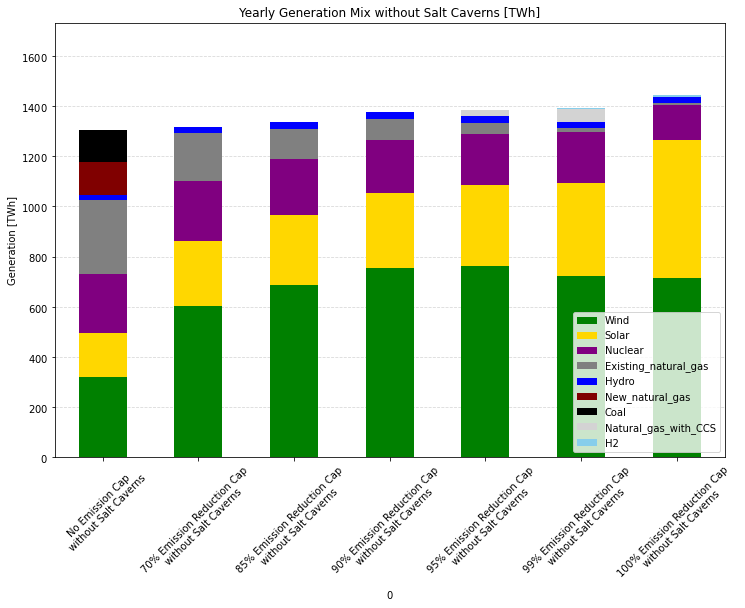

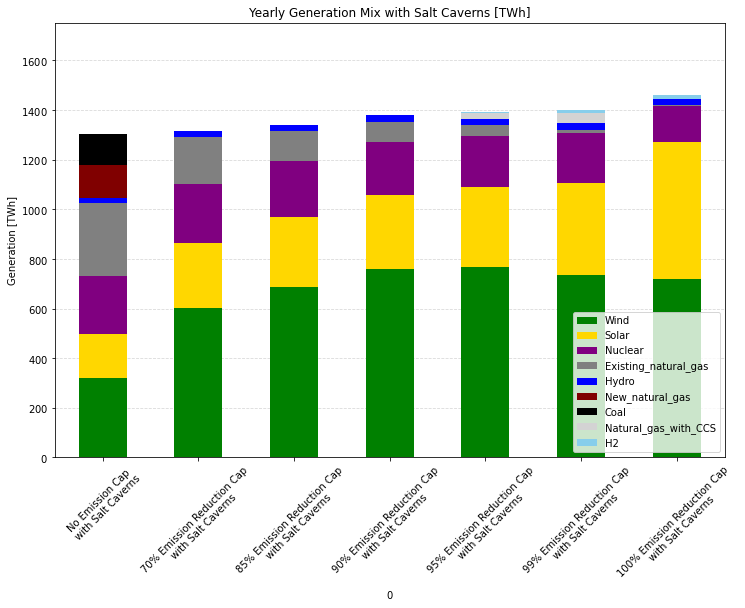

Index(['PJM_with_MI_no_caverns_0_red', 'PJM_with_MI_no_caverns_70_red',
       'PJM_with_MI_no_caverns_85_red', 'PJM_with_MI_no_caverns_90_red',
       'PJM_with_MI_no_caverns_95_red', 'PJM_with_MI_no_caverns_99_red',
       'PJM_with_MI_no_caverns_100_red'],
      dtype='object', name=0)
Scenarios present in 1 but missing in 2: Index([], dtype='object', name=0)
Scenarios present in 2 but missing in 1: Index([], dtype='object', name=0)


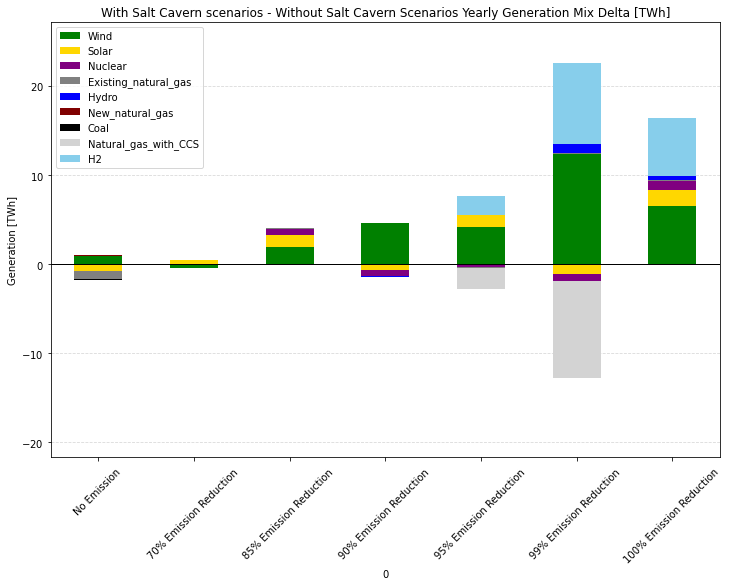

In [16]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Yearly Generation Mix Delta [TWh]"
y_label = "Generation [TWh]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, 
                            generation_power_barchart, title=title, y_label=y_label, units=1.1,
                            title_1='Yearly Generation Mix without Salt Caverns [TWh]',y_label_1='Generation [TWh]', units_1=1.1,
                            title_2='Yearly Generation Mix with Salt Caverns [TWh]',y_label_2='Generation [TWh]', units_2=1.1)

### Installed Capacity Comparison [GW]

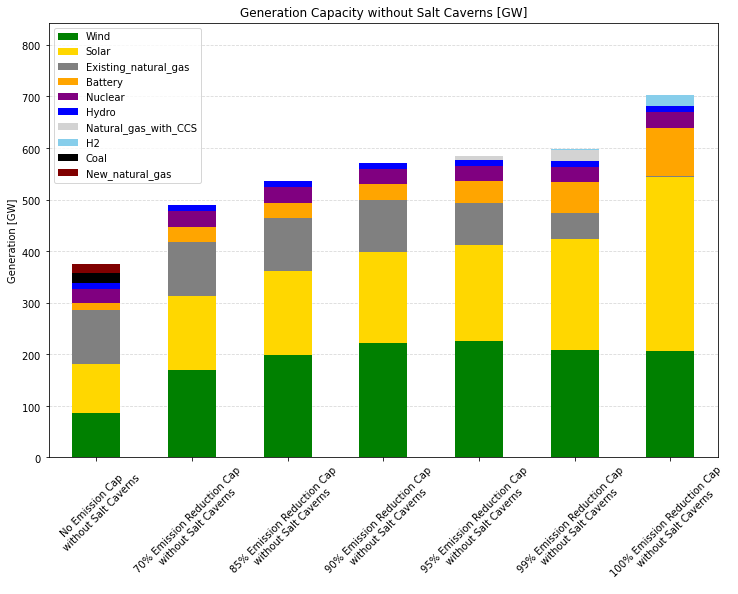

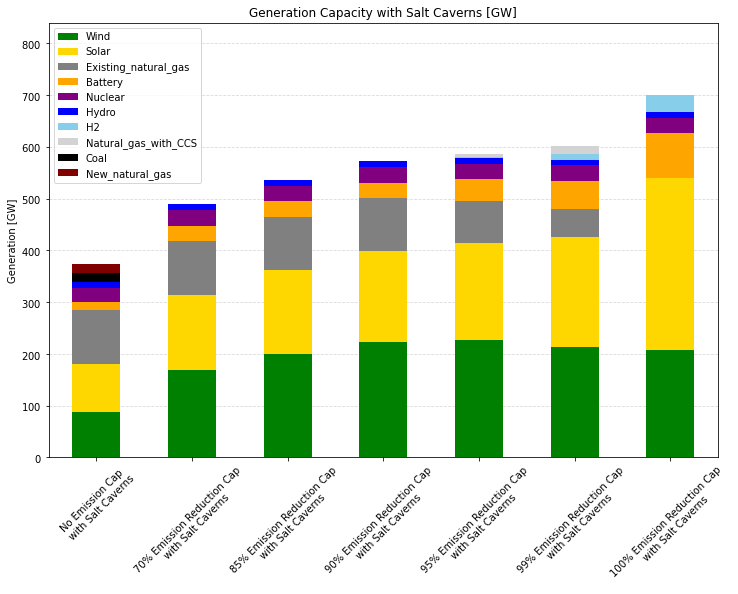

Index(['PJM_with_MI_no_caverns_0_red', 'PJM_with_MI_no_caverns_70_red',
       'PJM_with_MI_no_caverns_85_red', 'PJM_with_MI_no_caverns_90_red',
       'PJM_with_MI_no_caverns_95_red', 'PJM_with_MI_no_caverns_99_red',
       'PJM_with_MI_no_caverns_100_red'],
      dtype='object')
Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')


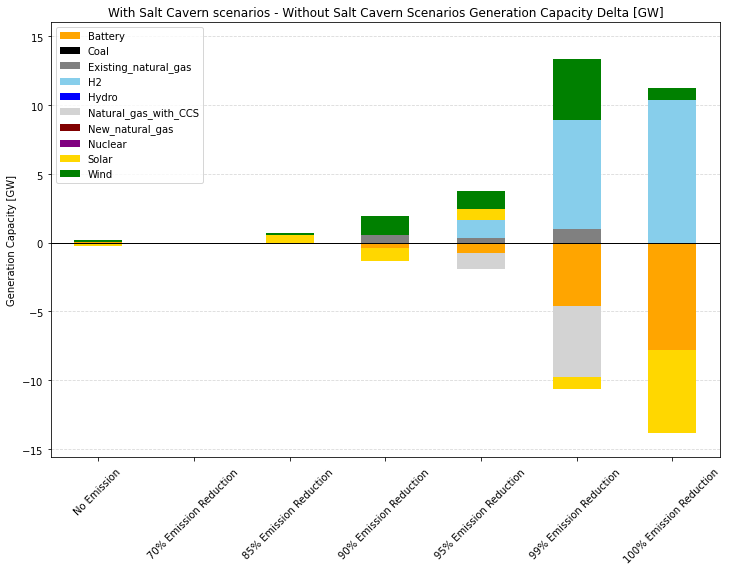

In [17]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Generation Capacity Delta [GW]"
y_label = "Generation Capacity [GW]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, generation_capacity_barchart,
                            title=title, y_label=y_label, units = 1,
                            title_1='Generation Capacity without Salt Caverns [GW]',y_label_1='Generation [GW]', units_1=1,
                            title_2='Generation Capacity with Salt Caverns [GW]',y_label_2='Generation [GW]', units_2=1)

### H2 Generation Capacity [Tons/hr]

In [18]:

def h2_storage_capacity_barchart(scenarios, title=title, y_label=y_label, units=2.1):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = h2_capacity_analysis(scenario)
        
        df = df[['Tech_Type', 'EndEnergyCap']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'EndEnergyCap': scenario})
        # removes rows with 0 (non-storage tech)
        df = df.loc[df[scenario] != 0]

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    
    
    # Sort ascending values
    df_main = df_main[df_main.sum().sort_values(ascending=False).index]
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)
    
def h2_capacity_generation(scenarios, title=title, y_label=y_label, units=2):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = h2_capacity_analysis(scenario)

        df = df[['Tech_Type', 'EndCap']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'EndCap': scenario})

        df = df[df['Tech_Type'] != 'Above_ground_storage']
        df = df[df['Tech_Type'] != 'Salt_cavern_storage']
        
        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    #print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)


def h2_generation(scenarios, title=title, y_label=y_label, units=2):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = h2_generation_analysis(scenario,H2_resource_categories=H2_resource_categories)


        df = df[['Tech_Type', 'AnnualSum']]
        df = df[df['Tech_Type'] != 'Total']
        df = df.rename(columns={'AnnualSum': scenario})#

        df = df[df['Tech_Type'] != 'Above_ground_storage']
        df = df[df['Tech_Type'] != 'Salt_cavern_storage']

        # Transpose the dataframe    
        df = df.set_index('Tech_Type').T
        #df.plot(kind='bar', stacked=True, label=scenario)
        
        df_main = df_main.append(df, ignore_index=False)
    #print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)


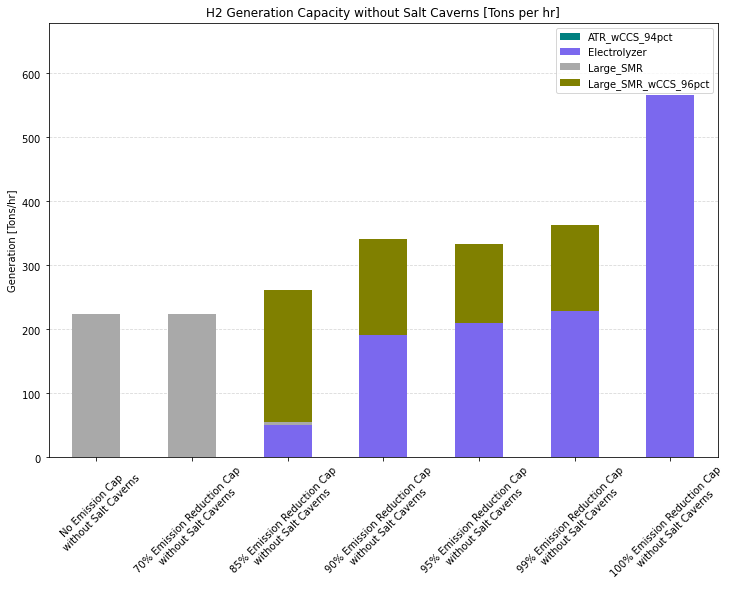

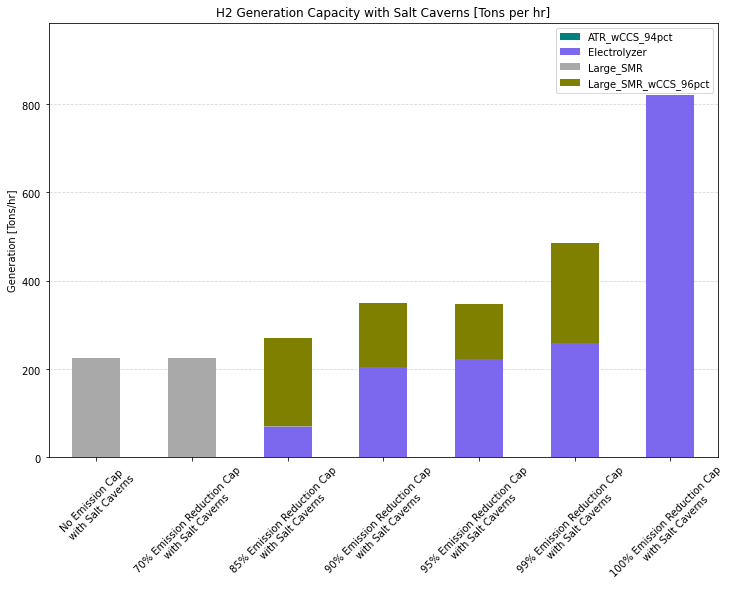

Index(['No Emission Cap', '70% Emission Reduction Cap',
       '85% Emission Reduction Cap', '90% Emission Reduction Cap',
       '95% Emission Reduction Cap', '99% Emission Reduction Cap',
       '100% Emission Reduction Cap'],
      dtype='object')
Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')


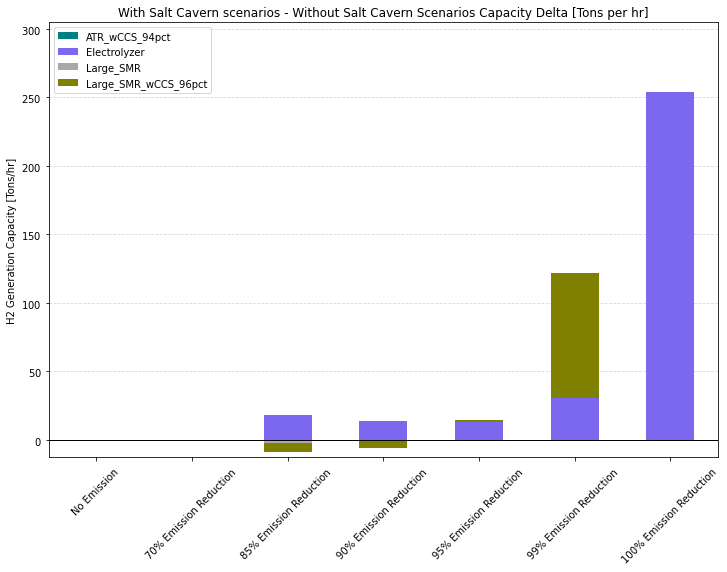

In [19]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Capacity Delta [Tons per hr]"
y_label = "H2 Generation Capacity [Tons/hr]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, h2_capacity_generation, units=2, title=title, y_label=y_label,
                            title_1='H2 Generation Capacity without Salt Caverns [Tons per hr]',y_label_1='Generation [Tons/hr]', units_1=2,
                            title_2='H2 Generation Capacity with Salt Caverns [Tons per hr]',y_label_2='Generation [Tons/hr]', units_2=2)

### H2 Yearly Generation [Mega Tons]

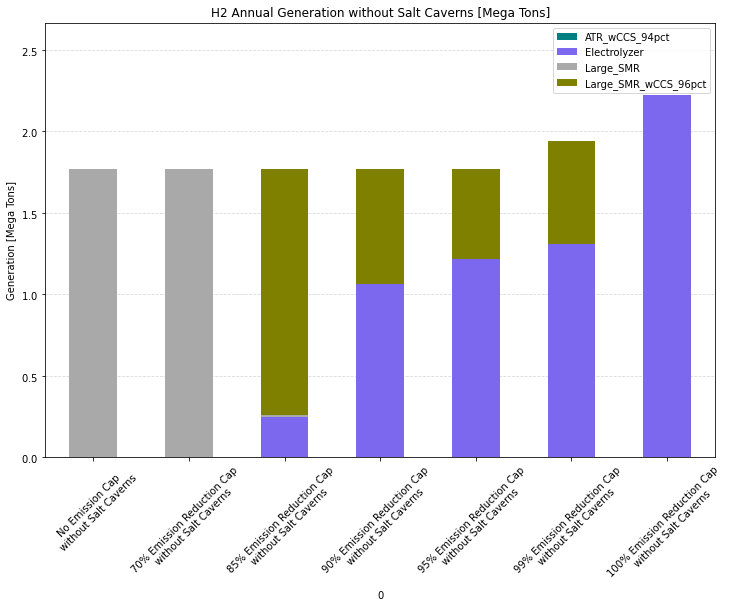

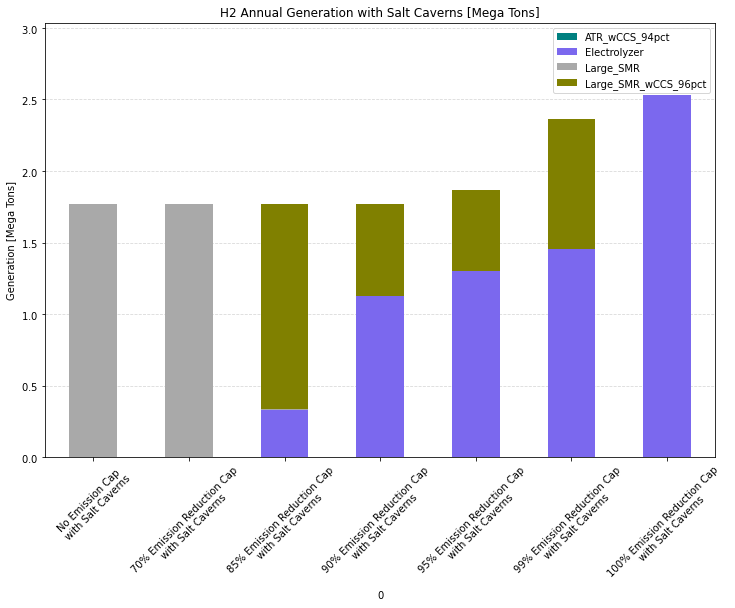

Index(['PJM_with_MI_no_caverns_0_red', 'PJM_with_MI_no_caverns_70_red',
       'PJM_with_MI_no_caverns_85_red', 'PJM_with_MI_no_caverns_90_red',
       'PJM_with_MI_no_caverns_95_red', 'PJM_with_MI_no_caverns_99_red',
       'PJM_with_MI_no_caverns_100_red'],
      dtype='object', name=0)
Scenarios present in 1 but missing in 2: Index([], dtype='object', name=0)
Scenarios present in 2 but missing in 1: Index([], dtype='object', name=0)


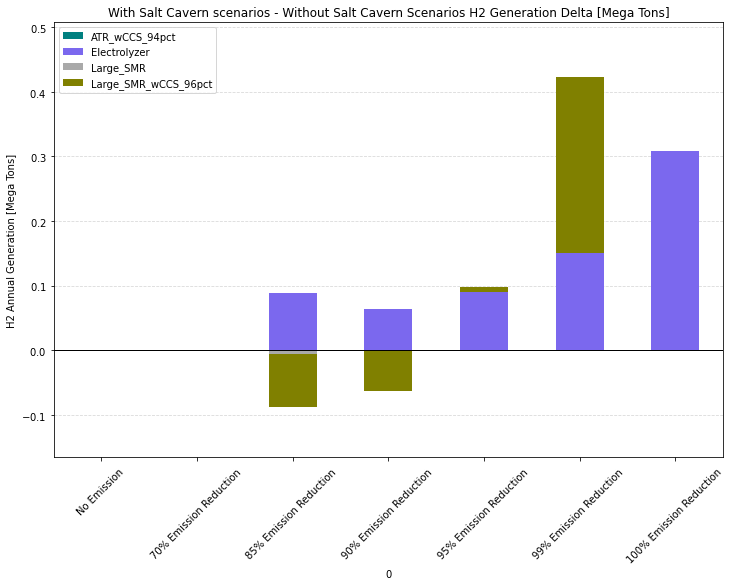

In [20]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios H2 Generation Delta [Mega Tons]"
y_label = "H2 Annual Generation [Mega Tons]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, h2_generation, units=2.2, title=title, y_label=y_label,
                            title_1='H2 Annual Generation without Salt Caverns [Mega Tons]',y_label_1='Generation [Mega Tons]', units_1=2.2,
                            title_2='H2 Annual Generation with Salt Caverns [Mega Tons]',y_label_2='Generation [Mega Tons]', units_2=2.2)

### Curtailment Analysis

In [21]:
def curtailment_analysis(scenario, generation_resource_categories=generation_resource_categories):
    df = open_results_file('curtail.csv', scenario)
    df = df.T
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df[1:]
    df = identify_tech_type(df, generation_resource_categories, aggregate=False)
    df.set_index('Resource', inplace=True)
    df = df[(df['Tech_Type'] == 'Solar') | (df['Tech_Type'] == 'Wind')]

    
    return(df)

def curtailment_barchart(scenarios, title=title, y_label=y_label, units=1):
    df_main = pd.DataFrame()

    for scenario in scenarios:
        df = curtailment_analysis(scenario)
        
        df_tech = df.groupby(['Tech_Type']).sum()
        df_tech = df_tech.rename(columns={'AnnualSum': scenario})
       
        df_tech = df_tech[scenario]
        
        
        df_main = df_main.append(df_tech, ignore_index=False)

    #print(df_main)
    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)

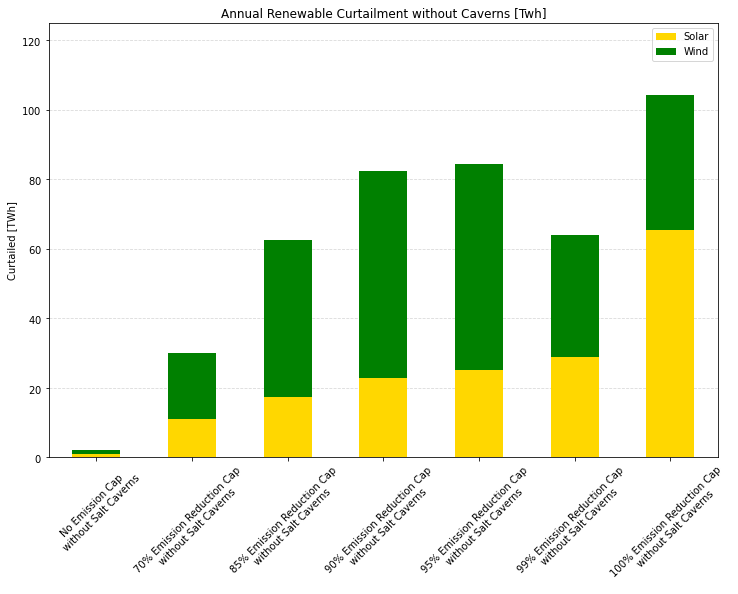

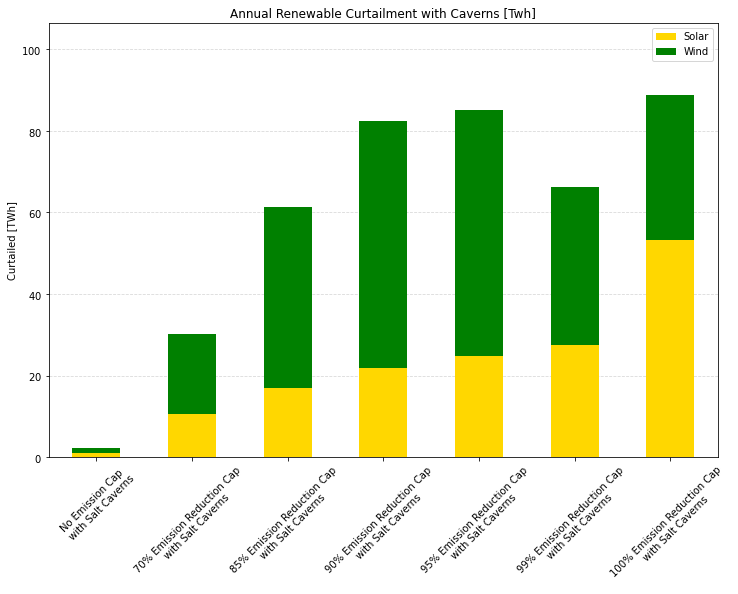

Index(['PJM_with_MI_no_caverns_0_red', 'PJM_with_MI_no_caverns_70_red',
       'PJM_with_MI_no_caverns_85_red', 'PJM_with_MI_no_caverns_90_red',
       'PJM_with_MI_no_caverns_95_red', 'PJM_with_MI_no_caverns_99_red',
       'PJM_with_MI_no_caverns_100_red'],
      dtype='object')
Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')


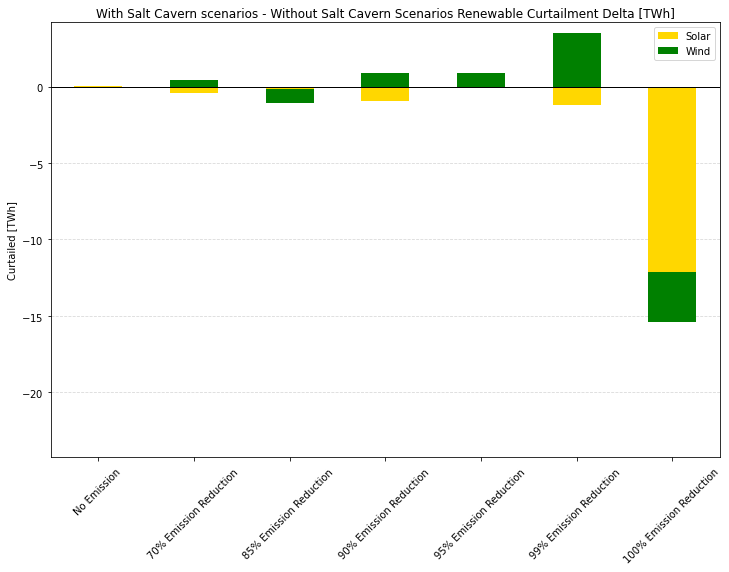

In [22]:
title = "With Salt Cavern scenarios - Without Salt Cavern Scenarios Renewable Curtailment Delta [TWh]"
y_label = "Curtailed [TWh]"

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, curtailment_barchart, units=1.1, title=title, y_label=y_label,
                            title_1='Annual Renewable Curtailment without Caverns [Twh]',y_label_1='Curtailed [TWh]', units_1=1.1,
                            title_2='Annual Renewable Curtailment with Caverns [Twh]',y_label_2='Curtailed [TWh]', units_2=1.1)

### Cost Analysis

In [23]:

 

def costs_breakdown(scenarios, title=title, y_label=y_label, units=3):

    df_main = pd.DataFrame()
    for scenario in scenarios:

        df = open_results_file('costs_system.csv', scenario)
        # Set 'Costs' as the index
        df.set_index('Costs', inplace=True)

        # Keep only the 'Total' column
        df = df[['Total']]
        #df = df[df['Total'] != 0]
        df = df.rename(columns={'Total': scenario})
        df = df.drop('cTotal', errors='ignore')
        df = df.drop('cPower_Total', errors='ignore')
        df = df.drop('cHSC_Total', errors='ignore')
        df = df.drop('cCSC_Total', errors='ignore')
        # Join dataframes
        if df_main.empty:
            df_main = df
        else:
            df_main = df_main.join(df, how='outer')

    # Remove rows where all values are NaN
    df_main = df_main.dropna(how='all')
    # Remove 'cTotal' row
    df_main = df_main.drop('cTotal', errors='ignore')
    df_main = df_main.T

    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)
    
def costs_scenarios(scenarios, title=title, y_label=y_label, units=3):
    
    df_main = pd.DataFrame()
    for scenario in scenarios:

        df = open_results_file('costs_system.csv', scenario)
        # Set 'Costs' as the index
        df.set_index('Costs', inplace=True)

        # Keep only the 'Total' column and 'cTotal' row
        df = df.loc[['cTotal'], ['Total']]
        df = df.rename(columns={'Total': scenario})
        # Join dataframes
        if df_main.empty:
            df_main = df
        else:
            df_main = df_main.join(df, how='outer')

        # Find the scenario that contains 'NoCap'
    base_scenario = df_main.columns[df_main.columns.str.contains('NoCap')][0]
            
    # Transpose the DataFrame so that the scenarios are the rows and costs are the columns
    df_main = df_main.T

    # Normalize the data with respect to the 'NoCap' scenario and convert to percentage increase
    df_main = (df_main / df_main.loc[base_scenario])

    plot_stacked_barchart(df_main, title=title, y_label=y_label, units=units)
    return(df_main)



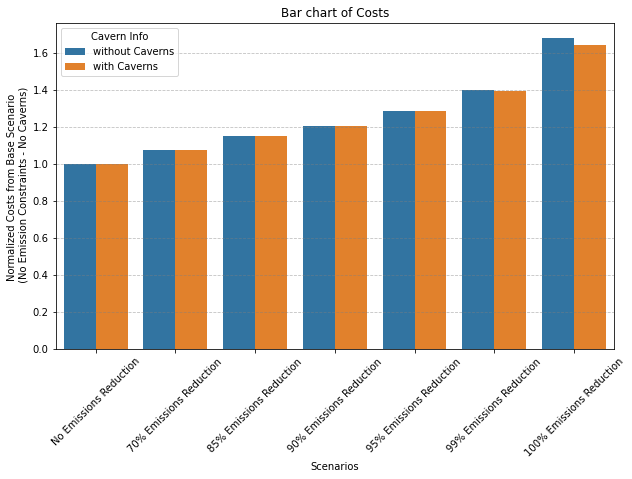

In [24]:
def extract_emission_scenario(s):
    if '_0_red' in s:
        return 'No Emissions Reduction'
    else:
        reduction = s.split('_')[-2]
        return f'{reduction}% Emissions Reduction'

    
scenarios_without_caverns = scenarios_no_caverns
scenarios_with_caverns

df_main = pd.DataFrame()
cavern_info = {} # Here's where we'll store the metadata

base_scenario = [s for s in scenarios_without_caverns if '_0_red' in s and 'no_cavern' in s][0]
df_base_scenario = open_results_file('costs_system.csv', base_scenario)
df_base_scenario.set_index('Costs', inplace=True)
df_base_scenario = df_base_scenario.loc[['cTotal'], ['Total']]
df_base_scenario = df_base_scenario.rename(columns={'Total': base_scenario})
base_scenario_cost = df_base_scenario.iloc[0][0]

for scenario in scenarios_without_caverns + scenarios_with_caverns:

    df = open_results_file('costs_system.csv', scenario)
    df.set_index('Costs', inplace=True)
    df = df.loc[['cTotal'], ['Total']]
    df = df.rename(columns={'Total': scenario})

    cavern_info[scenario] = 'with Caverns' if scenario in scenarios_with_caverns else 'without Caverns' # Update the metadata

    if df_main.empty:
        df_main = df
    else:
        df_main = df_main.join(df, how='outer')

df_main = df_main.T
df_main = df_main.astype(float) / base_scenario_cost
df_main.sort_values('cTotal')


df_plot = df_main.copy()#.sort_values('cTotal')
df_plot['Cavern Info'] = df_plot.index.map(cavern_info) # Add the metadata back    

    
# Reset the index so we can use the 'Scenario' as a column
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'Scenario'}, inplace=True)

# Create the new column 'Emission Scenario' using the function defined above
df_plot['Emission Scenario'] = df_plot['Scenario'].apply(extract_emission_scenario)



plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x='Emission Scenario', y='cTotal', hue='Cavern Info')
plt.title('Total Costs for Different Emission Scenarios')
plt.ylabel('Total Costs')
plt.xlabel('Emission Scenarios')
plt.grid(True,linestyle='--', which='major', color='gray', alpha=.5, axis='y') 
plt.xlabel('Scenarios')  
plt.ylabel('Normalized Costs from Base Scenario \n (No Emission Constraints - No Caverns)')
plt.title('Bar chart of Costs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Cavern Info')
plt.show()



                               Difference  Order
99% Emission Reduction Cap\n    -0.005566      6
85% Emission Reduction Cap\n    -0.000219      3
95% Emission Reduction Cap\n    -0.002424      5
100% Emission Reduction Cap\n   -0.036170      7
90% Emission Reduction Cap\n    -0.001422      4
No Emission Cap\n               -0.000658      1
70% Emission Reduction Cap\n     0.000004      2


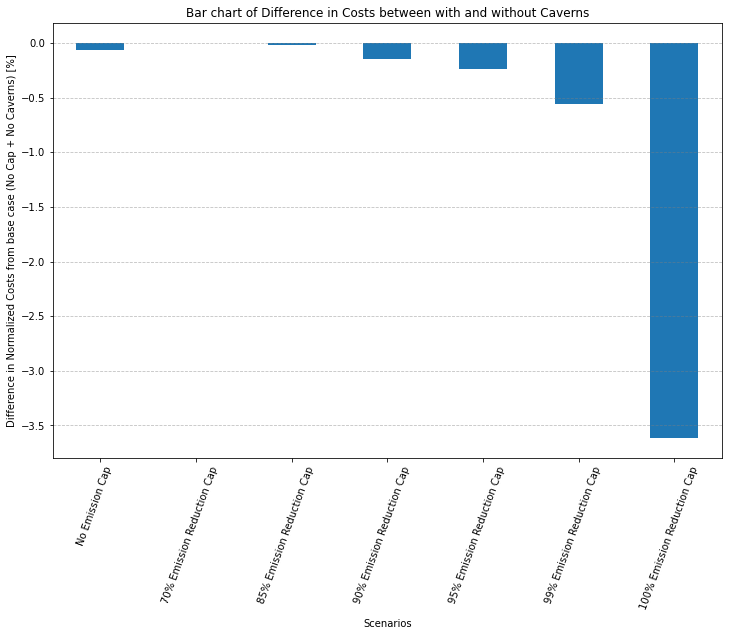

In [25]:
scenarios_without_caverns = scenarios_no_caverns

df_main = pd.DataFrame()
cavern_info = {} # Here's where we'll store the metadata

base_scenario = [s for s in scenarios_without_caverns if '_0_red' in s and 'no_cavern' in s][0]
df_base_scenario = open_results_file('costs_system.csv', base_scenario)
df_base_scenario.set_index('Costs', inplace=True)
df_base_scenario = df_base_scenario.loc[['cTotal'], ['Total']]
df_base_scenario = df_base_scenario.rename(columns={'Total': base_scenario})
base_scenario_cost = df_base_scenario.iloc[0][0]

for scenario in scenarios_without_caverns + scenarios_with_caverns:

    df = open_results_file('costs_system.csv', scenario)
    df.set_index('Costs', inplace=True)
    df = df.loc[['cTotal'], ['Total']]
    df = df.rename(columns={'Total': scenario})

    cavern_info[scenario] = 'with Caverns' if scenario in scenarios_with_caverns else 'without Caverns' # Update the metadata

    if df_main.empty:
        df_main = df
    else:
        df_main = df_main.join(df, how='outer')

df_main = df_main.T
df_main = (df_main.astype(float) - base_scenario_cost) / base_scenario_cost
df_main.sort_values('cTotal')

df_plot = df_main.copy()
df_plot['Cavern Info'] = df_plot.index.map(cavern_info) # Add the metadata back
df_plot.rename(index=rename_dict, inplace=True)

# List to hold the differences
differences = []

# Loop over unique scenario names
for scenario in set(df_plot.index.str.replace(" with Salt Caverns", "").str.replace(" without Salt Caverns", "")):
    # Get the values for the scenario with and without caverns
    with_caverns = df_plot.loc[scenario + " with Salt Caverns", "cTotal"]
    without_caverns = df_plot.loc[scenario + " without Salt Caverns", "cTotal"]
    
    # Calculate the difference and append to the list
    differences.append(with_caverns - without_caverns)

# Create a new DataFrame with the differences
df_differences = pd.DataFrame(differences, index=set(df_plot.index.str.replace(" with Salt Caverns", "").str.replace(" without Salt Caverns", "")), columns=["Difference"])



# Define the order
order_dict = {"No Emission Cap\n": 1,
              "70% Emission Reduction Cap\n": 2,
              "85% Emission Reduction Cap\n": 3,
              "90% Emission Reduction Cap\n": 4,
              "95% Emission Reduction Cap\n": 5,
              "99% Emission Reduction Cap\n": 6,
              "100% Emission Reduction Cap\n": 7}

# Add a new column to the DataFrame with the order
df_differences["Order"] = df_differences.index.map(order_dict)
print(df_differences)
# Sort by the new column
df_differences.sort_values("Order", inplace=True)

# Drop the order column
df_differences.drop("Order", axis=1, inplace=True)

# Plot the differences
# Convert 'Difference' to percentage
df_differences['Difference'] = df_differences['Difference'] * 100


# Create a figure with specified size (width, height)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot
df_differences.plot(kind='bar', legend=False, ax=ax)
plt.grid(True, linestyle='--', which='major', color='gray', alpha=.5, axis='y')
plt.xlabel('Scenarios')  
plt.ylabel('Difference in Normalized Costs from base case (No Cap + No Caverns) [%]')  # indicate percentages in y-label
plt.title('Bar chart of Difference in Costs between with and without Caverns')
plt.xticks(rotation=70)  # Rotate x-axis labels for better visibility
plt.show()

#save_and_show_plot(fig, 'your_image_name')




### Emissions Analysis

## With Above Ground Storage vs. Without Above Ground Storage

### Yearly Generation [TWh]

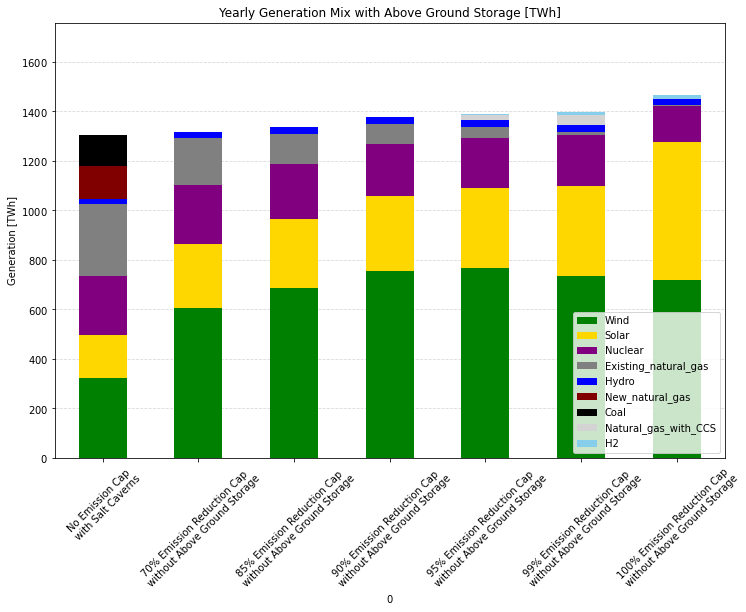

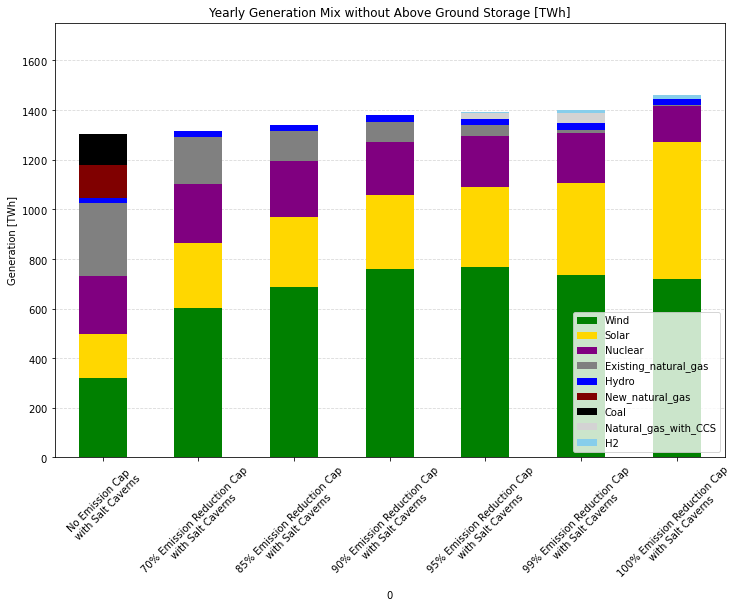

Index(['PJM_with_MI_no_above_ground_storage_0_red',
       'PJM_with_MI_no_above_ground_storage_70_red',
       'PJM_with_MI_no_above_ground_storage_85_red',
       'PJM_with_MI_no_above_ground_storage_90_red',
       'PJM_with_MI_no_above_ground_storage_95_red',
       'PJM_with_MI_no_above_ground_storage_99_red',
       'PJM_with_MI_no_above_ground_storage_100_red'],
      dtype='object', name=0)
Scenarios present in 1 but missing in 2: Index([], dtype='object', name=0)
Scenarios present in 2 but missing in 1: Index([], dtype='object', name=0)


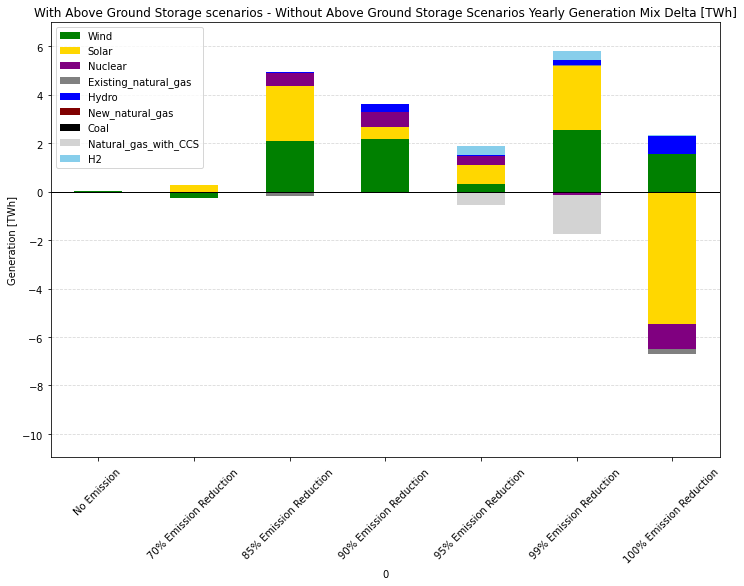

In [26]:
title = "With Above Ground Storage scenarios - Without Above Ground Storage Scenarios Yearly Generation Mix Delta [TWh]"
y_label = "Generation [TWh]"

df_diff = compare_scenarios(scenarios_no_above_ground_storage, scenarios_with_caverns,
                            generation_power_barchart, title=title, y_label=y_label, units=1.1,
                            title_1='Yearly Generation Mix with Above Ground Storage [TWh]',y_label_1='Generation [TWh]', units_1=1.1,
                            title_2='Yearly Generation Mix without Above Ground Storage [TWh]',y_label_2='Generation [TWh]', units_2=1.1)

### Installed Capacity Comparison [GW]

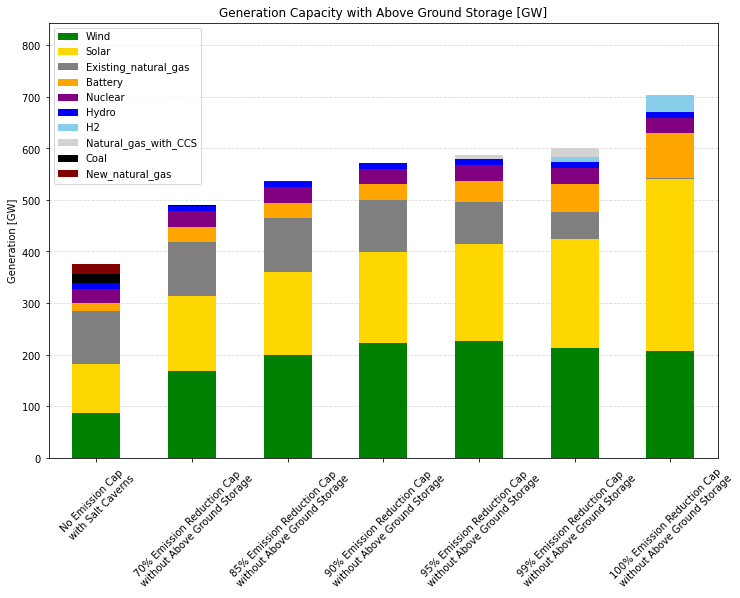

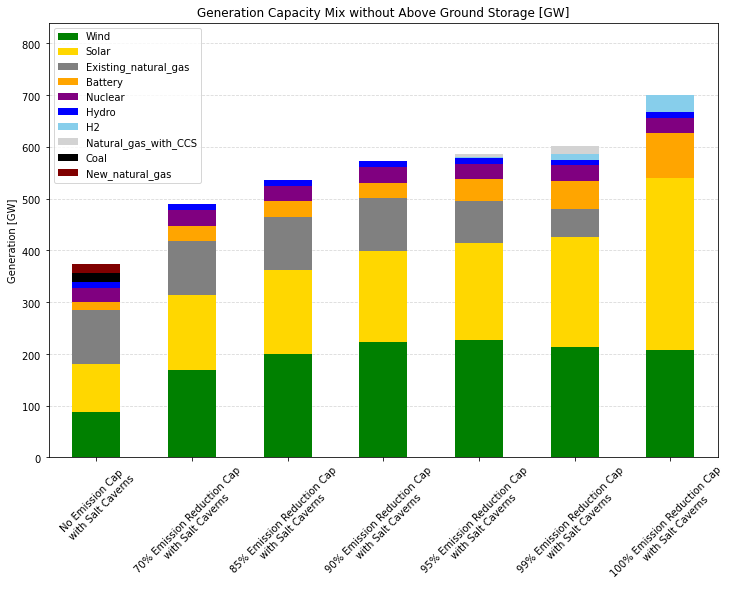

Index(['PJM_with_MI_no_above_ground_storage_0_red',
       'PJM_with_MI_no_above_ground_storage_70_red',
       'PJM_with_MI_no_above_ground_storage_85_red',
       'PJM_with_MI_no_above_ground_storage_90_red',
       'PJM_with_MI_no_above_ground_storage_95_red',
       'PJM_with_MI_no_above_ground_storage_99_red',
       'PJM_with_MI_no_above_ground_storage_100_red'],
      dtype='object')
Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')


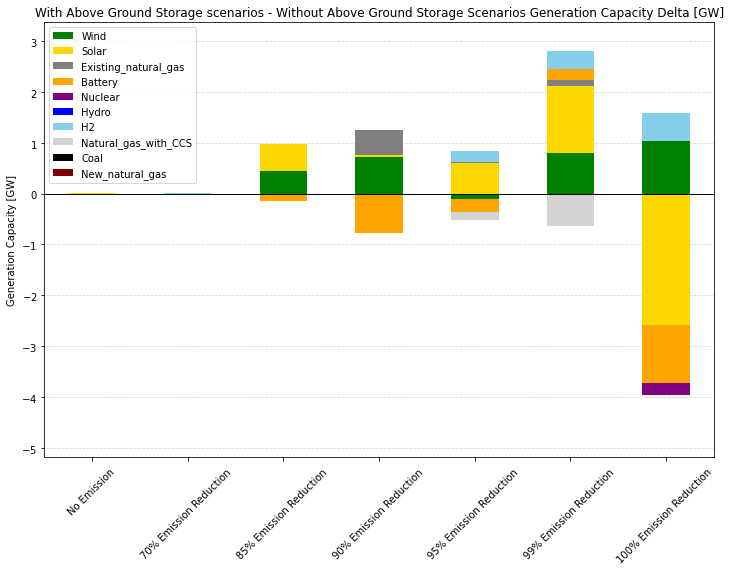

In [27]:
title = "With Above Ground Storage scenarios - Without Above Ground Storage Scenarios Generation Capacity Delta [GW]"
y_label = "Generation Capacity [GW]"

df_diff = compare_scenarios(scenarios_no_above_ground_storage, scenarios_with_caverns, generation_capacity_barchart,
                            title=title, y_label=y_label, units = 1,
                            title_1='Generation Capacity with Above Ground Storage [GW]',y_label_1='Generation [GW]', units_1=1,
                            title_2='Generation Capacity Mix without Above Ground Storage [GW]',y_label_2='Generation [GW]', units_2=1)

### H2 Generation Capacity [Tons/hr]

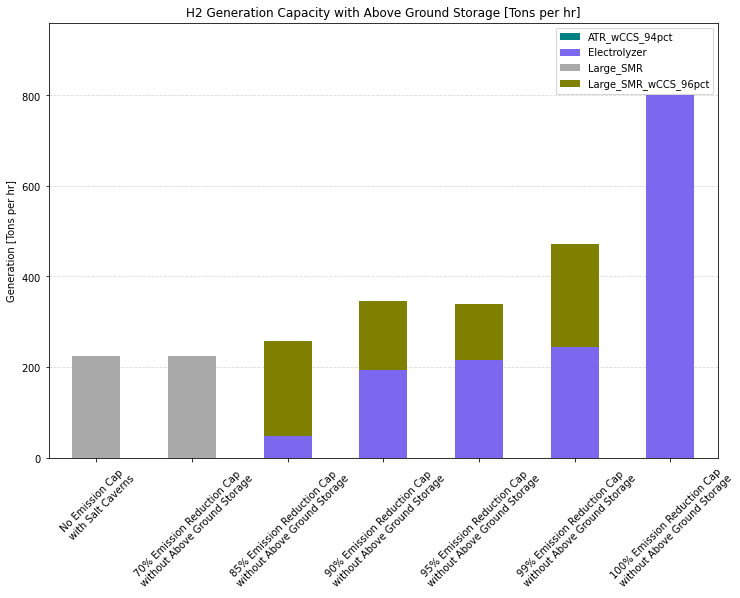

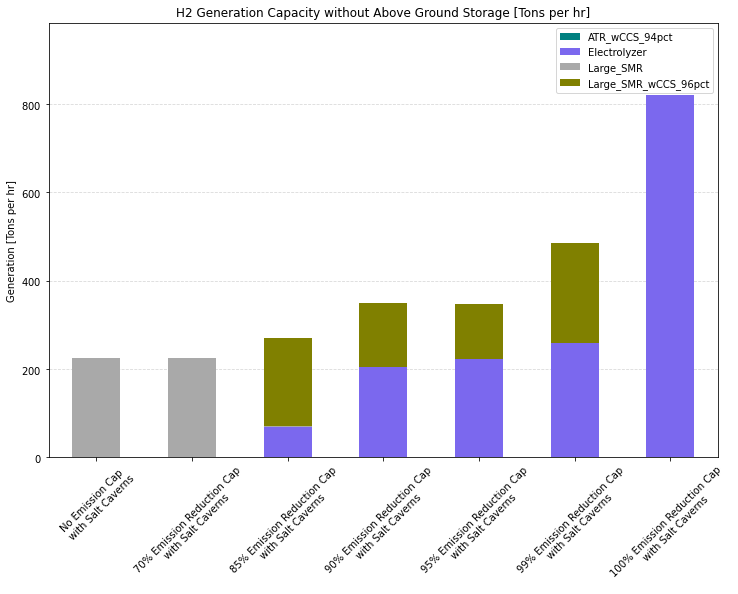

Index(['No Emission Cap', '70% Emission Reduction Cap',
       '85% Emission Reduction Cap', '90% Emission Reduction Cap',
       '95% Emission Reduction Cap', '99% Emission Reduction Cap',
       '100% Emission Reduction Cap'],
      dtype='object')
Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')


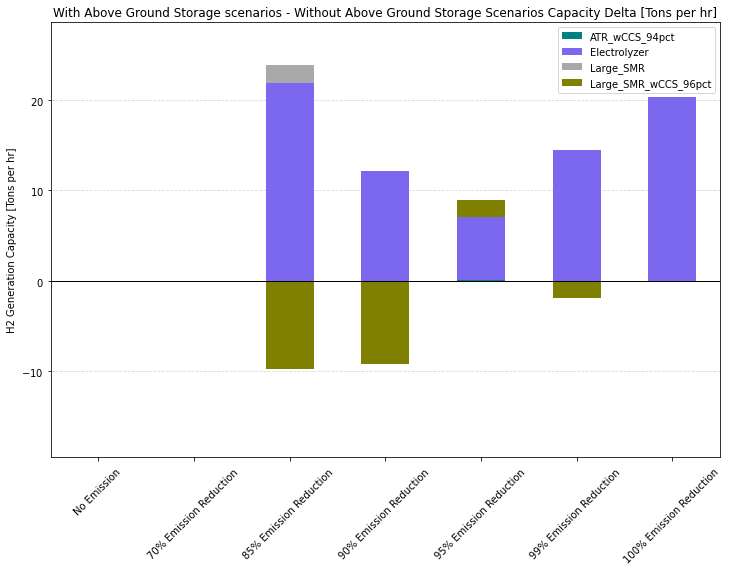

In [28]:
title = "With Above Ground Storage scenarios - Without Above Ground Storage Scenarios Capacity Delta [Tons per hr]"
y_label = "H2 Generation Capacity [Tons per hr]"

df_diff = compare_scenarios(scenarios_no_above_ground_storage, scenarios_with_caverns,
                            h2_capacity_generation, units=2, title=title, y_label=y_label,
                            title_1='H2 Generation Capacity with Above Ground Storage [Tons per hr]',y_label_1='Generation [Tons per hr]', units_1=2,
                            title_2='H2 Generation Capacity without Above Ground Storage [Tons per hr]',y_label_2='Generation [Tons per hr]', units_2=2)

### H2 Yearly Generation [Mega Tons]

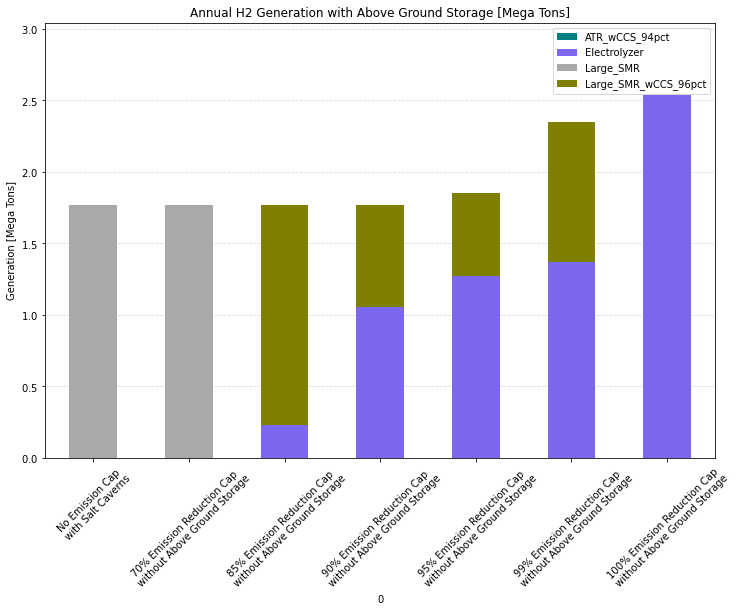

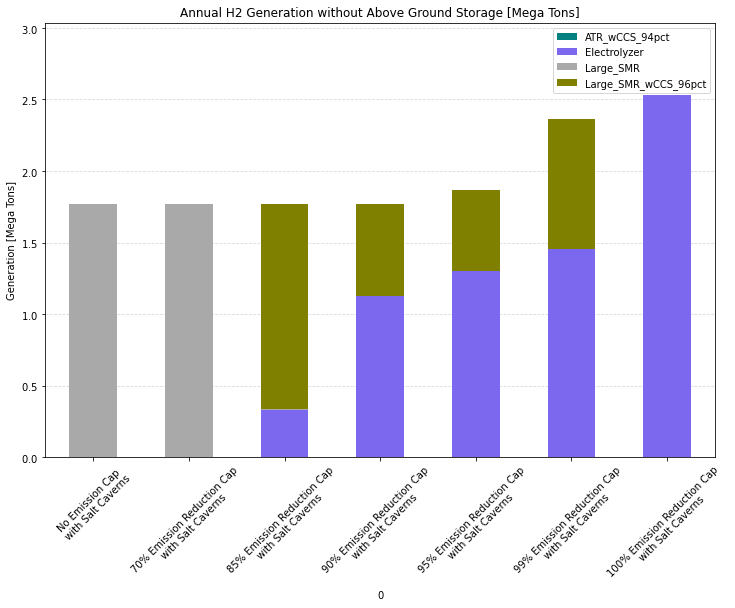

Index(['PJM_with_MI_no_above_ground_storage_0_red',
       'PJM_with_MI_no_above_ground_storage_70_red',
       'PJM_with_MI_no_above_ground_storage_85_red',
       'PJM_with_MI_no_above_ground_storage_90_red',
       'PJM_with_MI_no_above_ground_storage_95_red',
       'PJM_with_MI_no_above_ground_storage_99_red',
       'PJM_with_MI_no_above_ground_storage_100_red'],
      dtype='object', name=0)
Scenarios present in 1 but missing in 2: Index([], dtype='object', name=0)
Scenarios present in 2 but missing in 1: Index([], dtype='object', name=0)


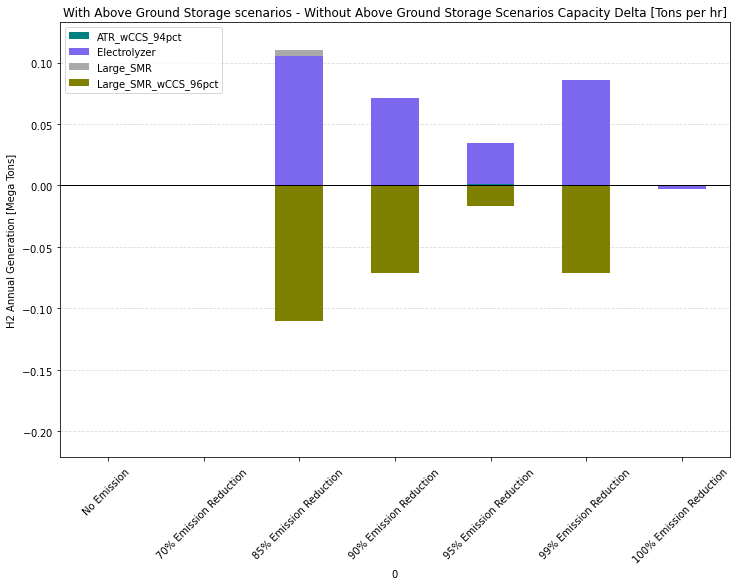

In [29]:
title = "With Above Ground Storage scenarios - Without Above Ground Storage Scenarios Capacity Delta [Tons per hr]"
y_label = "H2 Annual Generation [Mega Tons]"

df_diff = compare_scenarios(scenarios_no_above_ground_storage, scenarios_with_caverns,
                            h2_generation, units=2.2, title=title, y_label=y_label,
                             title_1='Annual H2 Generation with Above Ground Storage [Mega Tons]',y_label_1='Generation [Mega Tons]', units_1=2.2,
                            title_2='Annual H2 Generation without Above Ground Storage [Mega Tons]',y_label_2='Generation [Mega Tons]', units_2=2.2)

### Curtailment Analysis

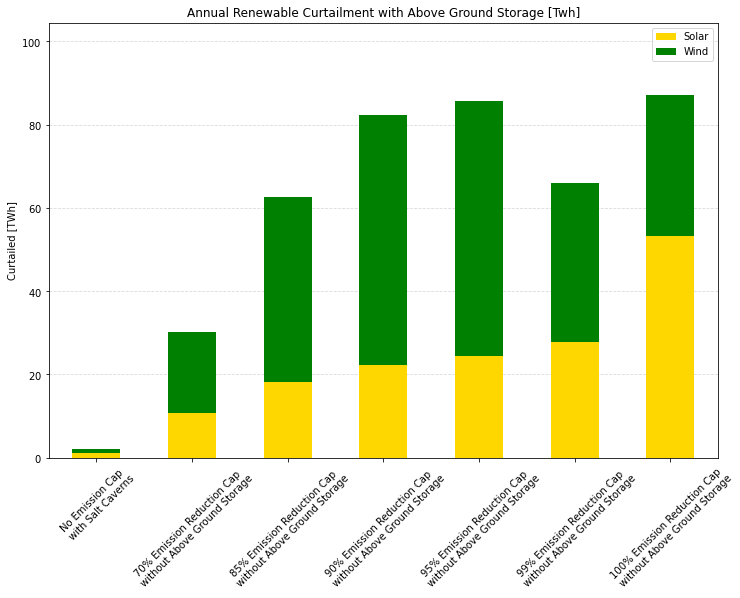

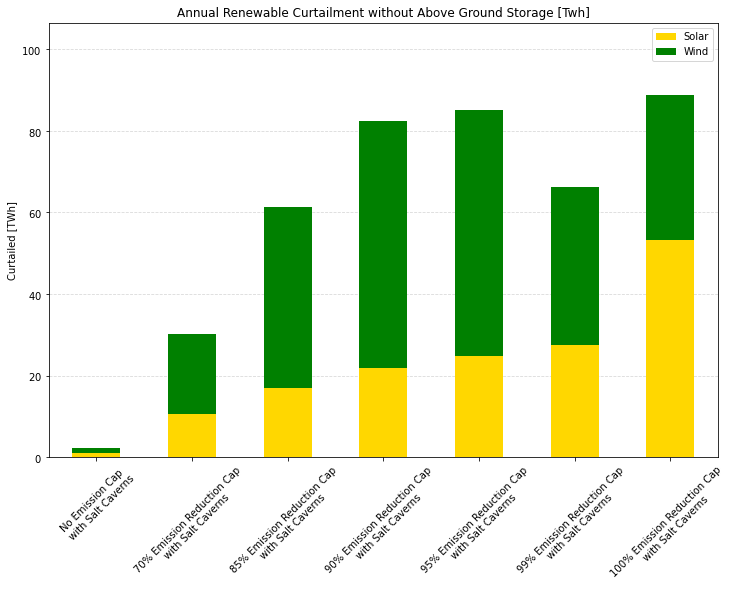

Index(['PJM_with_MI_no_above_ground_storage_0_red',
       'PJM_with_MI_no_above_ground_storage_70_red',
       'PJM_with_MI_no_above_ground_storage_85_red',
       'PJM_with_MI_no_above_ground_storage_90_red',
       'PJM_with_MI_no_above_ground_storage_95_red',
       'PJM_with_MI_no_above_ground_storage_99_red',
       'PJM_with_MI_no_above_ground_storage_100_red'],
      dtype='object')
Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')


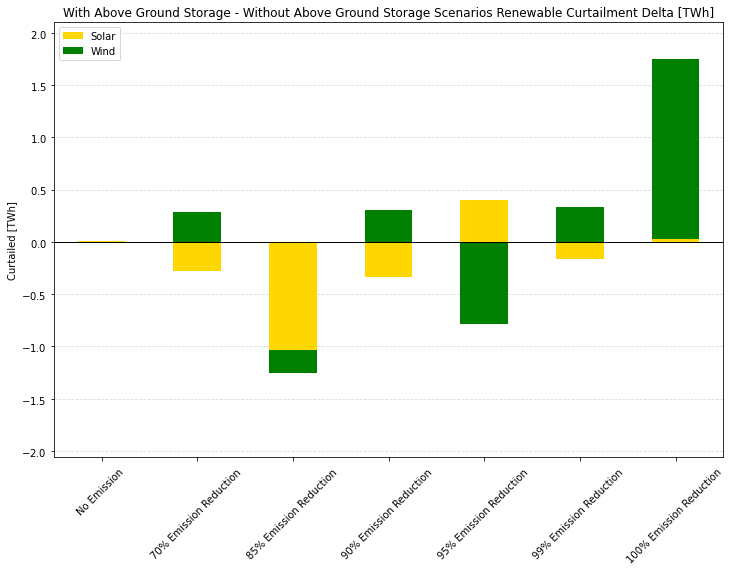

In [30]:
title = "With Above Ground Storage - Without Above Ground Storage Scenarios Renewable Curtailment Delta [TWh]"
y_label = "Curtailed [TWh]"

df_diff = compare_scenarios(scenarios_no_above_ground_storage, scenarios_with_caverns,
                            curtailment_barchart, units=1.1, title=title, y_label=y_label,
                            title_1='Annual Renewable Curtailment with Above Ground Storage [Twh]',y_label_1='Curtailed [TWh]', units_1=1.1,
                            title_2='Annual Renewable Curtailment without Above Ground Storage [Twh]',y_label_2='Curtailed [TWh]', units_2=1.1)

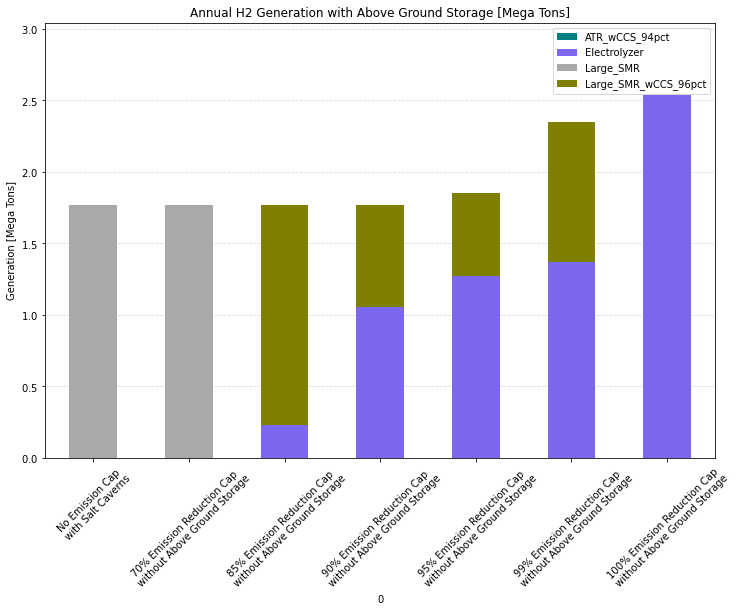

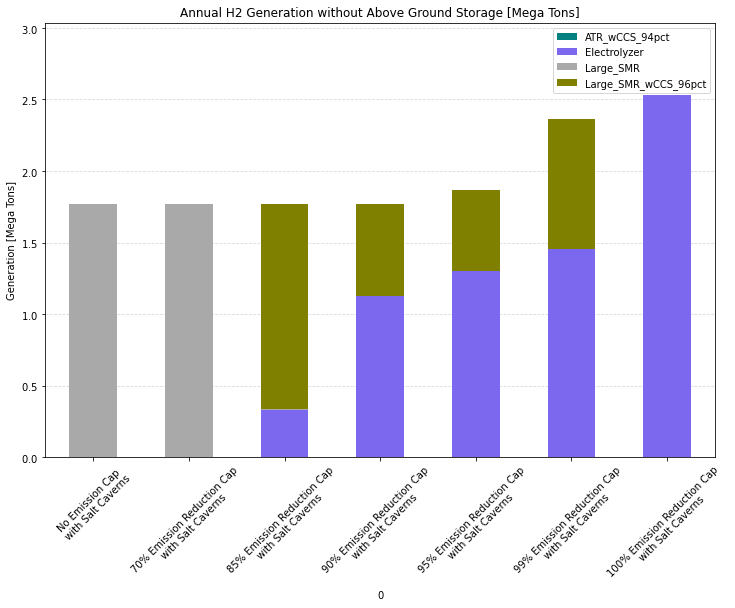

Index(['PJM_with_MI_no_above_ground_storage_0_red',
       'PJM_with_MI_no_above_ground_storage_70_red',
       'PJM_with_MI_no_above_ground_storage_85_red',
       'PJM_with_MI_no_above_ground_storage_90_red',
       'PJM_with_MI_no_above_ground_storage_95_red',
       'PJM_with_MI_no_above_ground_storage_99_red',
       'PJM_with_MI_no_above_ground_storage_100_red'],
      dtype='object', name=0)
Scenarios present in 1 but missing in 2: Index([], dtype='object', name=0)
Scenarios present in 2 but missing in 1: Index([], dtype='object', name=0)


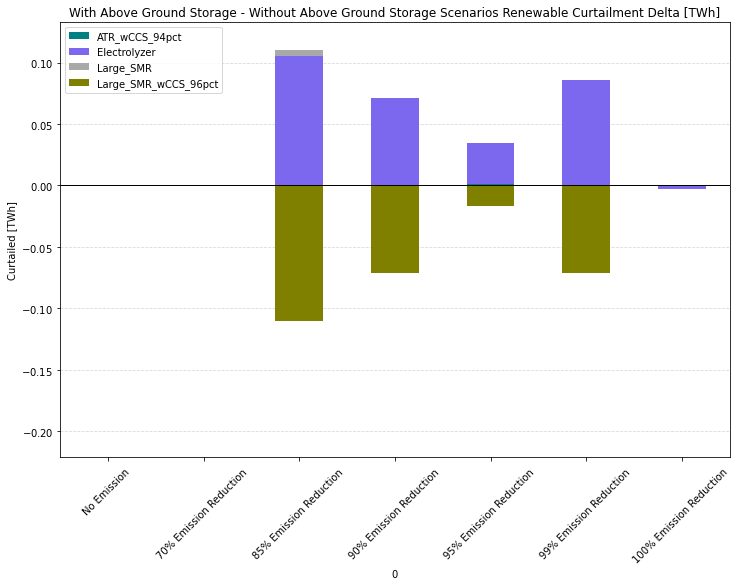

In [31]:
df_diff = compare_scenarios(scenarios_no_above_ground_storage, scenarios_with_caverns,
                            h2_generation, units=2.2, title=title, y_label=y_label,
                             title_1='Annual H2 Generation with Above Ground Storage [Mega Tons]',y_label_1='Generation [Mega Tons]', units_1=2.2,
                            title_2='Annual H2 Generation without Above Ground Storage [Mega Tons]',y_label_2='Generation [Mega Tons]', units_2=2.2)

# Broad Scenarios Barcharts

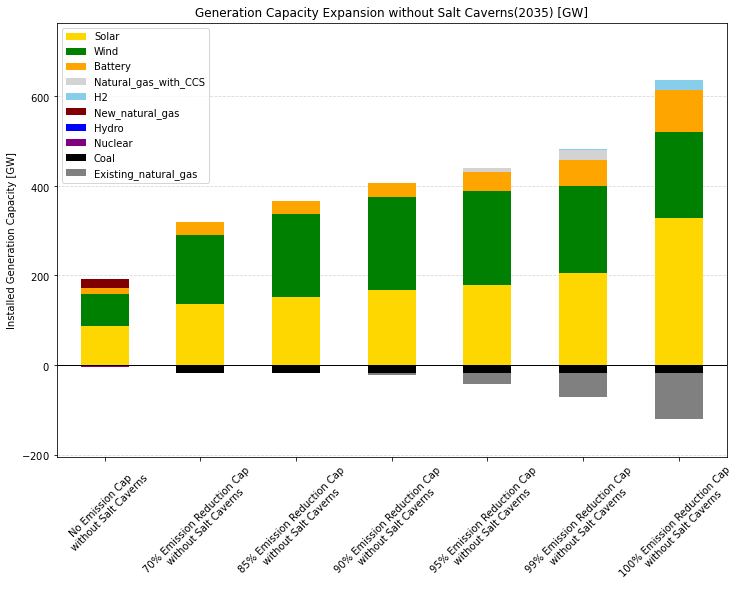

Tech_Type                               Solar           Wind       Battery  \
PJM_with_MI_no_caverns_0_red     86361.846299   72055.928257  14706.823588   
PJM_with_MI_no_caverns_70_red   136076.290398  154296.934560  29703.493825   
PJM_with_MI_no_caverns_85_red   153054.848363  184363.890770  29522.204451   
PJM_with_MI_no_caverns_90_red   168292.389472  207639.364165  30422.304576   
PJM_with_MI_no_caverns_95_red   178566.359324  210856.800292  42151.597511   
PJM_with_MI_no_caverns_99_red   206640.468414  193329.317802  58820.192150   
PJM_with_MI_no_caverns_100_red  329044.331703  192197.458351  93646.185536   

Tech_Type                       Natural_gas_with_CCS            H2  \
PJM_with_MI_no_caverns_0_red                0.481686     10.009012   
PJM_with_MI_no_caverns_70_red               0.237258      0.569024   
PJM_with_MI_no_caverns_85_red               0.481546      0.572194   
PJM_with_MI_no_caverns_90_red               1.309567      1.102483   
PJM_with_MI_no_caverns_95_red            8057.630893     39.266734   
PJM_with_MI_no_caverns_99_red           20186.024879   3499.402755   
PJM_with_MI_no_caverns_100_red              0.000000  22234.588943   

Tech_Type                       New_natural_gas  Hydro      Nuclear  \
PJM_with_MI_no_caverns_0_red       18007.952675    0.0 -3332.965083   
PJM_with_MI_no_caverns_70_red          2.801004    0.0     0.085555   
PJM_with_MI_no_caverns_85_red          0.706349    0.0     0.087236   
PJM_with_MI_no_caverns_90_red          0.588292    0.0     0.106702   
PJM_with_MI_no_caverns_95_red          2.087079    0.0     0.457350   
PJM_with_MI_no_caverns_99_red          0.447239    0.0     0.129698   
PJM_with_MI_no_caverns_100_red         0.000000    0.0     5.576666   

Tech_Type                               Coal  Existing_natural_gas  
PJM_with_MI_no_caverns_0_red       -0.095261             -0.315582  
PJM_with_MI_no_caverns_70_red  -16950.882611             -0.010867  
PJM_with_MI_no_caverns_85_red  -18294.487622             -0.052139  
PJM_with_MI_no_caverns_90_red  -18294.645635          -3548.436794  
PJM_with_MI_no_caverns_95_red  -18293.113092         -22961.573006  
PJM_with_MI_no_caverns_99_red  -18294.519221         -52105.365695  
PJM_with_MI_no_caverns_100_red -18295.105000        -102975.488041

In [32]:
# No caverns generation retirement
title = 'Generation Capacity Expansion without Salt Caverns(2035) [GW]'
y_label = 'Installed Generation Capacity [GW]'

generation_capacity_retirement_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)

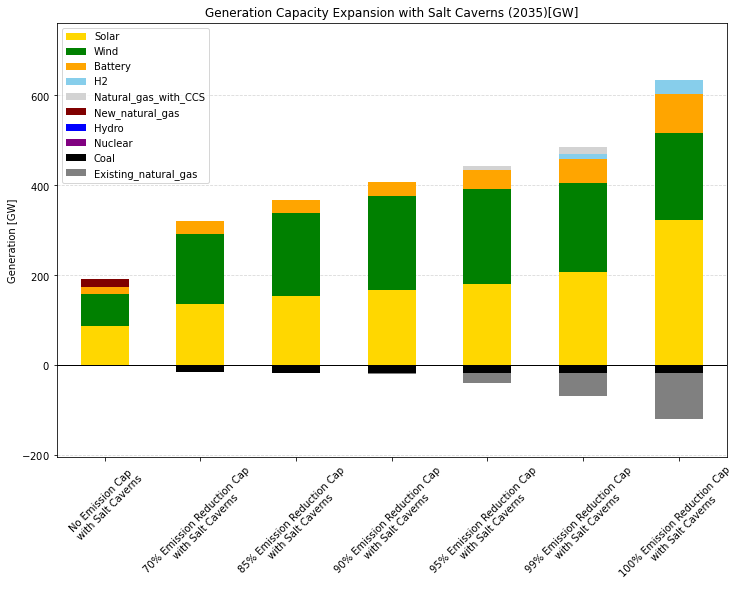

Tech_Type                                 Solar           Wind       Battery  \
PJM_with_MI_with_caverns_0_red     86131.299731   72191.577572  14718.379694   
PJM_with_MI_with_caverns_70_red   136073.936877  154296.626663  29701.358249   
PJM_with_MI_with_caverns_85_red   153602.517540  184541.001141  29520.160475   
PJM_with_MI_with_caverns_90_red   167321.616414  208974.705612  30041.670147   
PJM_with_MI_with_caverns_95_red   179374.360753  212204.298911  41372.806853   
PJM_with_MI_with_caverns_99_red   205746.656595  197732.355381  54200.458070   
PJM_with_MI_with_caverns_100_red  323014.933543  193084.168784  85840.090633   

Tech_Type                                   H2  Natural_gas_with_CCS  \
PJM_with_MI_with_caverns_0_red        6.049930              0.053116   
PJM_with_MI_with_caverns_70_red       0.859965              0.340559   
PJM_with_MI_with_caverns_85_red       0.213538              0.146189   
PJM_with_MI_with_caverns_90_red       0.185363              0.154310   
PJM_with_MI_with_caverns_95_red    1340.405707           6908.934844   
PJM_with_MI_with_caverns_99_red   11443.008068          15032.378787   
PJM_with_MI_with_caverns_100_red  32591.171859              0.000000   

Tech_Type                         New_natural_gas  Hydro      Nuclear  \
PJM_with_MI_with_caverns_0_red       18038.092272    0.0 -3337.507903   
PJM_with_MI_with_caverns_70_red          3.028990    0.0     0.110905   
PJM_with_MI_with_caverns_85_red          0.256140    0.0     0.031246   
PJM_with_MI_with_caverns_90_red          0.089051    0.0     0.016851   
PJM_with_MI_with_caverns_95_red          1.160133    0.0     0.335480   
PJM_with_MI_with_caverns_99_red          0.200044    0.0     0.030272   
PJM_with_MI_with_caverns_100_red         0.000000    0.0     2.438944   

Tech_Type                                 Coal  Existing_natural_gas  
PJM_with_MI_with_caverns_0_red       -0.015067             -0.044718  
PJM_with_MI_with_caverns_70_red  -16949.909397             -0.013543  
PJM_with_MI_with_caverns_85_red  -18294.862719             -0.017395  
PJM_with_MI_with_caverns_90_red  -18295.025915          -2973.926021  
PJM_with_MI_with_caverns_95_red  -18293.989022         -22652.500299  
PJM_with_MI_with_caverns_99_red  -18294.798599         -51101.468307  
PJM_with_MI_with_caverns_100_red -18295.105000        -102975.488258

In [33]:
# With caverns generation retirement
title = 'Generation Capacity Expansion with Salt Caverns (2035)[GW]'
y_label = 'Generation [GW]'
generation_capacity_retirement_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)

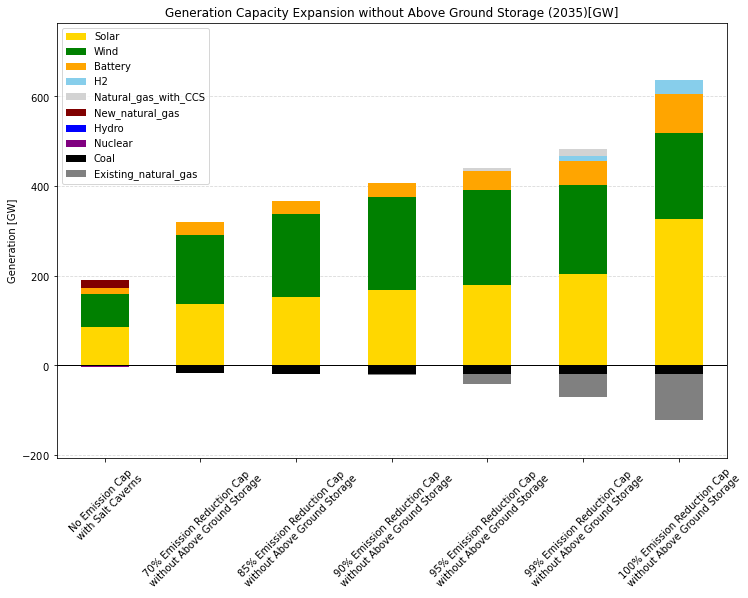

Tech_Type                                            Solar           Wind  \
PJM_with_MI_no_above_ground_storage_0_red     86130.161140   72191.543781   
PJM_with_MI_no_above_ground_storage_70_red   136074.953517  154296.250045   
PJM_with_MI_no_above_ground_storage_85_red   153068.060807  184096.372617   
PJM_with_MI_no_above_ground_storage_90_red   167286.204648  208254.717733   
PJM_with_MI_no_above_ground_storage_95_red   178779.451083  212304.333008   
PJM_with_MI_no_above_ground_storage_99_red   204419.582536  196942.837664   
PJM_with_MI_no_above_ground_storage_100_red  325605.756857  192043.147076   

Tech_Type                                         Battery            H2  \
PJM_with_MI_no_above_ground_storage_0_red    14718.518289      5.763775   
PJM_with_MI_no_above_ground_storage_70_red   29702.641386      0.723839   
PJM_with_MI_no_above_ground_storage_85_red   29673.283196      0.178269   
PJM_with_MI_no_above_ground_storage_90_red   30821.558114      0.277993   
PJM_with_MI_no_above_ground_storage_95_red   41630.358486   1122.855193   
PJM_with_MI_no_above_ground_storage_99_red   53993.525016  11086.456733   
PJM_with_MI_no_above_ground_storage_100_red  86974.307282  32051.418487   

Tech_Type                                    Natural_gas_with_CCS  \
PJM_with_MI_no_above_ground_storage_0_red                0.103609   
PJM_with_MI_no_above_ground_storage_70_red               0.325206   
PJM_with_MI_no_above_ground_storage_85_red               0.193798   
PJM_with_MI_no_above_ground_storage_90_red               0.323633   
PJM_with_MI_no_above_ground_storage_95_red            7064.921064   
PJM_with_MI_no_above_ground_storage_99_red           15677.453124   
PJM_with_MI_no_above_ground_storage_100_red              0.000000   

Tech_Type                                    New_natural_gas  Hydro  \
PJM_with_MI_no_above_ground_storage_0_red       18037.386729    0.0   
PJM_with_MI_no_above_ground_storage_70_red          3.219485    0.0   
PJM_with_MI_no_above_ground_storage_85_red          0.288534    0.0   
PJM_with_MI_no_above_ground_storage_90_red          0.169131    0.0   
PJM_with_MI_no_above_ground_storage_95_red          0.184563    0.0   
PJM_with_MI_no_above_ground_storage_99_red          0.383202    0.0   
PJM_with_MI_no_above_ground_storage_100_red         0.000000    0.0   

Tech_Type                                        Nuclear          Coal  \
PJM_with_MI_no_above_ground_storage_0_red   -3336.657672     -0.039356   
PJM_with_MI_no_above_ground_storage_70_red      0.085177 -16950.628967   
PJM_with_MI_no_above_ground_storage_85_red      0.034410 -18294.882376   
PJM_with_MI_no_above_ground_storage_90_red      0.033610 -18294.994127   
PJM_with_MI_no_above_ground_storage_95_red      0.043797 -18294.929666   
PJM_with_MI_no_above_ground_storage_99_red      0.119936 -18294.596276   
PJM_with_MI_no_above_ground_storage_100_red   238.975007 -18295.105000   

Tech_Type                                    Existing_natural_gas  
PJM_with_MI_no_above_ground_storage_0_red               -0.128585  
PJM_with_MI_no_above_ground_storage_70_red              -0.009728  
PJM_with_MI_no_above_ground_storage_85_red              -0.027019  
PJM_with_MI_no_above_ground_storage_90_red           -3470.388123  
PJM_with_MI_no_above_ground_storage_95_red          -22670.553942  
PJM_with_MI_no_above_ground_storage_99_red          -51224.792737  
PJM_with_MI_no_above_ground_storage_100_red        -102975.502431

In [34]:
# With caverns generation retirement
title = 'Generation Capacity Expansion without Above Ground Storage (2035)[GW]'
y_label = 'Generation [GW]'
generation_capacity_retirement_barchart(scenarios=scenarios_no_above_ground_storage, title=title, y_label=y_label)

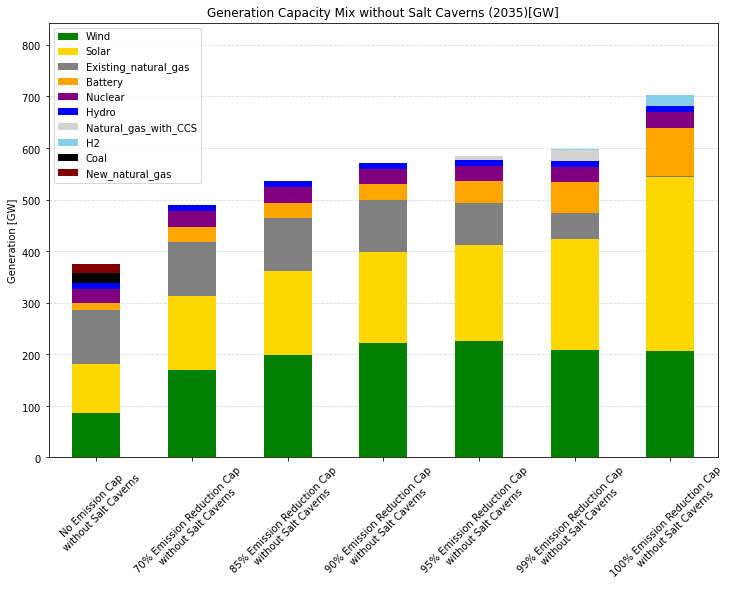

Tech_Type                                Wind          Solar  \
PJM_with_MI_no_caverns_0_red     86748.948257   94682.127299   
PJM_with_MI_no_caverns_70_red   168989.954560  144396.571398   
PJM_with_MI_no_caverns_85_red   199056.910770  161375.129363   
PJM_with_MI_no_caverns_90_red   222332.384165  176612.670472   
PJM_with_MI_no_caverns_95_red   225549.820292  186886.640324   
PJM_with_MI_no_caverns_99_red   208022.337802  214960.749414   
PJM_with_MI_no_caverns_100_red  206890.478351  337364.612703   

Tech_Type                       Existing_natural_gas       Battery  \
PJM_with_MI_no_caverns_0_red           103798.272418  14706.823588   
PJM_with_MI_no_caverns_70_red          103798.577133  29703.493825   
PJM_with_MI_no_caverns_85_red          103798.535861  29522.204451   
PJM_with_MI_no_caverns_90_red          100250.151206  30422.304576   
PJM_with_MI_no_caverns_95_red           80837.014994  42151.597511   
PJM_with_MI_no_caverns_99_red           51693.222305  58820.192150   
PJM_with_MI_no_caverns_100_red            823.099959  93646.185536   

Tech_Type                            Nuclear      Hydro  Natural_gas_with_CCS  \
PJM_with_MI_no_caverns_0_red    27140.734917  11190.736              0.481686   
PJM_with_MI_no_caverns_70_red   30473.785555  11190.736              0.237258   
PJM_with_MI_no_caverns_85_red   30473.787236  11190.736              0.481546   
PJM_with_MI_no_caverns_90_red   30473.806702  11190.736              1.309567   
PJM_with_MI_no_caverns_95_red   30474.157350  11190.736           8057.630893   
PJM_with_MI_no_caverns_99_red   30473.829698  11190.736          20186.024879   
PJM_with_MI_no_caverns_100_red  30479.276666  11190.736              0.000000   

Tech_Type                                 H2          Coal  New_natural_gas  
PJM_with_MI_no_caverns_0_red       10.009012  18295.009739     18007.952675  
PJM_with_MI_no_caverns_70_red       0.569024   1344.222389         2.801004  
PJM_with_MI_no_caverns_85_red       0.572194      0.617378         0.706349  
PJM_with_MI_no_caverns_90_red       1.102483      0.459365         0.588292  
PJM_with_MI_no_caverns_95_red      39.266734      1.991908         2.087079  
PJM_with_MI_no_caverns_99_red    3499.402755      0.585779         0.447239  
PJM_with_MI_no_caverns_100_red  22234.588943      0.000000         0.000000

In [35]:
# With caverns generation retirement
title = 'Generation Capacity Mix without Salt Caverns (2035)[GW]'
y_label = 'Generation [GW]'
generation_capacity_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)

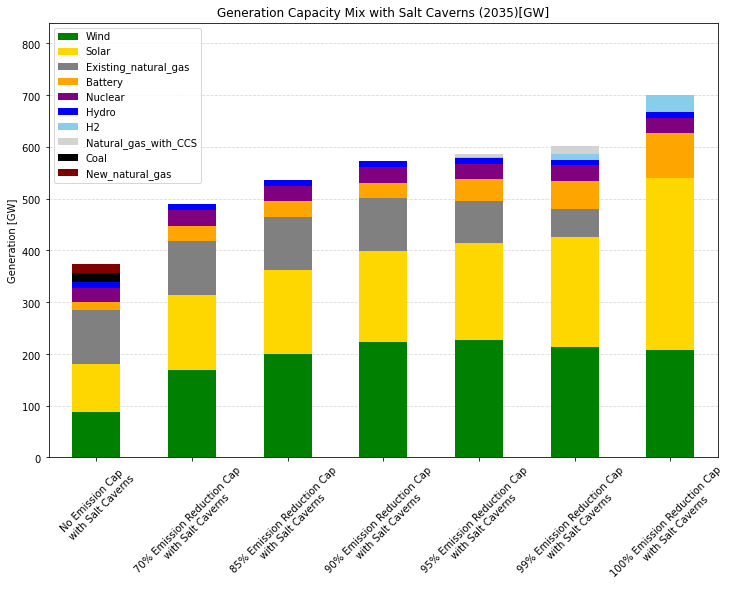

Tech_Type                                  Wind          Solar  \
PJM_with_MI_with_caverns_0_red     86884.597572   94451.580731   
PJM_with_MI_with_caverns_70_red   168989.646663  144394.217877   
PJM_with_MI_with_caverns_85_red   199234.021141  161922.798540   
PJM_with_MI_with_caverns_90_red   223667.725612  175641.897414   
PJM_with_MI_with_caverns_95_red   226897.318911  187694.641753   
PJM_with_MI_with_caverns_99_red   212425.375381  214066.937595   
PJM_with_MI_with_caverns_100_red  207777.188784  331335.214543   

Tech_Type                         Existing_natural_gas       Battery  \
PJM_with_MI_with_caverns_0_red           103798.543282  14718.379694   
PJM_with_MI_with_caverns_70_red          103798.574457  29701.358249   
PJM_with_MI_with_caverns_85_red          103798.570605  29520.160475   
PJM_with_MI_with_caverns_90_red          100824.661979  30041.670147   
PJM_with_MI_with_caverns_95_red           81146.087701  41372.806853   
PJM_with_MI_with_caverns_99_red           52697.119693  54200.458070   
PJM_with_MI_with_caverns_100_red            823.099742  85840.090633   

Tech_Type                              Nuclear      Hydro            H2  \
PJM_with_MI_with_caverns_0_red    27136.192097  11190.736      6.049930   
PJM_with_MI_with_caverns_70_red   30473.810905  11190.736      0.859965   
PJM_with_MI_with_caverns_85_red   30473.731246  11190.736      0.213538   
PJM_with_MI_with_caverns_90_red   30473.716851  11190.736      0.185363   
PJM_with_MI_with_caverns_95_red   30474.035480  11190.736   1340.405707   
PJM_with_MI_with_caverns_99_red   30473.730272  11190.736  11443.008068   
PJM_with_MI_with_caverns_100_red  30476.138944  11190.736  32591.171859   

Tech_Type                         Natural_gas_with_CCS          Coal  \
PJM_with_MI_with_caverns_0_red                0.053116  18295.089933   
PJM_with_MI_with_caverns_70_red               0.340559   1345.195603   
PJM_with_MI_with_caverns_85_red               0.146189      0.242281   
PJM_with_MI_with_caverns_90_red               0.154310      0.079085   
PJM_with_MI_with_caverns_95_red            6908.934844      1.115978   
PJM_with_MI_with_caverns_99_red           15032.378787      0.306401   
PJM_with_MI_with_caverns_100_red              0.000000      0.000000   

Tech_Type                         New_natural_gas  
PJM_with_MI_with_caverns_0_red       18038.092272  
PJM_with_MI_with_caverns_70_red          3.028990  
PJM_with_MI_with_caverns_85_red          0.256140  
PJM_with_MI_with_caverns_90_red          0.089051  
PJM_with_MI_with_caverns_95_red          1.160133  
PJM_with_MI_with_caverns_99_red          0.200044  
PJM_with_MI_with_caverns_100_red         0.000000

In [36]:
# With caverns generation retirement
title = 'Generation Capacity Mix with Salt Caverns (2035)[GW]'
y_label = 'Generation [GW]'
generation_capacity_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)

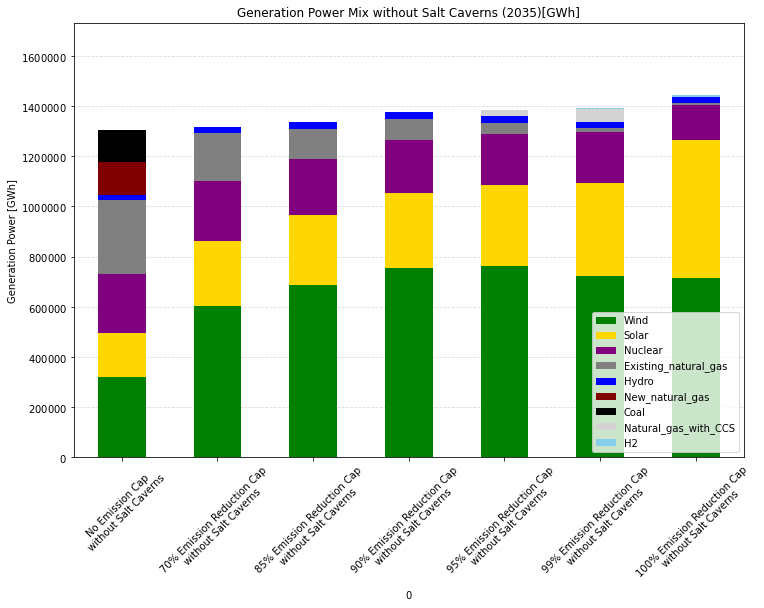

Tech_Type                               Wind         Solar       Nuclear  \
0                                                                          
PJM_with_MI_no_caverns_0_red    3.211175e+08  1.765005e+08  2.351276e+08   
PJM_with_MI_no_caverns_70_red   6.040753e+08  2.589149e+08  2.388385e+08   
PJM_with_MI_no_caverns_85_red   6.858143e+08  2.815163e+08  2.221480e+08   
PJM_with_MI_no_caverns_90_red   7.528899e+08  3.026658e+08  2.110736e+08   
PJM_with_MI_no_caverns_95_red   7.638304e+08  3.200890e+08  2.042352e+08   
PJM_with_MI_no_caverns_99_red   7.247256e+08  3.683296e+08  2.044092e+08   
PJM_with_MI_no_caverns_100_red  7.135534e+08  5.511628e+08  1.407829e+08   

Tech_Type                       Existing_natural_gas         Hydro  \
0                                                                    
PJM_with_MI_no_caverns_0_red            2.931513e+08  1.916565e+07   
PJM_with_MI_no_caverns_70_red           1.912079e+08  2.323594e+07   
PJM_with_MI_no_caverns_85_red           1.198791e+08  2.643903e+07   
PJM_with_MI_no_caverns_90_red           8.231830e+07  2.711987e+07   
PJM_with_MI_no_caverns_95_red           4.449576e+07  2.692493e+07   
PJM_with_MI_no_caverns_99_red           1.343818e+07  2.582833e+07   
PJM_with_MI_no_caverns_100_red          5.393304e+06  2.334721e+07   

Tech_Type                       New_natural_gas          Coal  \
0                                                               
PJM_with_MI_no_caverns_0_red       1.334250e+08  1.261715e+08   
PJM_with_MI_no_caverns_70_red      1.285716e+04  5.115907e+03   
PJM_with_MI_no_caverns_85_red      1.967360e+03  2.150355e+02   
PJM_with_MI_no_caverns_90_red      1.476650e+03  1.685262e+02   
PJM_with_MI_no_caverns_95_red      4.269931e+03  5.390591e+02   
PJM_with_MI_no_caverns_99_red      3.150088e+02  5.069138e+01   
PJM_with_MI_no_caverns_100_red     0.000000e+00  0.000000e+00   

Tech_Type                       Natural_gas_with_CCS            H2  
0                                                                   
PJM_with_MI_no_caverns_0_red            2.273920e+03  4.231222e+03  
PJM_with_MI_no_caverns_70_red           1.376793e+03  2.783117e+02  
PJM_with_MI_no_caverns_85_red           2.601279e+03  6.704703e+02  
PJM_with_MI_no_caverns_90_red           5.525001e+03  1.594314e+03  
PJM_with_MI_no_caverns_95_red           2.567673e+07  4.659498e+04  
PJM_with_MI_no_caverns_99_red           5.088279e+07  3.747708e+06  
PJM_with_MI_no_caverns_100_red          0.000000e+00  9.842420e+06

In [37]:
# With caverns generation retirement
title = 'Generation Power Mix without Salt Caverns (2035)[GWh]'
y_label = 'Generation Power [GWh]'
generation_power_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)


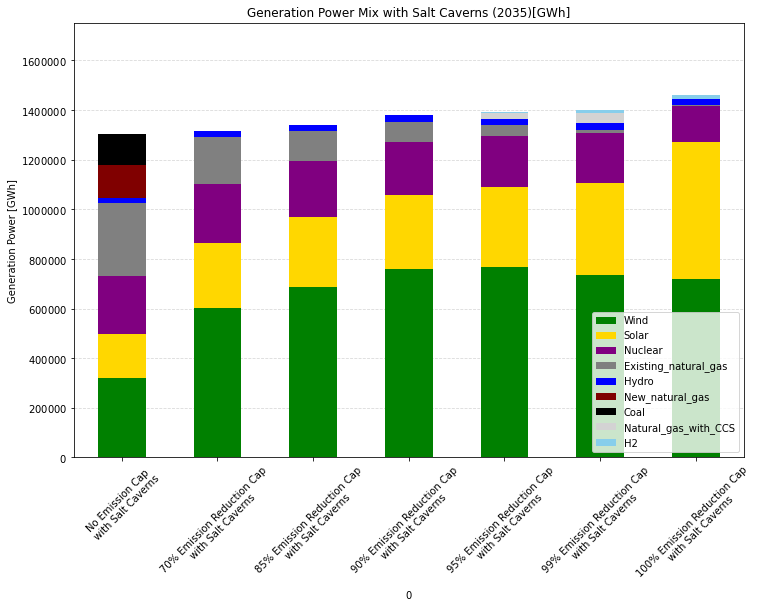

Tech_Type                                 Wind         Solar       Nuclear  \
0                                                                            
PJM_with_MI_with_caverns_0_red    3.219587e+08  1.757487e+08  2.350733e+08   
PJM_with_MI_with_caverns_70_red   6.036145e+08  2.593612e+08  2.388422e+08   
PJM_with_MI_with_caverns_85_red   6.877530e+08  2.828722e+08  2.227806e+08   
PJM_with_MI_with_caverns_90_red   7.574744e+08  3.019845e+08  2.104600e+08   
PJM_with_MI_with_caverns_95_red   7.679541e+08  3.215051e+08  2.038503e+08   
PJM_with_MI_with_caverns_99_red   7.370821e+08  3.672615e+08  2.035471e+08   
PJM_with_MI_with_caverns_100_red  7.200998e+08  5.528791e+08  1.418548e+08   

Tech_Type                         Existing_natural_gas         Hydro  \
0                                                                      
PJM_with_MI_with_caverns_0_red            2.922919e+08  1.918408e+07   
PJM_with_MI_with_caverns_70_red           1.912142e+08  2.323781e+07   
PJM_with_MI_with_caverns_85_red           1.200139e+08  2.641902e+07   
PJM_with_MI_with_caverns_90_red           8.222187e+07  2.703531e+07   
PJM_with_MI_with_caverns_95_red           4.437704e+07  2.692475e+07   
PJM_with_MI_with_caverns_99_red           1.351416e+07  2.685081e+07   
PJM_with_MI_with_caverns_100_red          5.441427e+06  2.382580e+07   

Tech_Type                         New_natural_gas          Coal  \
0                                                                 
PJM_with_MI_with_caverns_0_red       1.335591e+08  1.260708e+08   
PJM_with_MI_with_caverns_70_red      1.348833e+04  5.167800e+03   
PJM_with_MI_with_caverns_85_red      7.697683e+02  9.054312e+01   
PJM_with_MI_with_caverns_90_red      2.235351e+02  2.871142e+01   
PJM_with_MI_with_caverns_95_red      2.239684e+03  2.647943e+02   
PJM_with_MI_with_caverns_99_red      1.583285e+02  2.528531e+01   
PJM_with_MI_with_caverns_100_red     0.000000e+00  0.000000e+00   

Tech_Type                         Natural_gas_with_CCS            H2  
0                                                                     
PJM_with_MI_with_caverns_0_red            2.616634e+02  2.009912e+03  
PJM_with_MI_with_caverns_70_red           1.973475e+03  4.485438e+02  
PJM_with_MI_with_caverns_85_red           7.828040e+02  2.247702e+02  
PJM_with_MI_with_caverns_90_red           6.802289e+02  2.783031e+02  
PJM_with_MI_with_caverns_95_red           2.335254e+07  2.151232e+06  
PJM_with_MI_with_caverns_99_red           4.005402e+07  1.286144e+07  
PJM_with_MI_with_caverns_100_red          0.000000e+00  1.637667e+07

In [38]:
# With caverns generation retirement
title = 'Generation Power Mix with Salt Caverns (2035)[GWh]'
y_label = 'Generation Power [GWh]'
generation_power_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)


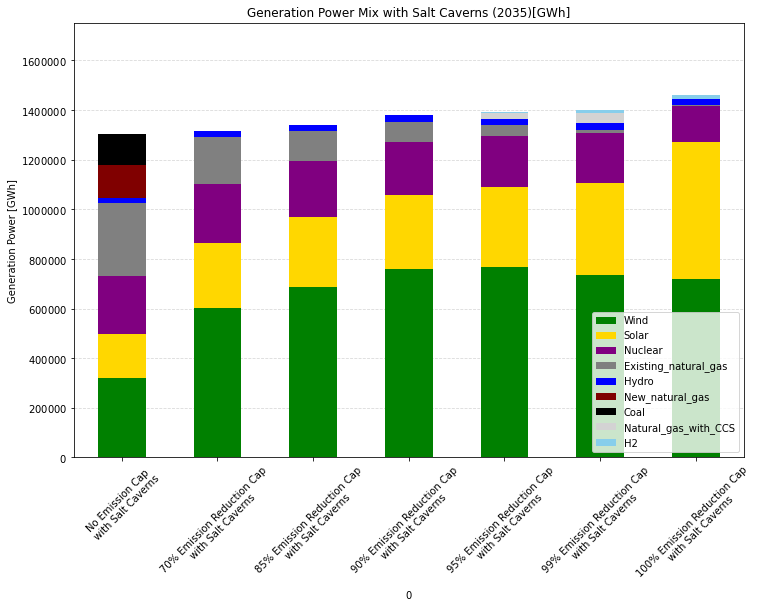

Tech_Type                                 Wind         Solar       Nuclear  \
0                                                                            
PJM_with_MI_with_caverns_0_red    3.219587e+08  1.757487e+08  2.350733e+08   
PJM_with_MI_with_caverns_70_red   6.036145e+08  2.593612e+08  2.388422e+08   
PJM_with_MI_with_caverns_85_red   6.877530e+08  2.828722e+08  2.227806e+08   
PJM_with_MI_with_caverns_90_red   7.574744e+08  3.019845e+08  2.104600e+08   
PJM_with_MI_with_caverns_95_red   7.679541e+08  3.215051e+08  2.038503e+08   
PJM_with_MI_with_caverns_99_red   7.370821e+08  3.672615e+08  2.035471e+08   
PJM_with_MI_with_caverns_100_red  7.200998e+08  5.528791e+08  1.418548e+08   

Tech_Type                         Existing_natural_gas         Hydro  \
0                                                                      
PJM_with_MI_with_caverns_0_red            2.922919e+08  1.918408e+07   
PJM_with_MI_with_caverns_70_red           1.912142e+08  2.323781e+07   
PJM_with_MI_with_caverns_85_red           1.200139e+08  2.641902e+07   
PJM_with_MI_with_caverns_90_red           8.222187e+07  2.703531e+07   
PJM_with_MI_with_caverns_95_red           4.437704e+07  2.692475e+07   
PJM_with_MI_with_caverns_99_red           1.351416e+07  2.685081e+07   
PJM_with_MI_with_caverns_100_red          5.441427e+06  2.382580e+07   

Tech_Type                         New_natural_gas          Coal  \
0                                                                 
PJM_with_MI_with_caverns_0_red       1.335591e+08  1.260708e+08   
PJM_with_MI_with_caverns_70_red      1.348833e+04  5.167800e+03   
PJM_with_MI_with_caverns_85_red      7.697683e+02  9.054312e+01   
PJM_with_MI_with_caverns_90_red      2.235351e+02  2.871142e+01   
PJM_with_MI_with_caverns_95_red      2.239684e+03  2.647943e+02   
PJM_with_MI_with_caverns_99_red      1.583285e+02  2.528531e+01   
PJM_with_MI_with_caverns_100_red     0.000000e+00  0.000000e+00   

Tech_Type                         Natural_gas_with_CCS            H2  
0                                                                     
PJM_with_MI_with_caverns_0_red            2.616634e+02  2.009912e+03  
PJM_with_MI_with_caverns_70_red           1.973475e+03  4.485438e+02  
PJM_with_MI_with_caverns_85_red           7.828040e+02  2.247702e+02  
PJM_with_MI_with_caverns_90_red           6.802289e+02  2.783031e+02  
PJM_with_MI_with_caverns_95_red           2.335254e+07  2.151232e+06  
PJM_with_MI_with_caverns_99_red           4.005402e+07  1.286144e+07  
PJM_with_MI_with_caverns_100_red          0.000000e+00  1.637667e+07

In [39]:
# With caverns generation retirement
title = 'Generation Power Mix with Salt Caverns (2035)[GWh]'
y_label = 'Generation Power [GWh]'
generation_power_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)


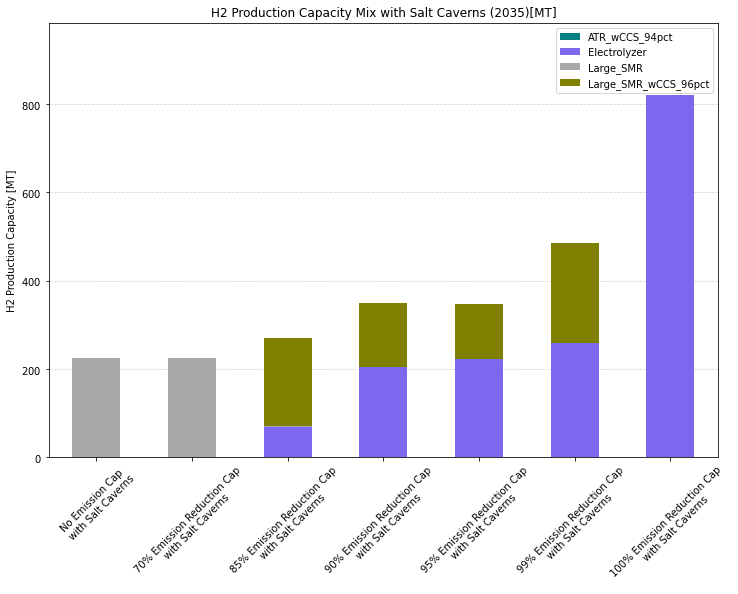

Tech_Type                                        ATR_wCCS_94pct  Electrolyzer  \
No Emission Cap\n with Salt Caverns                    0.001652      0.001333   
70% Emission Reduction Cap\n with Salt Caverns         0.022267      0.154074   
85% Emission Reduction Cap\n with Salt Caverns         0.029304     68.610149   
90% Emission Reduction Cap\n with Salt Caverns         0.009940    204.884175   
95% Emission Reduction Cap\n with Salt Caverns         0.148551    223.310148   
99% Emission Reduction Cap\n with Salt Caverns         0.027340    259.439344   
100% Emission Reduction Cap\n with Salt Caverns        0.000000    819.956130   

Tech_Type                                         Large_SMR  \
No Emission Cap\n with Salt Caverns              224.313464   
70% Emission Reduction Cap\n with Salt Caverns   224.183241   
85% Emission Reduction Cap\n with Salt Caverns     2.931895   
90% Emission Reduction Cap\n with Salt Caverns     0.007209   
95% Emission Reduction Cap\n with Salt Caverns     0.033482   
99% Emission Reduction Cap\n with Salt Caverns     0.006543   
100% Emission Reduction Cap\n with Salt Caverns    0.000000   

Tech_Type                                        Large_SMR_wCCS_96pct  
No Emission Cap\n with Salt Caverns                          0.004011  
70% Emission Reduction Cap\n with Salt Caverns               0.044469  
85% Emission Reduction Cap\n with Salt Caverns             199.351040  
90% Emission Reduction Cap\n with Salt Caverns             143.513529  
95% Emission Reduction Cap\n with Salt Caverns             124.430939  
99% Emission Reduction Cap\n with Salt Caverns             224.667514  
100% Emission Reduction Cap\n with Salt Caverns              0.000000

In [40]:
# With caverns generation retirement
title = 'H2 Production Capacity Mix with Salt Caverns (2035)[MT]'
y_label = 'H2 Production Capacity [MT]'
h2_capacity_generation(scenarios=scenarios_with_caverns, title=title, y_label=y_label)


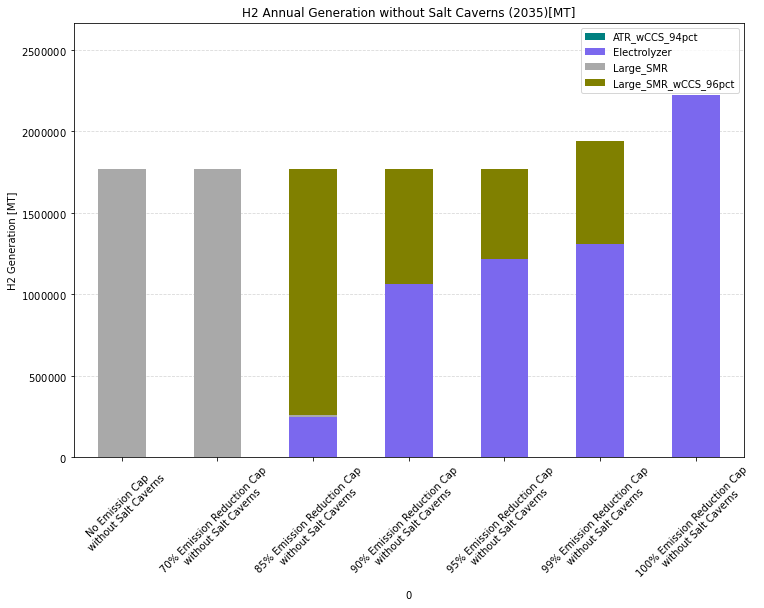

Tech_Type                                           ATR_wCCS_94pct  \
0                                                                    
No Emission Cap\n without Salt Caverns                  114.943704   
70% Emission Reduction Cap\n without Salt Caverns       120.727319   
85% Emission Reduction Cap\n without Salt Caverns       632.282909   
90% Emission Reduction Cap\n without Salt Caverns       680.117502   
95% Emission Reduction Cap\n without Salt Caverns      1774.233290   
99% Emission Reduction Cap\n without Salt Caverns       382.766608   
100% Emission Reduction Cap\n without Salt Caverns        0.000000   

Tech_Type                                           Electrolyzer  \
0                                                                  
No Emission Cap\n without Salt Caverns              5.264580e+01   
70% Emission Reduction Cap\n without Salt Caverns   4.225574e+02   
85% Emission Reduction Cap\n without Salt Caverns   2.445495e+05   
90% Emission Reduction Cap\n without Salt Caverns   1.062909e+06   
95% Emission Reduction Cap\n without Salt Caverns   1.212530e+06   
99% Emission Reduction Cap\n without Salt Caverns   1.306565e+06   
100% Emission Reduction Cap\n without Salt Caverns  2.223267e+06   

Tech_Type                                              Large_SMR  \
0                                                                  
No Emission Cap\n without Salt Caverns              1.768098e+06   
70% Emission Reduction Cap\n without Salt Caverns   1.767464e+06   
85% Emission Reduction Cap\n without Salt Caverns   1.305595e+04   
90% Emission Reduction Cap\n without Salt Caverns   1.032626e+02   
95% Emission Reduction Cap\n without Salt Caverns   1.270874e+02   
99% Emission Reduction Cap\n without Salt Caverns   3.974067e+00   
100% Emission Reduction Cap\n without Salt Caverns  0.000000e+00   

Tech_Type                                           Large_SMR_wCCS_96pct  
0                                                                         
No Emission Cap\n without Salt Caverns                      1.653120e+02  
70% Emission Reduction Cap\n without Salt Caverns           2.128923e+02  
85% Emission Reduction Cap\n without Salt Caverns           1.510002e+06  
90% Emission Reduction Cap\n without Salt Caverns           7.045943e+05  
95% Emission Reduction Cap\n without Salt Caverns           5.560588e+05  
99% Emission Reduction Cap\n without Salt Caverns           6.344139e+05  
100% Emission Reduction Cap\n without Salt Caverns          0.000000e+00

In [41]:
# With caverns generation retirement
title = 'H2 Annual Generation without Salt Caverns (2035)[MT]'
y_label = 'H2 Generation [MT]'
h2_generation(scenarios=scenarios_no_caverns, title=title, y_label=y_label)

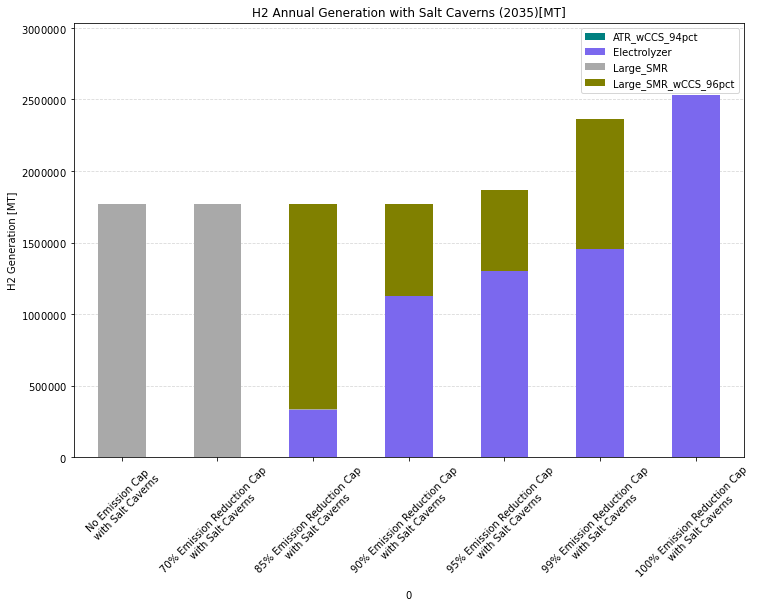

Tech_Type                                        ATR_wCCS_94pct  Electrolyzer  \
0                                                                               
No Emission Cap\n with Salt Caverns                   12.656225  4.214965e+00   
70% Emission Reduction Cap\n with Salt Caverns       171.519552  5.765924e+02   
85% Emission Reduction Cap\n with Salt Caverns       226.464016  3.329736e+05   
90% Emission Reduction Cap\n with Salt Caverns        76.517942  1.126400e+06   
95% Emission Reduction Cap\n with Salt Caverns      1144.628636  1.302220e+06   
99% Emission Reduction Cap\n with Salt Caverns       210.278440  1.456279e+06   
100% Emission Reduction Cap\n with Salt Caverns        0.000000  2.531108e+06   

Tech_Type                                           Large_SMR  \
0                                                               
No Emission Cap\n with Salt Caverns              1.768280e+06   
70% Emission Reduction Cap\n with Salt Caverns   1.767165e+06   
85% Emission Reduction Cap\n with Salt Caverns   7.892359e+03   
90% Emission Reduction Cap\n with Salt Caverns   1.359543e+01   
95% Emission Reduction Cap\n with Salt Caverns   4.890913e+01   
99% Emission Reduction Cap\n with Salt Caverns   1.824684e+00   
100% Emission Reduction Cap\n with Salt Caverns  0.000000e+00   

Tech_Type                                        Large_SMR_wCCS_96pct  
0                                                                      
No Emission Cap\n with Salt Caverns                      2.005282e+01  
70% Emission Reduction Cap\n with Salt Caverns           3.153221e+02  
85% Emission Reduction Cap\n with Salt Caverns           1.427125e+06  
90% Emission Reduction Cap\n with Salt Caverns           6.417298e+05  
95% Emission Reduction Cap\n with Salt Caverns           5.642110e+05  
99% Emission Reduction Cap\n with Salt Caverns           9.077520e+05  
100% Emission Reduction Cap\n with Salt Caverns          0.000000e+00

In [42]:
# With caverns generation retirement
title = 'H2 Annual Generation with Salt Caverns (2035)[MT]'
y_label = 'H2 Generation [MT]'
h2_generation(scenarios=scenarios_with_caverns, title=title, y_label=y_label)

### H2 Storage Plotting

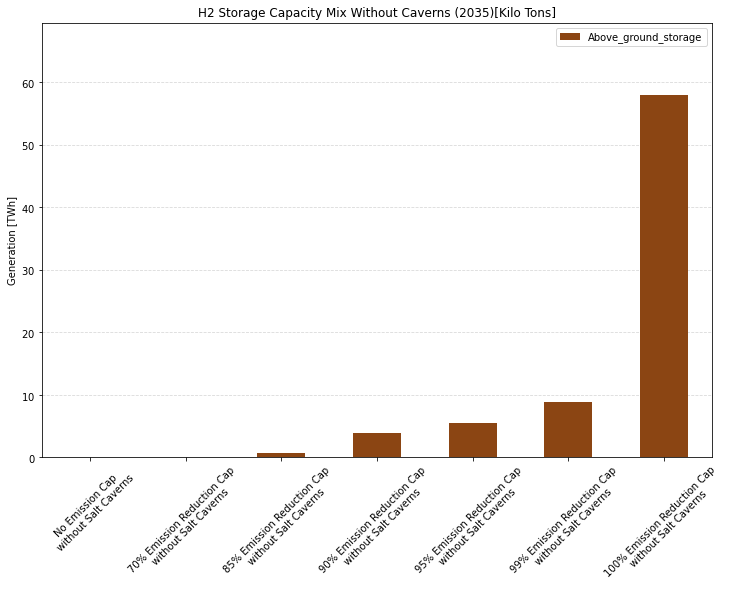

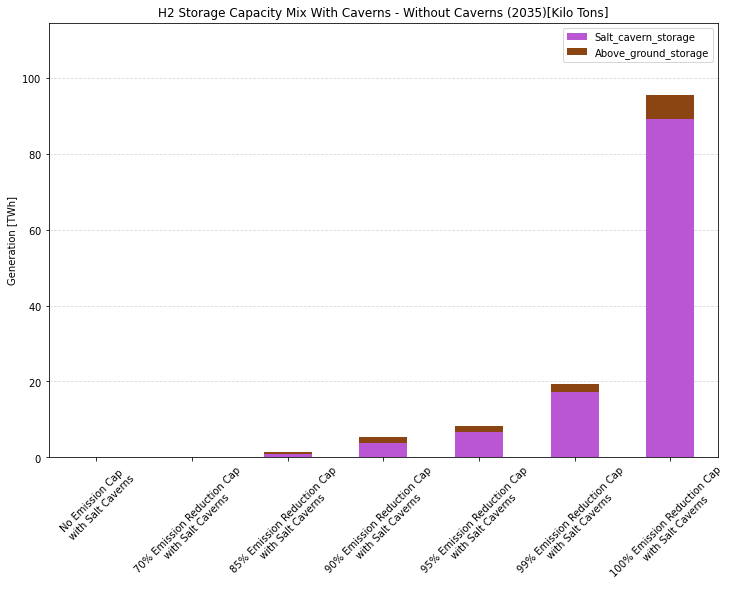

Index(['PJM_with_MI_no_caverns_0_red', 'PJM_with_MI_no_caverns_70_red',
       'PJM_with_MI_no_caverns_85_red', 'PJM_with_MI_no_caverns_90_red',
       'PJM_with_MI_no_caverns_95_red', 'PJM_with_MI_no_caverns_99_red',
       'PJM_with_MI_no_caverns_100_red'],
      dtype='object')
Scenarios present in 1 but missing in 2: Index([], dtype='object')
Scenarios present in 2 but missing in 1: Index([], dtype='object')


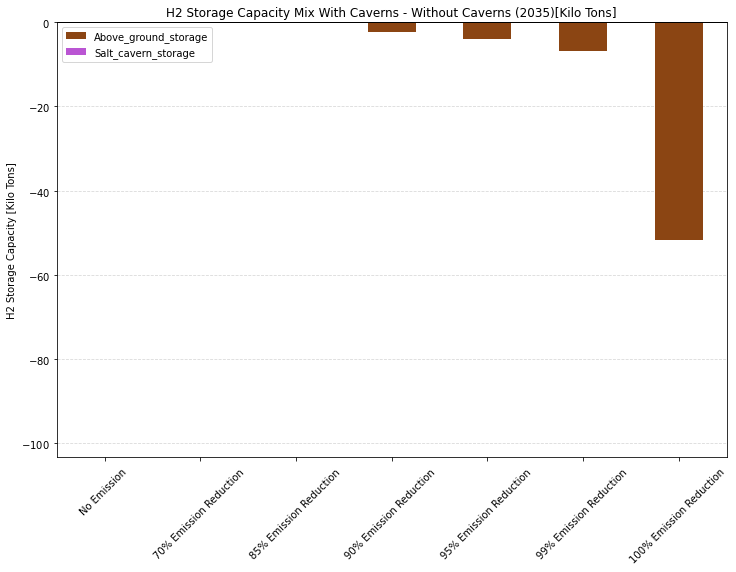

In [43]:
title = 'H2 Storage Capacity Mix With Caverns - Without Caverns (2035)[Kilo Tons]'
y_label = 'H2 Storage Capacity [Kilo Tons]'

df_diff = compare_scenarios(scenarios_no_caverns, scenarios_with_caverns, 
                            h2_storage_capacity_barchart, title=title, y_label=y_label, units=2.1,
                            title_1='H2 Storage Capacity Mix Without Caverns (2035)[Kilo Tons]',y_label_1='Generation [TWh]', units_1=2.1,
                            title_2='H2 Storage Capacity Mix With Caverns - Without Caverns (2035)[Kilo Tons]',y_label_2='Generation [TWh]', units_2=2.1)

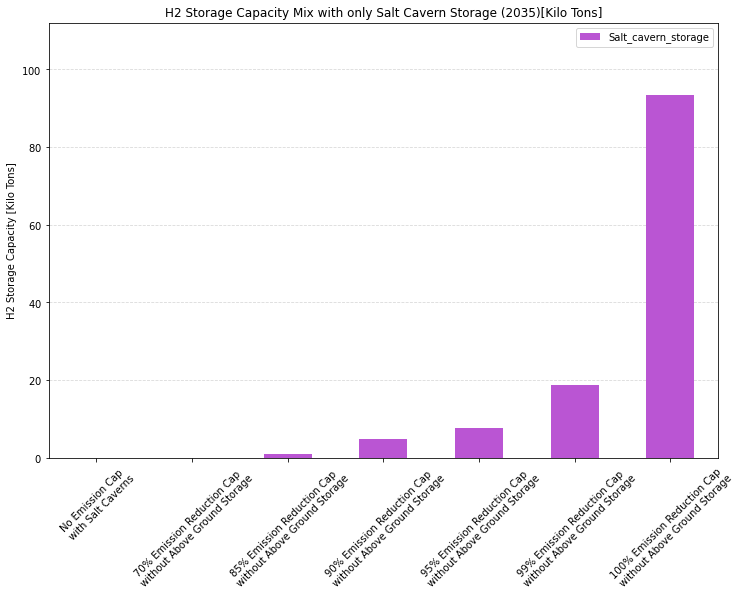

Tech_Type                                    Salt_cavern_storage
PJM_with_MI_no_above_ground_storage_0_red               0.164076
PJM_with_MI_no_above_ground_storage_70_red              0.390764
PJM_with_MI_no_above_ground_storage_85_red            951.197929
PJM_with_MI_no_above_ground_storage_90_red           4837.705632
PJM_with_MI_no_above_ground_storage_95_red           7733.977179
PJM_with_MI_no_above_ground_storage_99_red          18729.219802
PJM_with_MI_no_above_ground_storage_100_red         93317.786800

In [44]:
# Without AGS
title = 'H2 Storage Capacity Mix with only Salt Cavern Storage (2035)[Kilo Tons]'
y_label = 'H2 Storage Capacity [Kilo Tons]'
h2_storage_capacity_barchart(scenarios=scenarios_no_above_ground_storage, title=title, y_label=y_label)


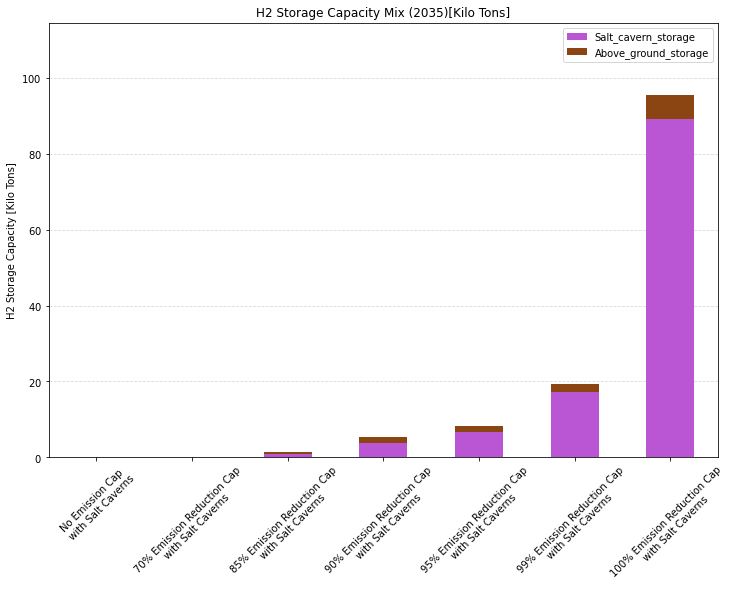

Tech_Type                         Salt_cavern_storage  Above_ground_storage
PJM_with_MI_with_caverns_0_red               0.107175              0.099594
PJM_with_MI_with_caverns_70_red              0.410334              0.309900
PJM_with_MI_with_caverns_85_red            793.502293            561.654380
PJM_with_MI_with_caverns_90_red           3869.562603           1449.316386
PJM_with_MI_with_caverns_95_red           6689.630376           1524.876558
PJM_with_MI_with_caverns_99_red          17132.049865           2188.966038
PJM_with_MI_with_caverns_100_red         89200.020803           6242.095261

In [45]:
# With caverns generation retirement
title = 'H2 Storage Capacity Mix (2035)[Kilo Tons]'
y_label = 'H2 Storage Capacity [Kilo Tons]'
h2_storage_capacity_barchart(scenarios=scenarios_with_caverns, title=title, y_label=y_label)


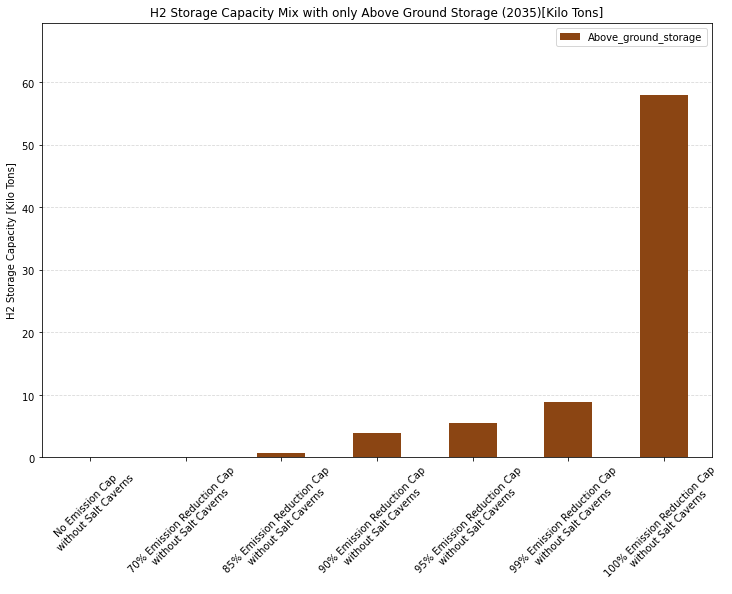

Tech_Type                       Above_ground_storage
PJM_with_MI_no_caverns_0_red                0.823747
PJM_with_MI_no_caverns_70_red               0.207288
PJM_with_MI_no_caverns_85_red             637.457901
PJM_with_MI_no_caverns_90_red            3851.640487
PJM_with_MI_no_caverns_95_red            5562.698506
PJM_with_MI_no_caverns_99_red            8923.435900
PJM_with_MI_no_caverns_100_red          57918.423721

In [46]:
# With caverns generation retirement
title = 'H2 Storage Capacity Mix with only Above Ground Storage (2035)[Kilo Tons]'
y_label = 'H2 Storage Capacity [Kilo Tons]'
h2_storage_capacity_barchart(scenarios=scenarios_no_caverns, title=title, y_label=y_label)


# Spatial Analysis

## Zonal Barcharts

In [47]:



def spatial_scenario_dict_creator(result_file, scenarios=scenarios):
    dataframes_dict = {}
    for scenario in scenarios:
        #print(scenario)

        df = open_results_file(result_file, scenario)
        df = df.T
        #identify_tech_type(df, resources, aggregate=False)
        df = df.reset_index()
        df.columns = df.iloc[0]
        df = df[1:]
        df = df.rename(columns={'Zone': 'Zone_N'})

        df = identify_tech_type(df, resources=H2_resource_categories, aggregate=False)
        df = df.iloc[:-1]
        df = df.reset_index()
        df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))

        # Group the dataframe by 'Zone_N'
        zoned = df.groupby('Zone')

        # Create a double key dictionary of dataframes. Keys are scenario and zone

        for zone, group in zoned:
            dataframes_dict[zone, scenario] = group
    return(dataframes_dict)

dataframes_dict = spatial_scenario_dict_creator(result_file='HSC_h2_generation_discharge.csv', scenarios=scenarios)
dataframes_dict[zones[0], scenarios[0]]

0   index                       Resource Zone_N  AnnualSum         t1  \
0       1          MIS_INKY_Electrolyzer    1.0   4.263863    0.00066   
12     13             MIS_INKY_Large_SMR    1.0  507286.28  57.908016   
24     25  MIS_INKY_Large_SMR_wCCS_96pct    1.0  13.981671   0.001698   
36     37        MIS_INKY_ATR_wCCS_94pct    1.0   9.716841    0.00111   
48     49  MIS_INKY_Above_ground_storage    1.0  57.217785    0.00751   

0          t2         t3         t4         t5         t6  ...      t1841  \
0    0.001007   0.001008   0.001045   0.001046   0.001046  ...   0.000512   
12  57.908303  57.908386  57.908524  57.908566  57.908579  ...  57.909431   
24   0.001709   0.001717   0.001724   0.001727   0.001728  ...   0.001441   
36    0.00111    0.00111    0.00111    0.00111    0.00111  ...   0.001109   
48   0.011036   0.009793   0.011283   0.010728   0.010469  ...   0.004897   

0      t1842      t1843      t1844      t1845      t1846      t1847  \
0   0.000352   0.000335    0.00034   0.000354   0.000398   0.000394   
12  57.90923  57.909139  57.909096  57.909109  57.909147  57.909163   
24  0.001415   0.001402   0.001397   0.001399   0.001403   0.001406   
36  0.001109   0.001109   0.001109   0.001109   0.001109   0.001109   
48  0.004705   0.004871   0.004966   0.005108   0.005438   0.005793   

0       t1848             Tech_Type      Zone  
0    0.000419          Electrolyzer  MIS_INKY  
12  57.909181             Large_SMR  MIS_INKY  
24   0.001407  Large_SMR_wCCS_96pct  MIS_INKY  
36   0.001109        ATR_wCCS_94pct  MIS_INKY  
48   0.006004  Above_ground_storage  MIS_INKY  

[5 rows x 1854 columns]

### H2 Generation Plots

In [48]:
def df_HSC_h2_generation_discharge_dict_creator(scenario):
    dataframes_dict = {}
   
    #print(scenario)

    df = open_results_file('HSC_h2_generation_discharge.csv', scenario)
    df = df.T
    #identify_tech_type(df, resources, aggregate=False)
    df = df.reset_index()
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.rename(columns={'Zone': 'Zone_N'})

    df = identify_tech_type(df, resources=H2_resource_categories, aggregate=False)
    df = df.iloc[:-1]
    df = df.reset_index()
    df['Zone'] = df['Resource'].apply(lambda resource: next((zone for zone in zones if zone in resource), None))

    # Group the dataframe by 'Zone_N'
    zoned = df.groupby('Zone')

    # Create a double key dictionary of dataframes. Keys are scenario and zone

    for zone, group in zoned:
        dataframes_dict[zone, scenario] = group
    return(dataframes_dict)



#df_dict = df_HSC_h2_generation_discharge_dict_creator(scenario=scenarios[3])

In [49]:
def multiple_zone_barchart_plot(dataframes_dict, scenarios=scenarios, zones=zones):

    # Finds max value which allows me to set scale for all the barplots relative to each other

    
    
    max_value = 0

    for keys, df in dataframes_dict.items():
        filtered_df = df[~df['Tech_Type'].str.contains('storage')]
        max_in_df = filtered_df['AnnualSum'].max()

        if max_in_df > max_value:
            max_value = max_in_df
    
    max_value = max_value / 1000
    
    # Find load data for each zone
    h2_load_zoned = zone_h2_load_data()

    
    
    for zone in zones:

        df_main = pd.DataFrame()
           
        # Tons H2 --> Metric Tons H2
        load_data=h2_load_zoned[zone]/1000
        
        
        for scenario in scenarios:
            dff = dataframes_dict[(zone,scenario)]

            dff = dff[['Tech_Type', 'AnnualSum']]
            #dff = dff.set_index('Tech_Type')


            dff = dff.rename(columns={'AnnualSum': scenario})#

            dff = dff[dff['Tech_Type'] != 'Above_ground_storage']
            dff = dff[dff['Tech_Type'] != 'Salt_cavern_storage']

            # Transpose the dataframe    
            dff = dff.set_index('Tech_Type').T
            #dff = dff.columns = dff.columns.droplevel(0)
            #dff = dff.set_index('Tech_Type', inplace=True)
            #

            #dff.reset_index()
            df_main = df_main.append(dff, ignore_index=False)

        # Tons --> Metric Tons    
        df_main = df_main / 1000
        
        
        plot_stacked_barchart(df_main=df_main, title=zone + ': Annualy Generated H2', legend_title="H2 Generator", y_label="Annual Generated H2 [Metric Tons]", units=2,
                              retirement=False, sort_values=False, legend_custom=False, comparing=False,
                               spatial_shared_y_limit=max_value, load_data=load_data)


    #df_main


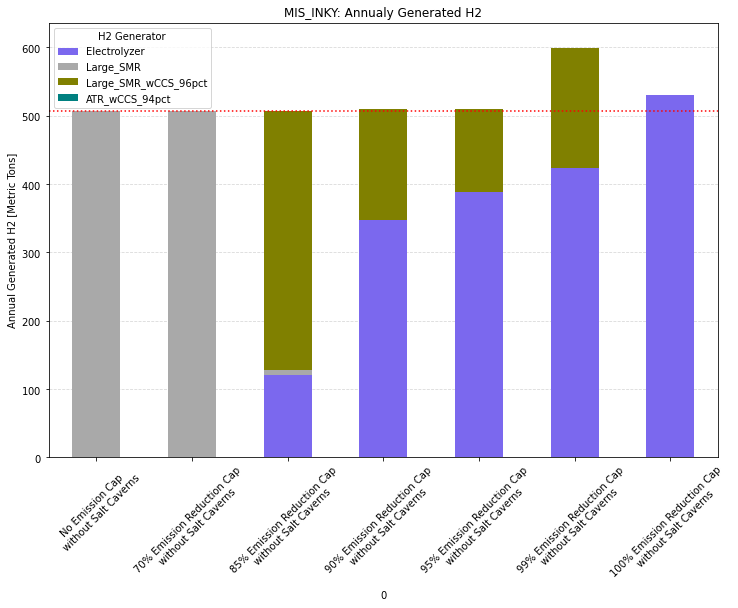

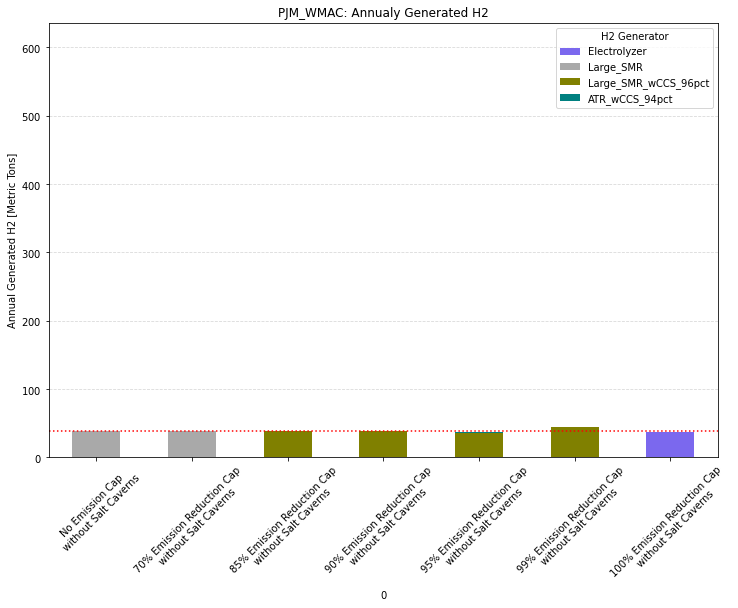

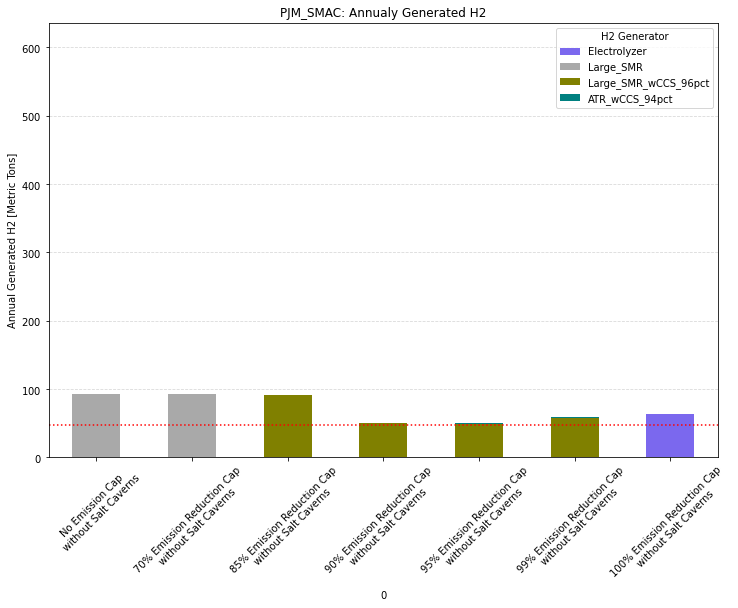

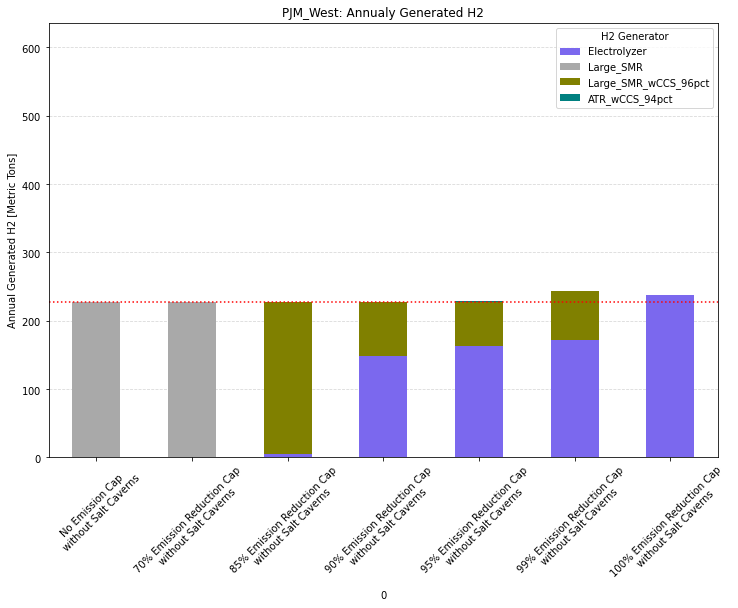

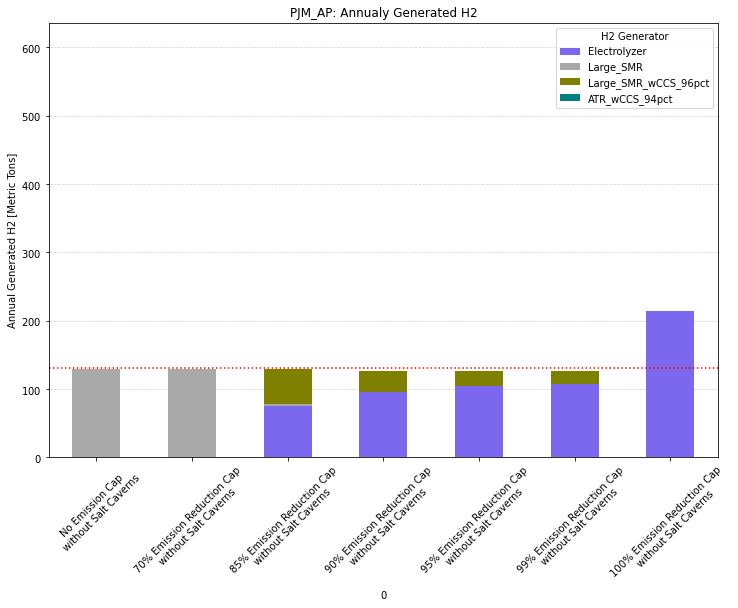

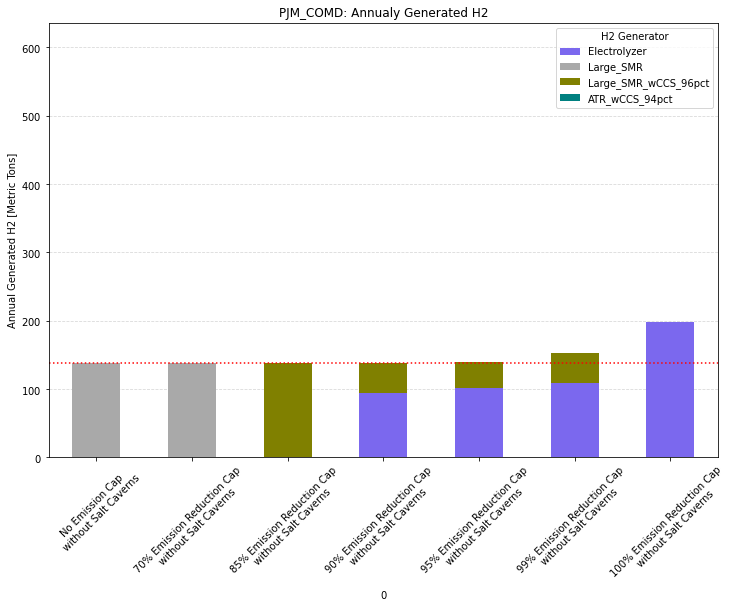

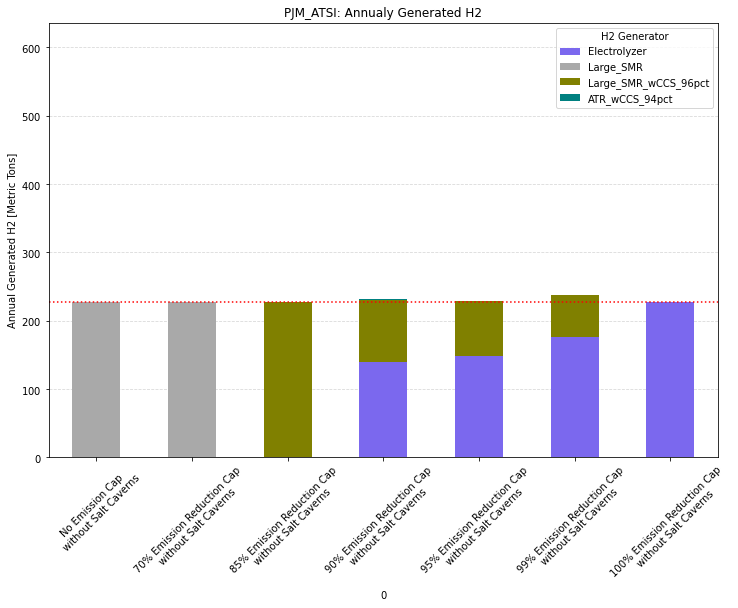

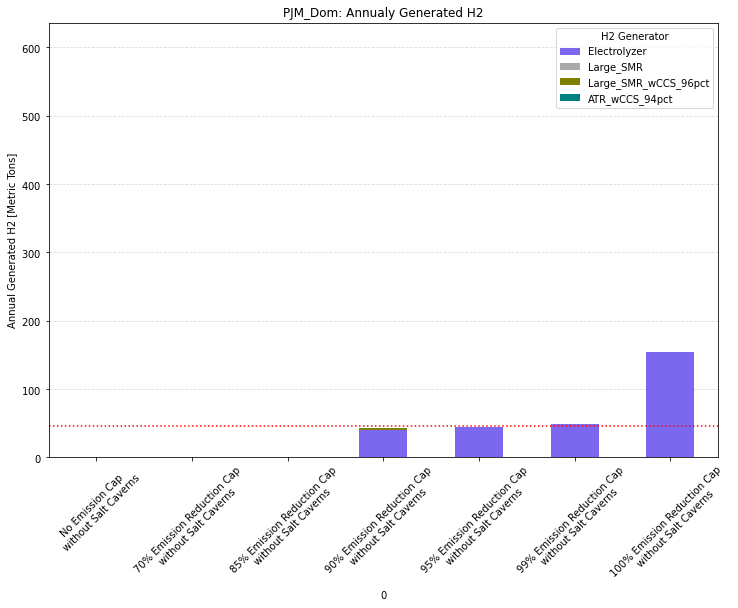

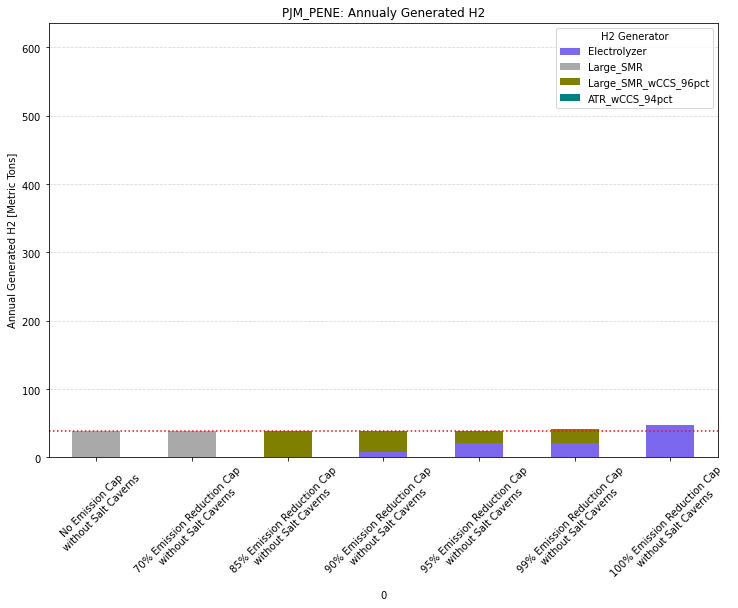

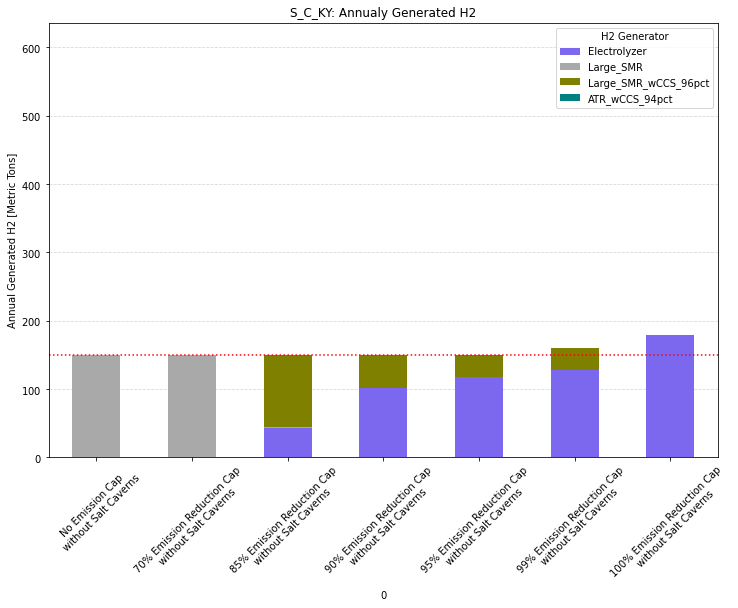

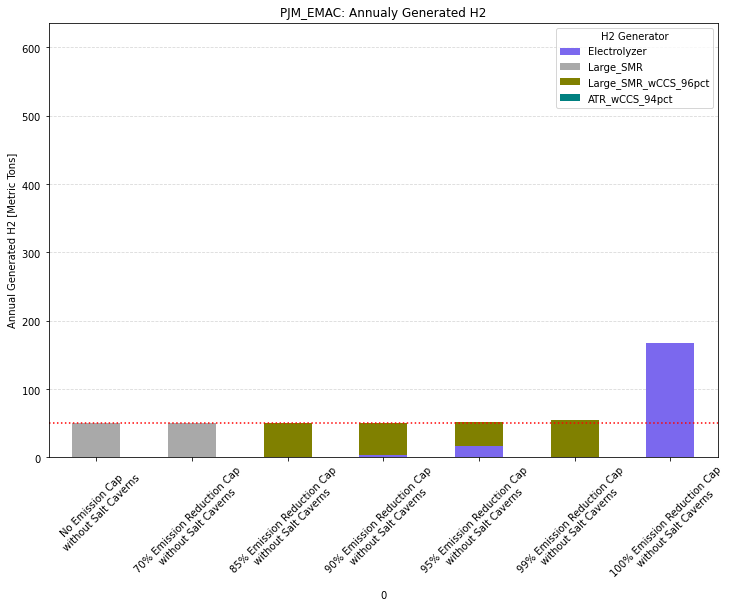

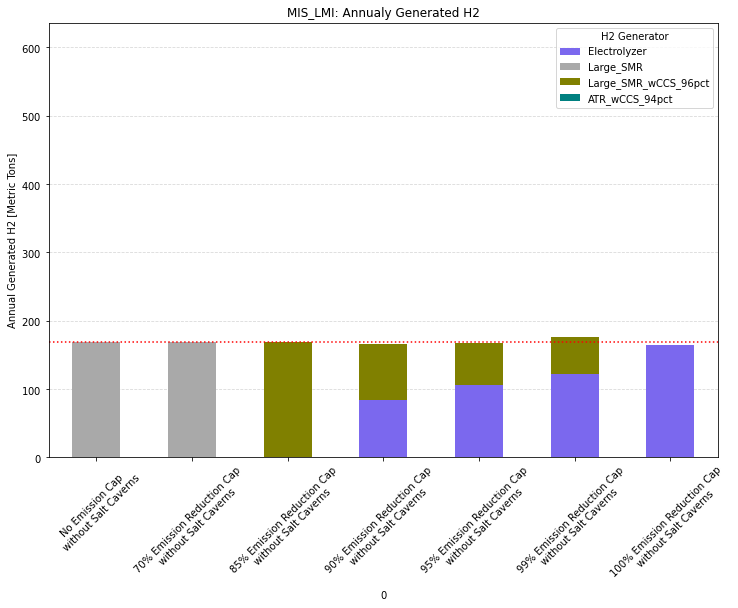

In [50]:
multiple_zone_barchart_plot(dataframes_dict = dataframes_dict, scenarios = scenarios)

### H2 Consumption Plots

In [51]:

def h2_balance_zones_df(scenario):
    file_name='HSC_h2_balance.csv'
    df = open_results_file(file_name=file_name, scenario=scenario)
    df = df.T
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df = df.rename(columns={'Zone': 'Zone_N'})

    df['Zone_N'] = 'z' + df['Zone_N'].astype(int).astype(str)
    df['Zone'] = df['Zone_N'].map(zone_ID_dict)

    df = df[['Zone', 'AnnualSum']]
    df.index = df.index.str.split('.').str[0]

    keywords = ['Generation', 'H2_Pipeline_Import/Export', 'H2G2P', 'Demand']
    df = df[df.index.isin(keywords)]

    # Create a pivot table where each zone's data forms a sub-DataFrame
    df_pivot = df.pivot(columns='Zone', values='AnnualSum')

    # Simplify the DataFrame removing unnecessary multi-indexing
    df_pivot.columns.name = None
    df_pivot.index.name = None
    df = df_pivot.T
    return df

def h2_balance_zones_dict(scenarios):

    dict_h2_balance = {}

    for scenario in scenarios:
        df_h2_balance = h2_balance_zones_df(scenario=scenario)

        for zone in zones:
            dict_h2_balance[zone, scenario] = df_h2_balance.loc[zone]
            
    return(dict_h2_balance)


def max_value_nested_dict(dataframes_dict):
    
    max_val = -float('inf')  # Initialize with negative infinity

    # Assume 'nested_dict' is your nested dictionary with DataFrame as values
    for key, df in dataframes_dict.items():
        current_max = df.values.max()  # Find the max value in current DataFrame
        max_val = max(max_val, current_max)  # Update the max_val if current_max is greater

    return(max_val)


In [52]:
def multiple_zone_barchart_h2_balance(dataframes_dict, scenarios=scenarios, zones=zones, load_data=True):

    h2_load_zoned = zone_h2_load_data()
    
    max_value = max_value_nested_dict(dataframes_dict)
    max_value = max_value / 1000  # Tons --> Kilo Tons
    
    df_main_list=[]
    for zone in zones:
        df_main = pd.DataFrame()
        
        if load_data == True:
            load_data = h2_load_zoned[zone]
        
        for scenario in scenarios:
            
            dff = dataframes_dict[zone,scenario]
            dff = dff.rename(scenario)
            #print(dff)

            dff = dff[['Generation', 'H2_Pipeline_Import/Export', 'H2G2P']]
            #dff = dff * -1
            #dff['Demand'] = dff['Demand'] * -1
            #dff['H2G2P'] = dff['H2G2P'] * -1

            
            
            #dff.reset_index()
            df_main = df_main.append(dff, ignore_index=False)
            #print(df_main)

        # Tons --> Metric Tons    
        df_main = df_main / 1000   
        load_data = load_data / 1000    
        

            
        plot_stacked_barchart(df_main=df_main, title='Annual H2 Balance in Zone: ' + zone, legend_title="", y_label="Annual H2 in Zone "+ zone + " [Kilo Tons]", units=5,
                              retirement=False, sort_values=False, legend_custom=False, comparing=False,
                               spatial_shared_y_limit=max_value, load_data=load_data)
        
        df_main_list.append(df_main_list)
    return(df_main_list)


#### Without Caverns

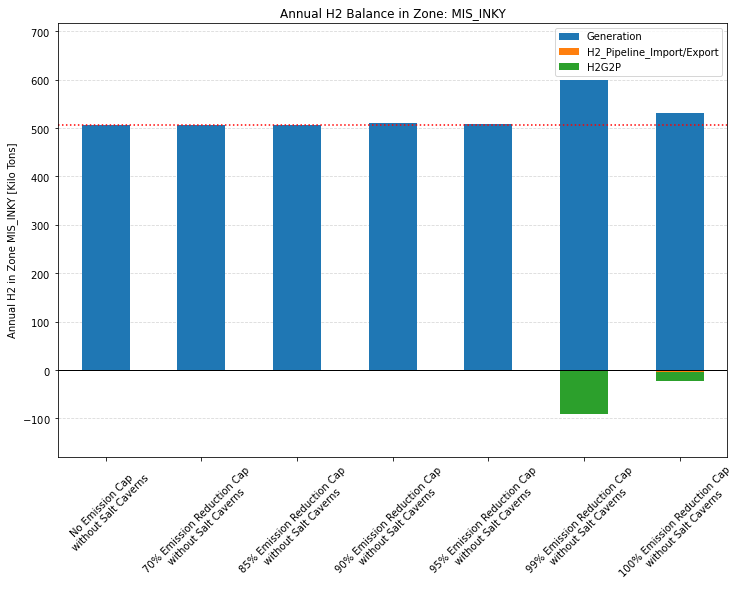

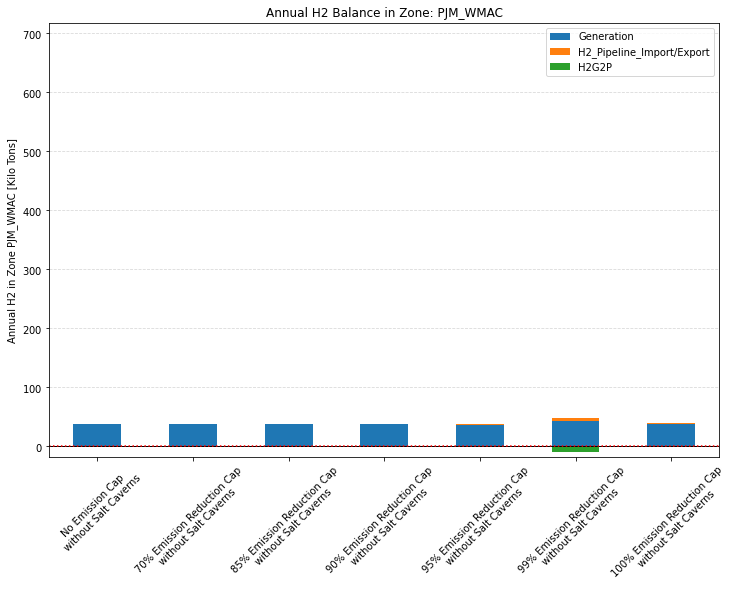

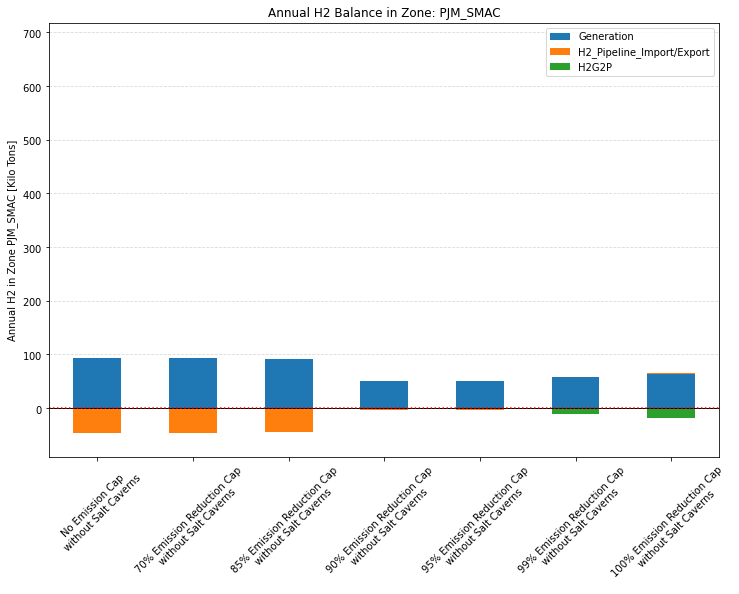

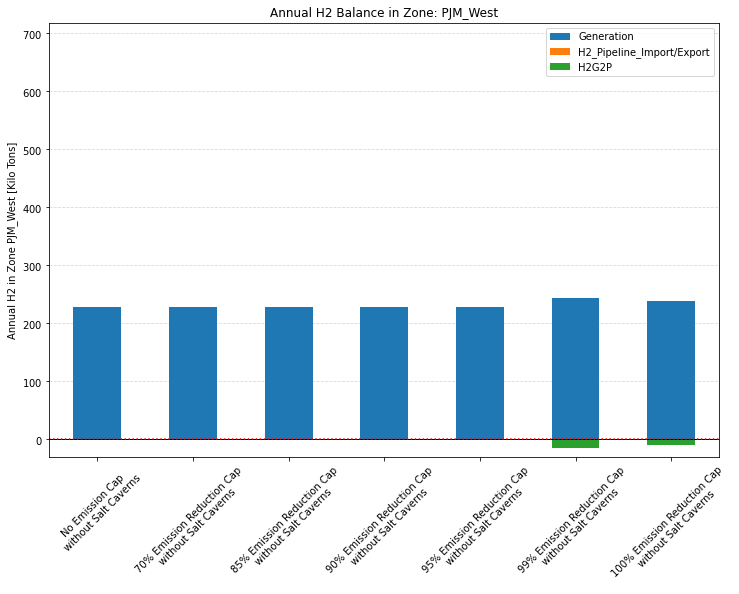

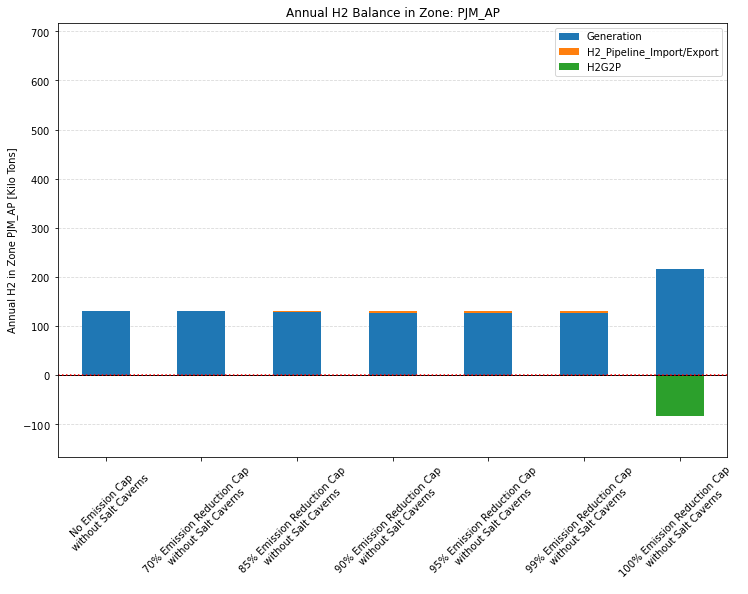

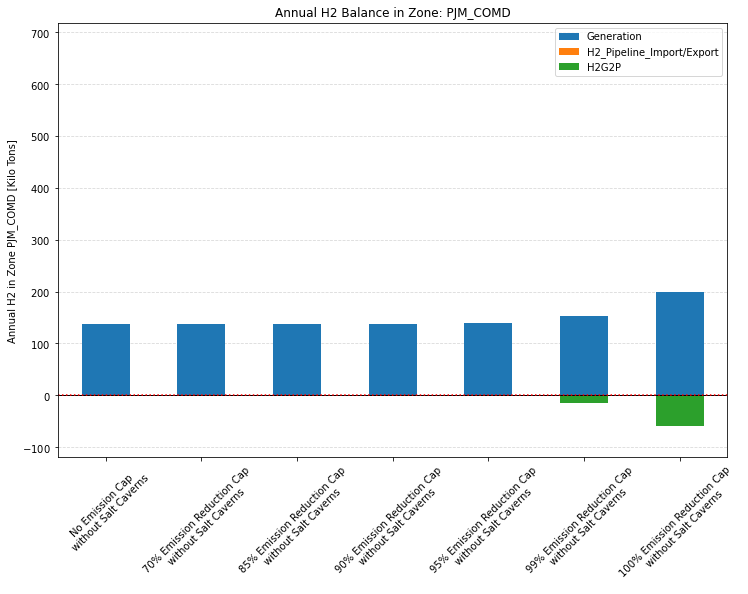

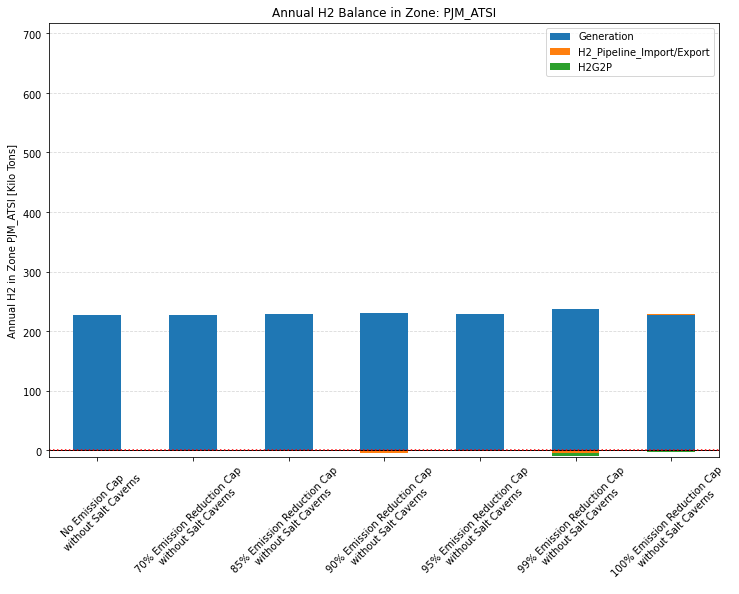

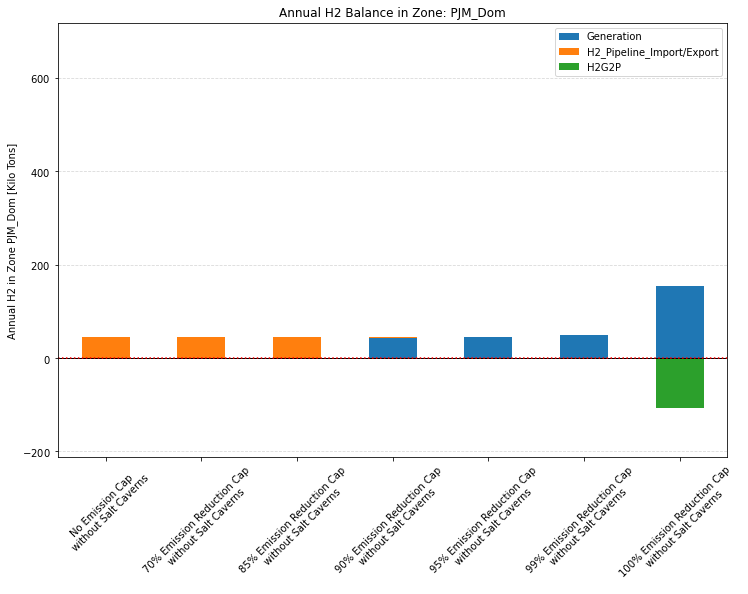

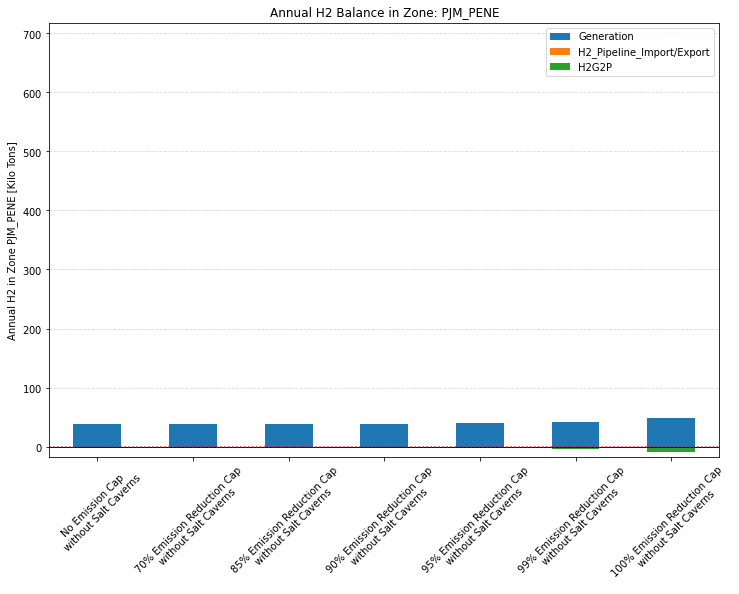

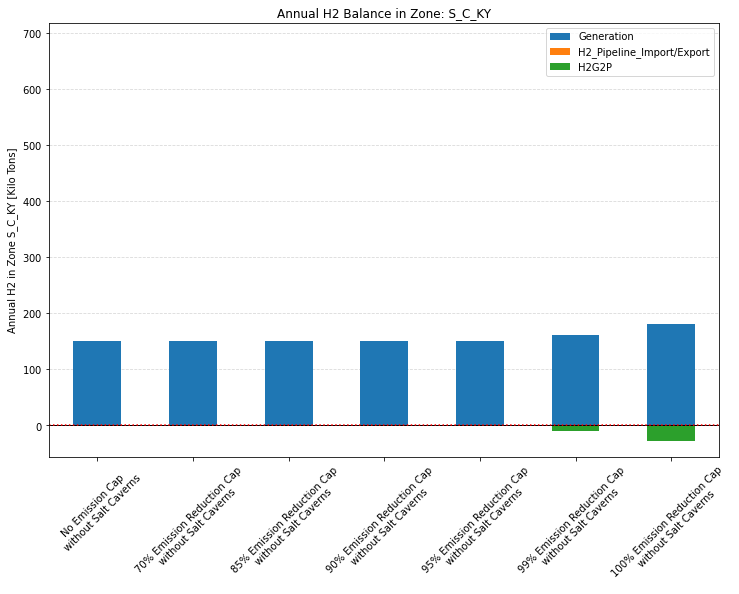

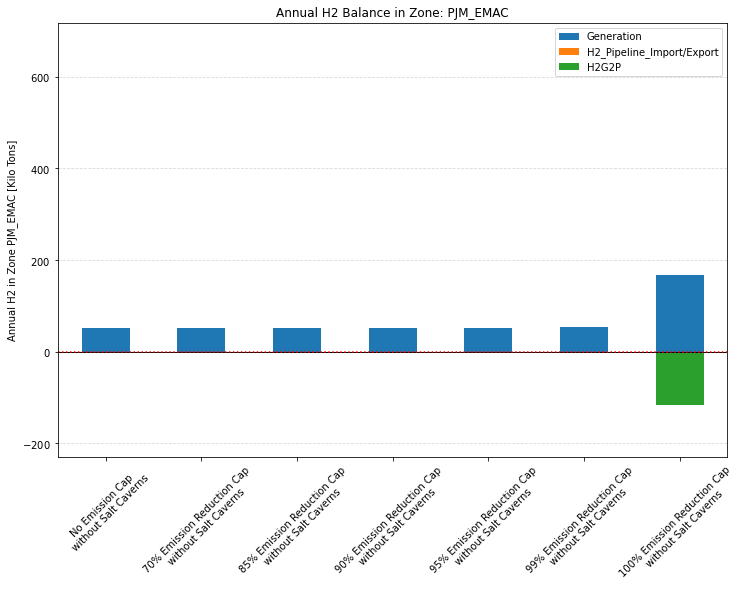

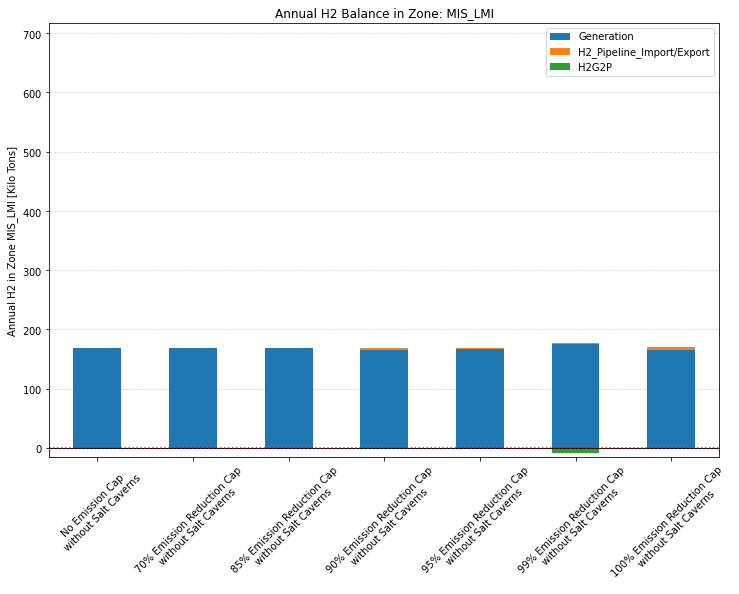

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [53]:
h2_zones_dict_no_caverns = h2_balance_zones_dict(scenarios_no_caverns)
multiple_zone_barchart_h2_balance(dataframes_dict=h2_zones_dict_no_caverns, scenarios=scenarios_no_caverns, zones=zones)

#### With Caverns

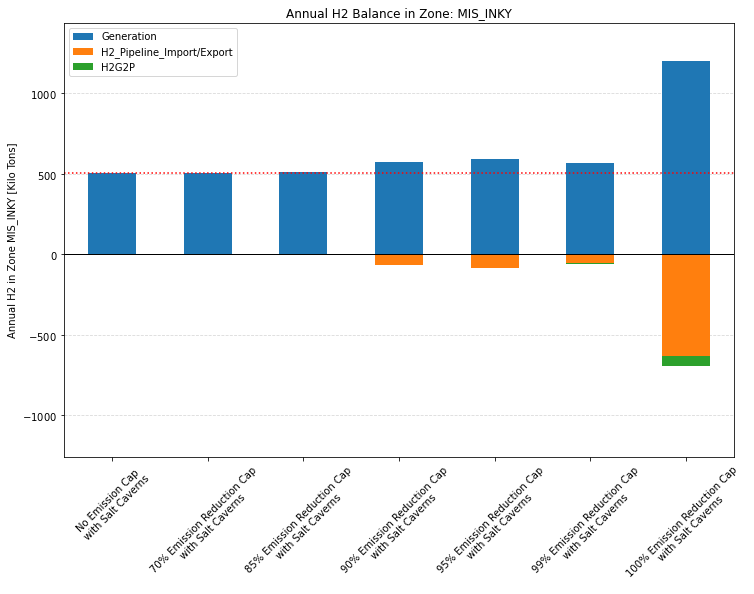

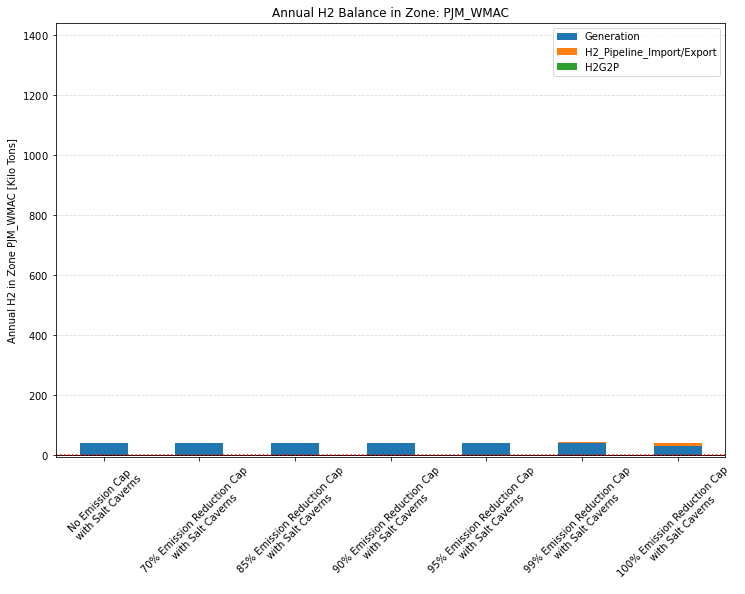

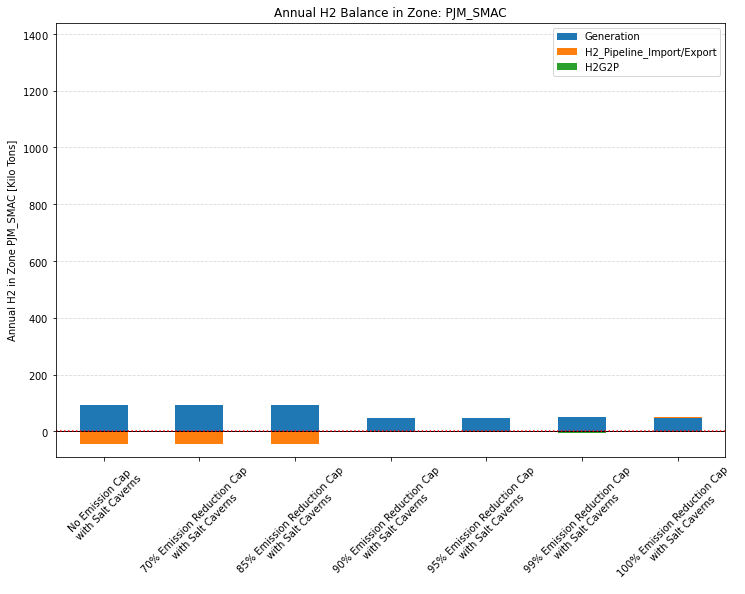

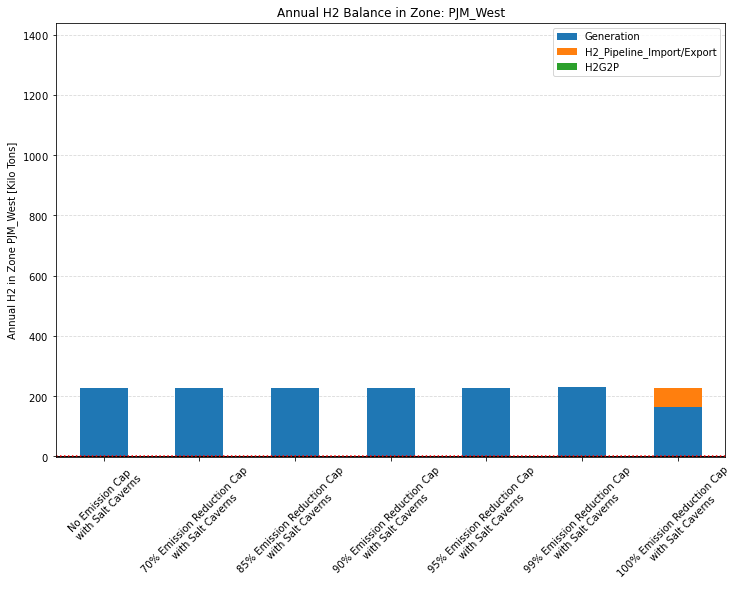

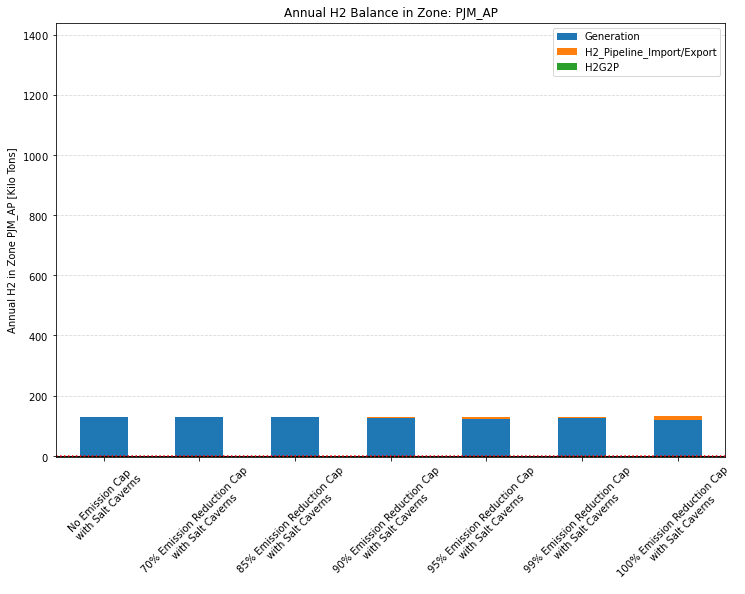

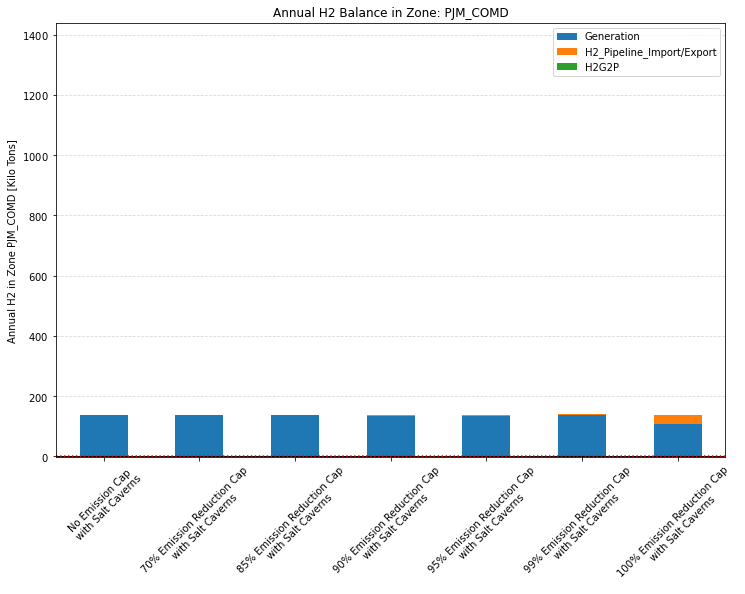

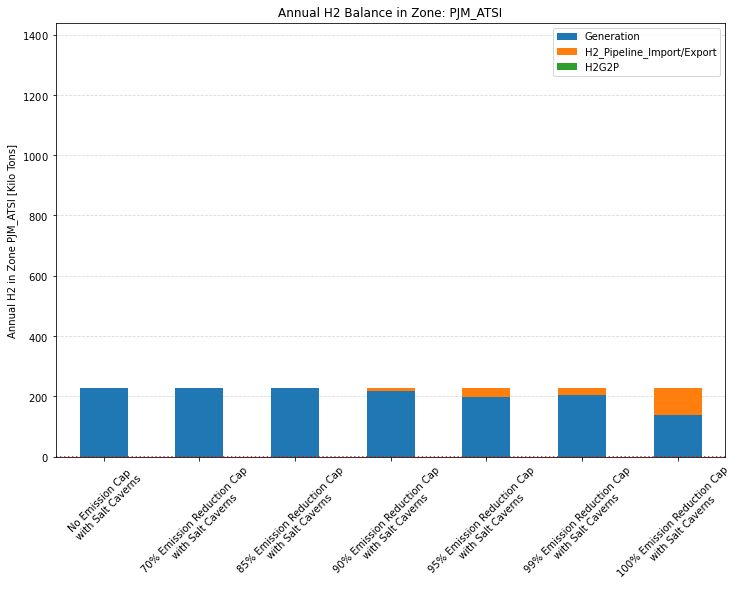

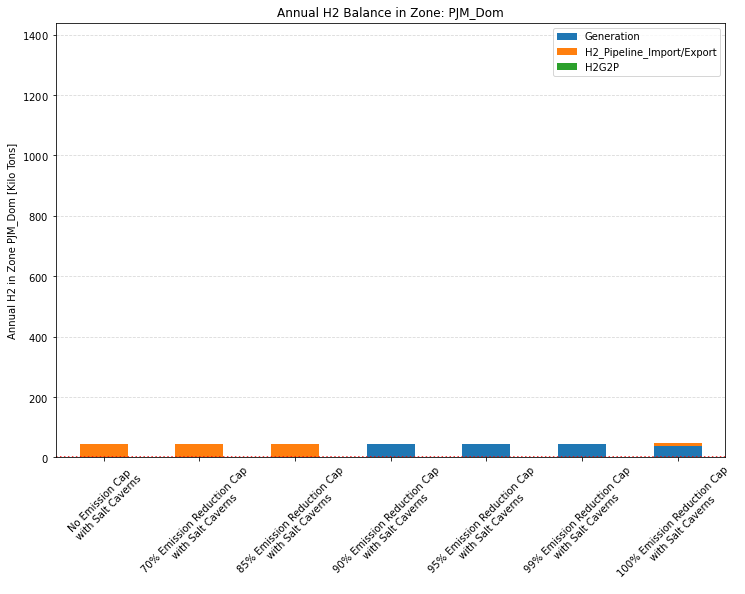

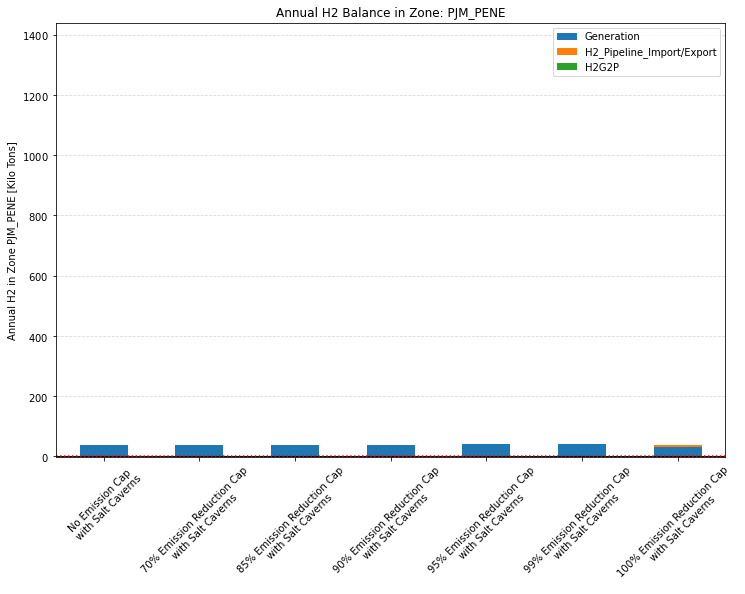

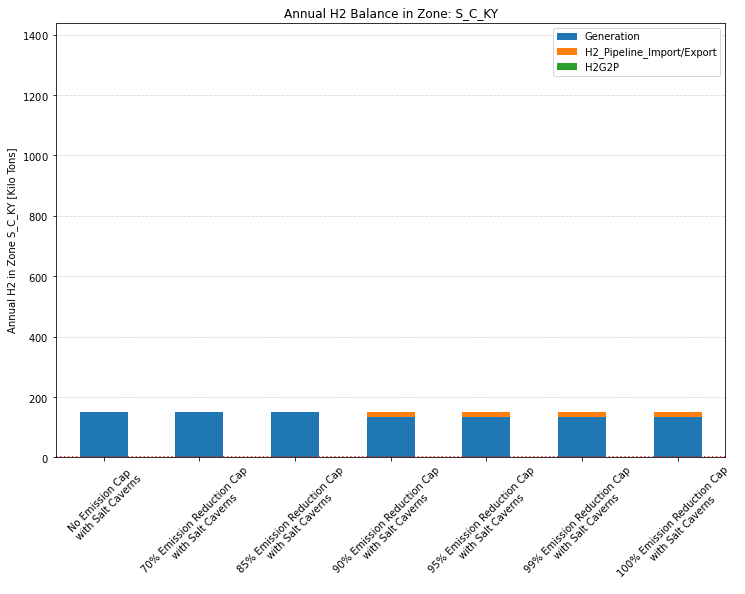

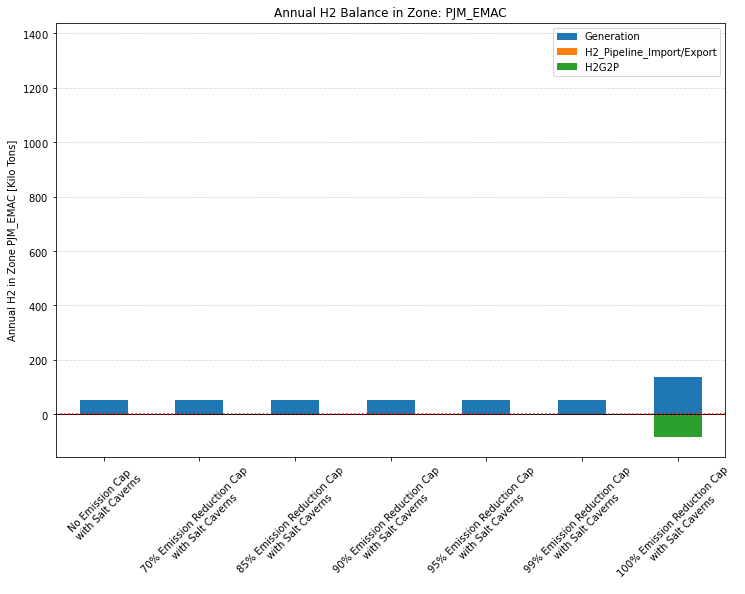

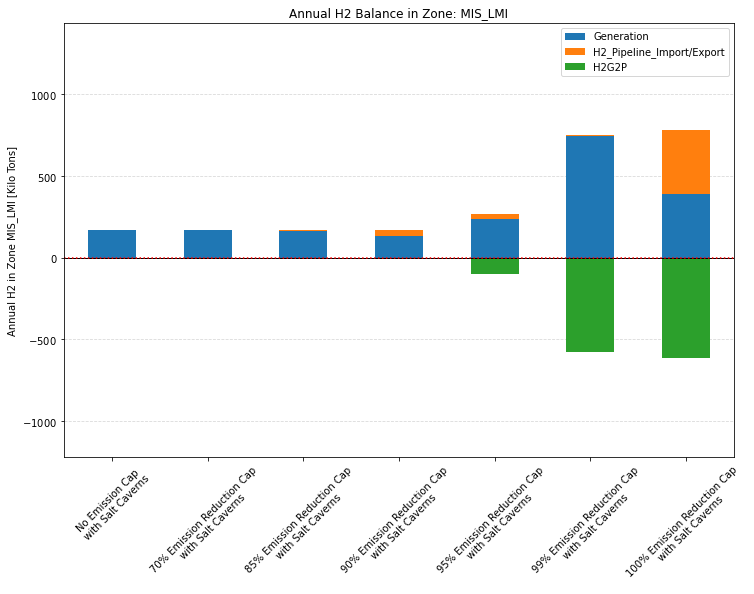

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [54]:
h2_zones_dict_with_caverns = h2_balance_zones_dict(scenarios_with_caverns)
multiple_zone_barchart_h2_balance(dataframes_dict=h2_zones_dict_with_caverns, scenarios=scenarios_with_caverns, zones=zones)

#### With Cavern No Above Ground Storage

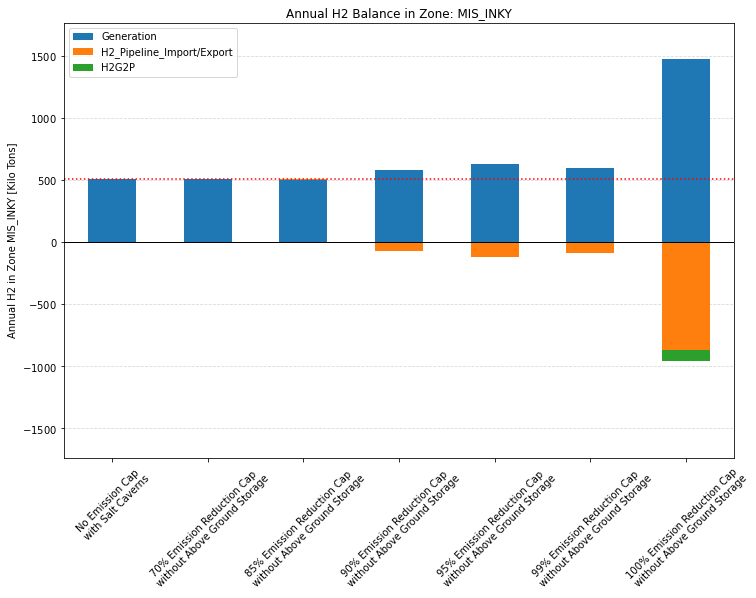

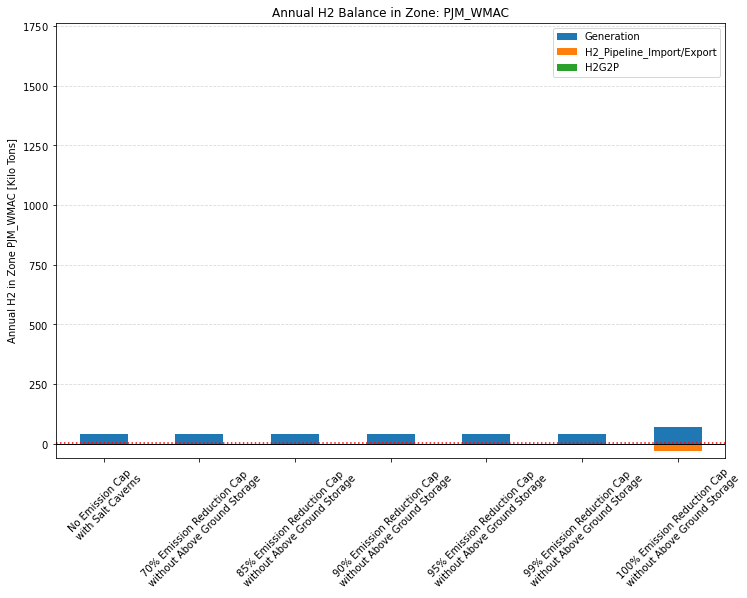

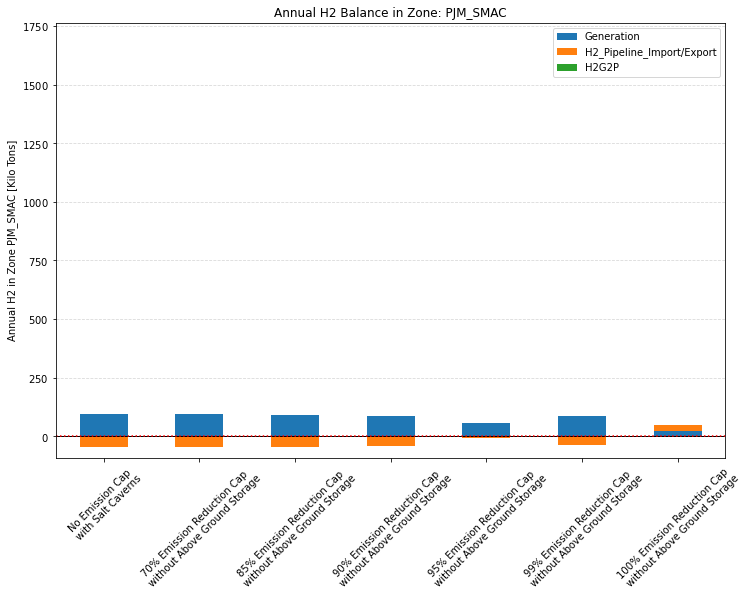

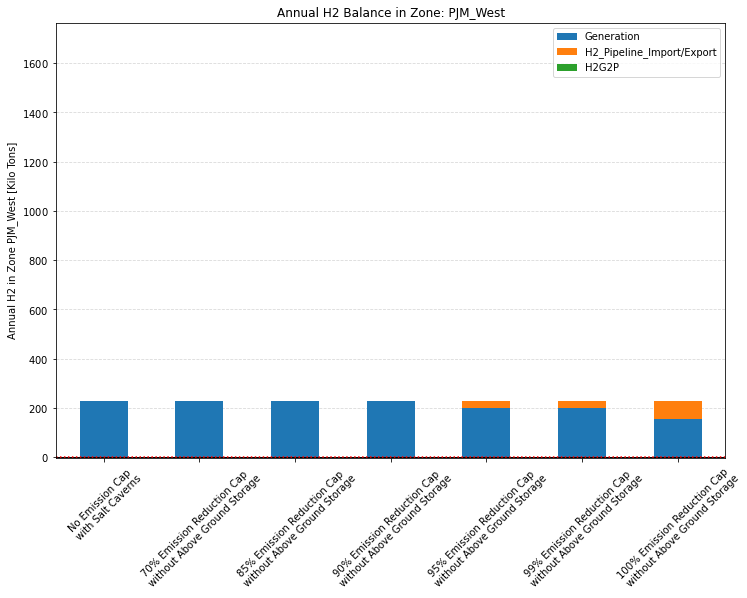

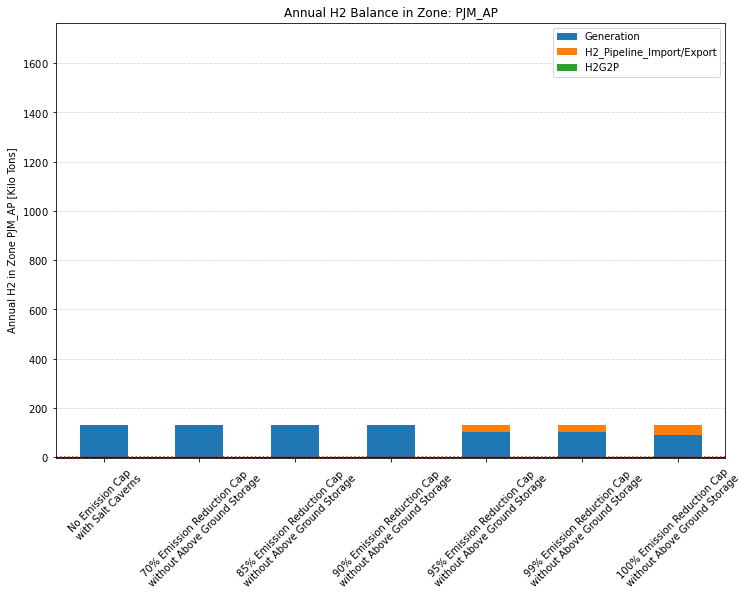

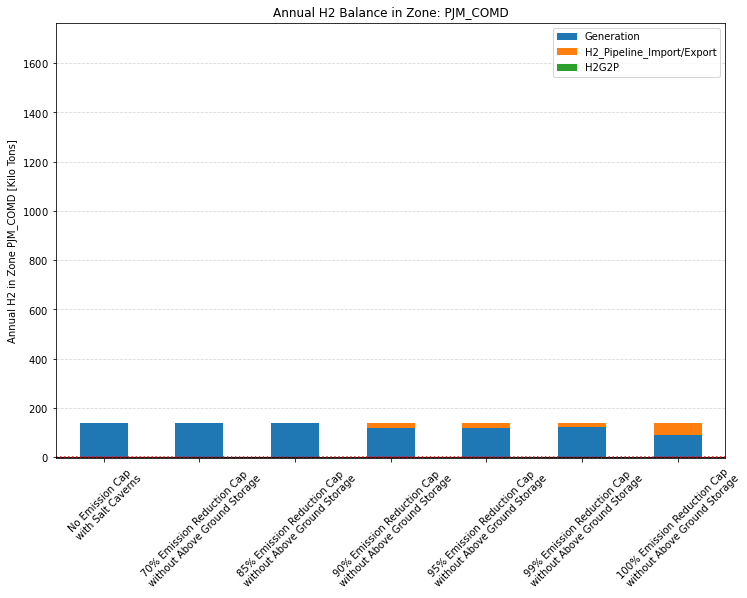

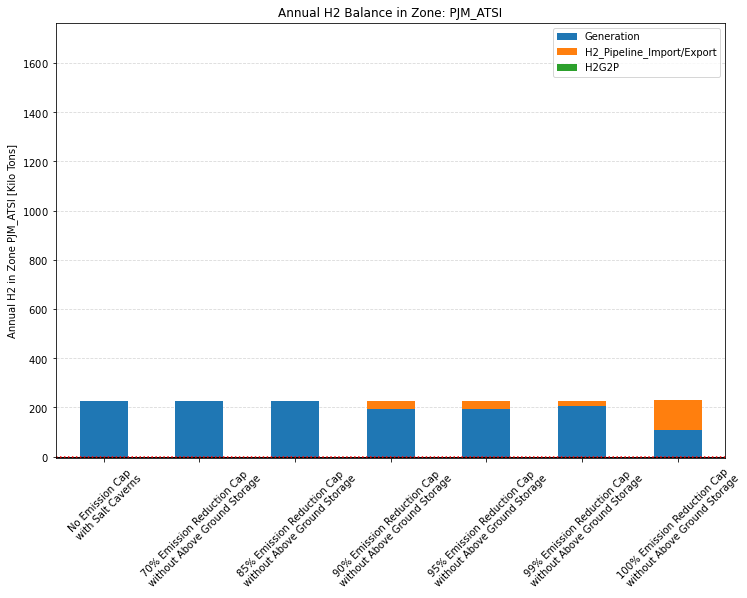

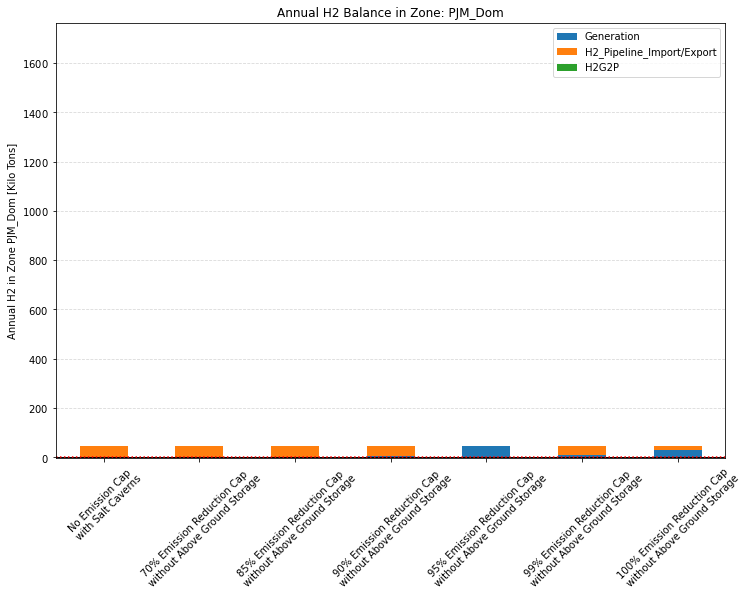

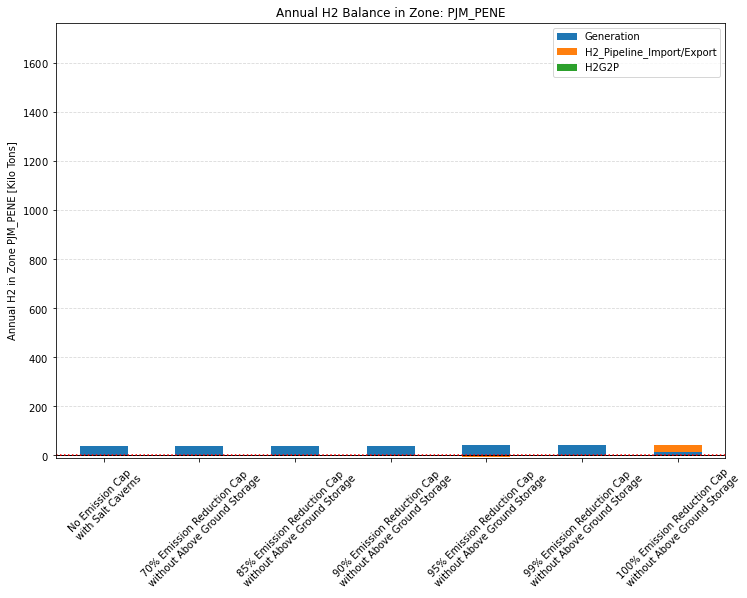

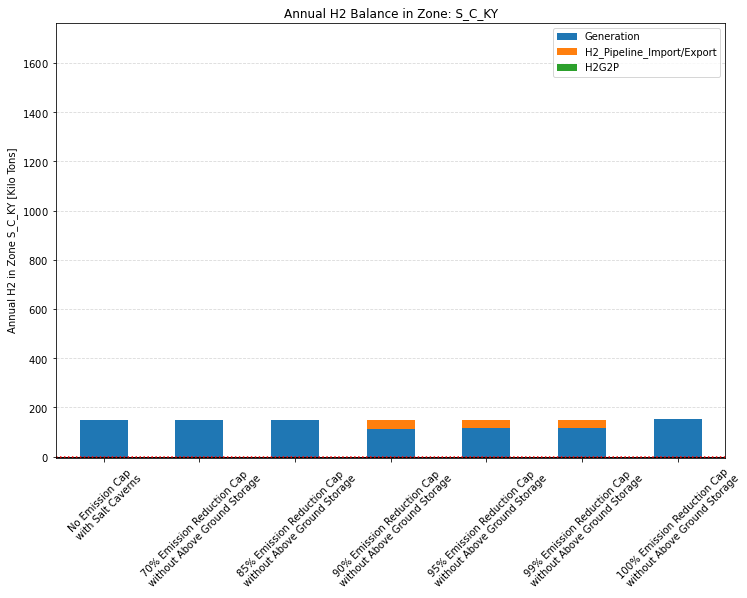

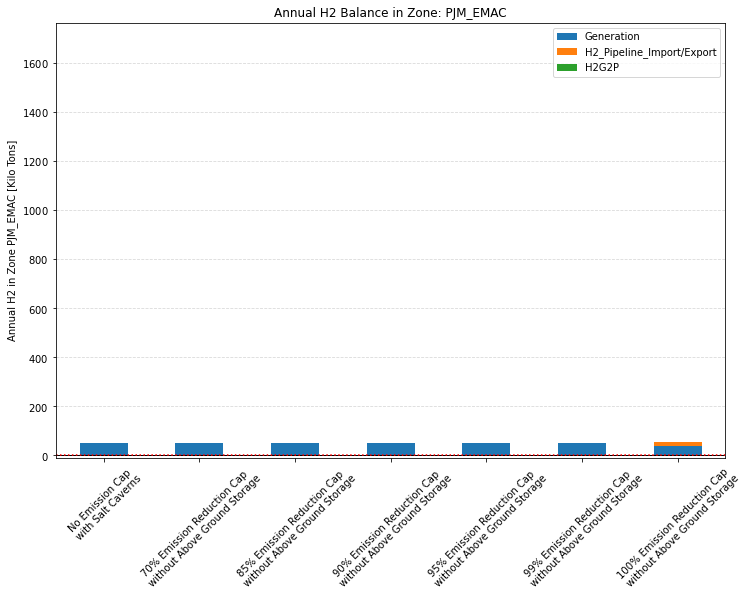

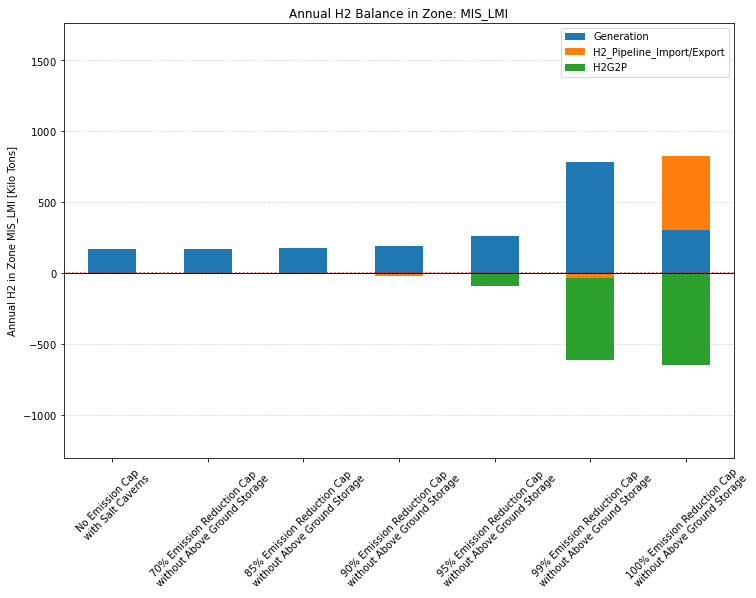

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [55]:
h2_zones_dict_no_above_ground = h2_balance_zones_dict(scenarios_no_above_ground_storage)
multiple_zone_barchart_h2_balance(dataframes_dict=h2_zones_dict_no_above_ground, scenarios=scenarios_no_above_ground_storage, zones=zones)

#### Comparison With Caverns vs Without Caverns (With Above Ground Storage)

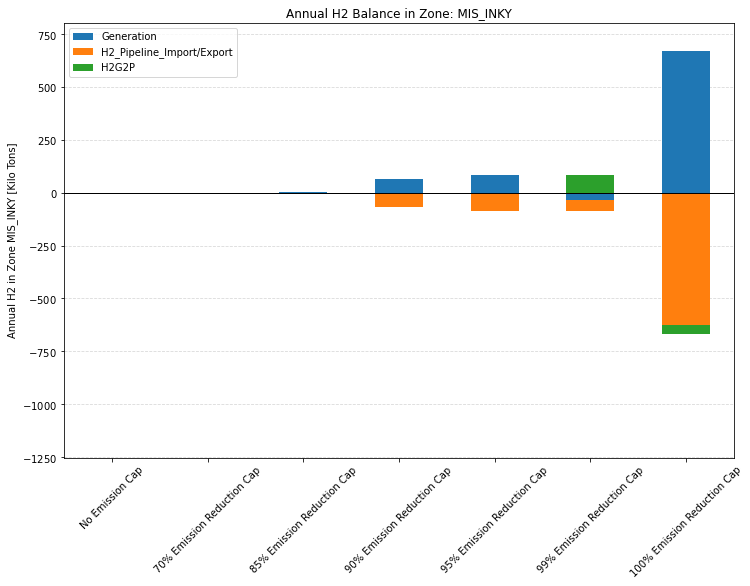

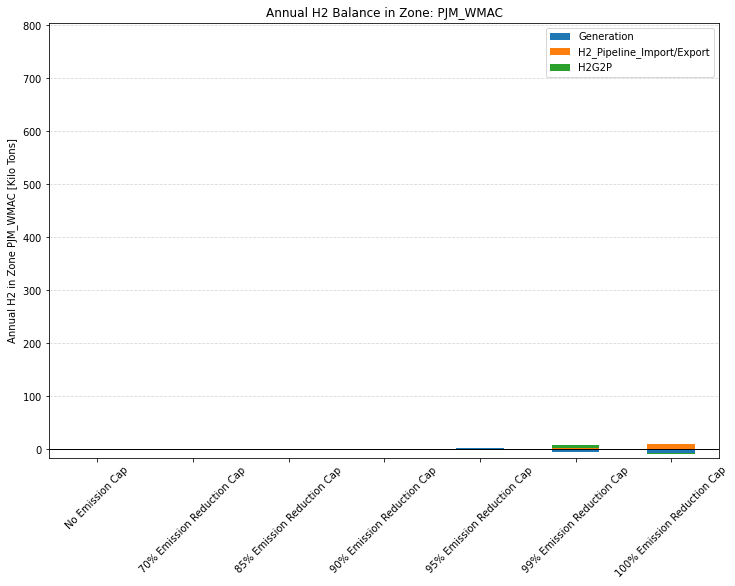

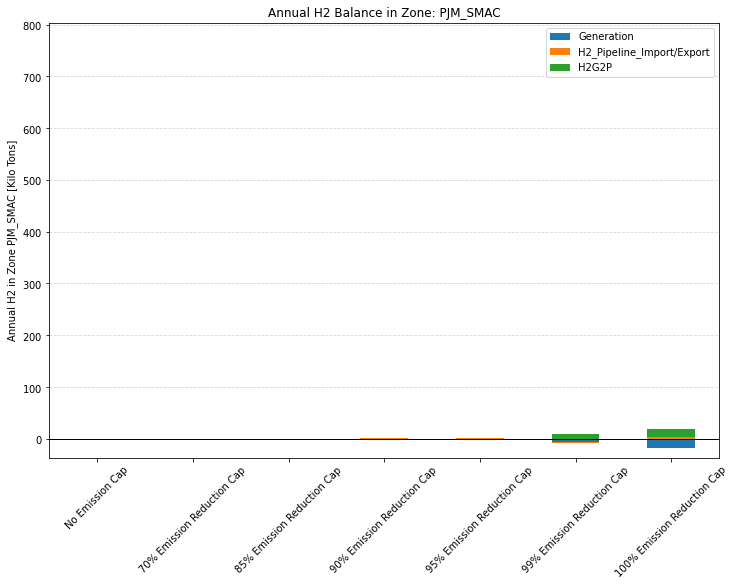

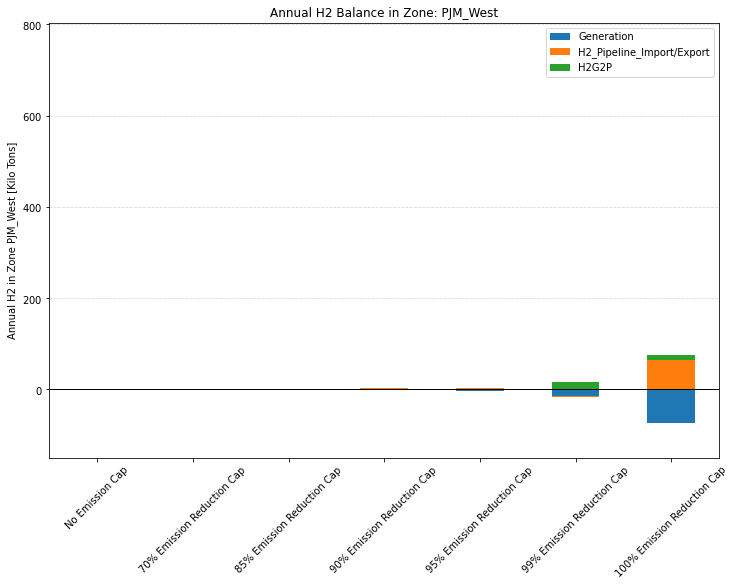

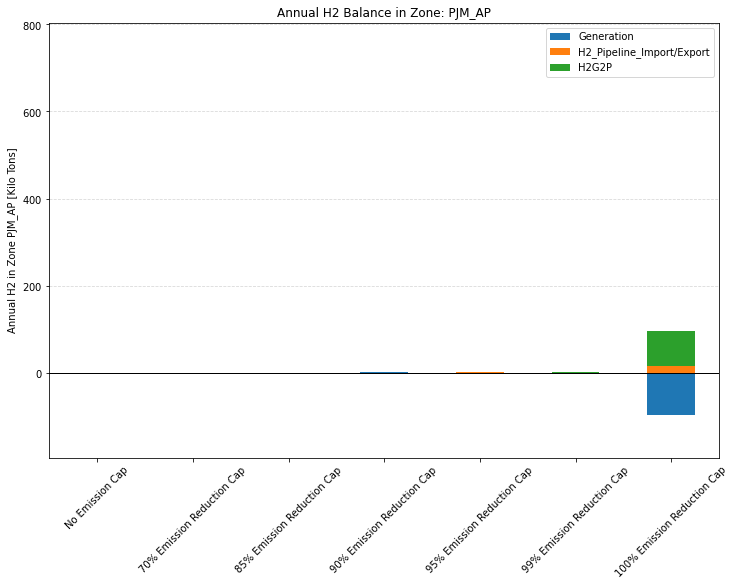

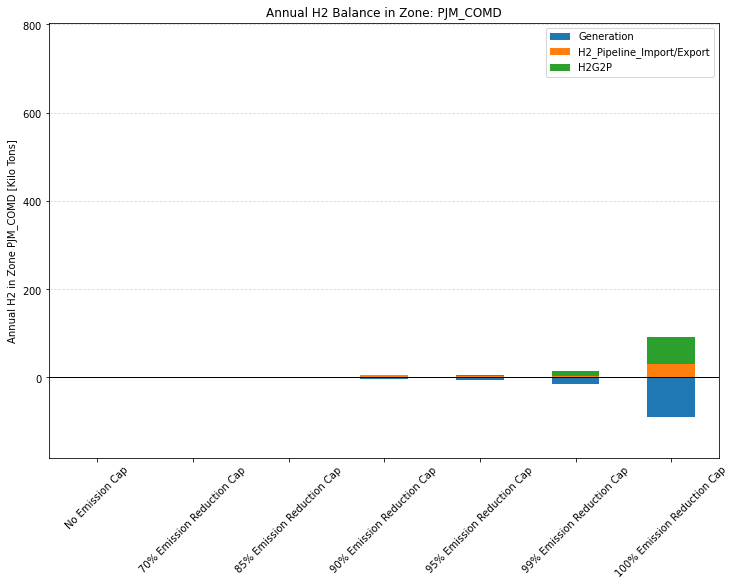

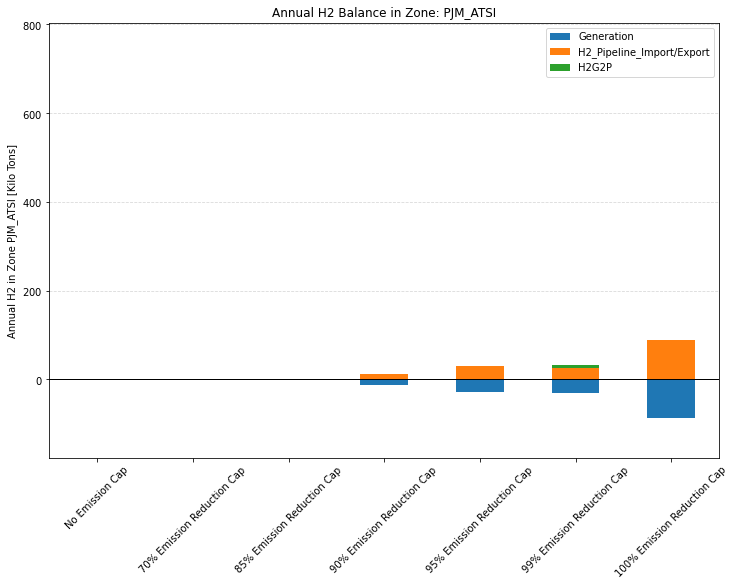

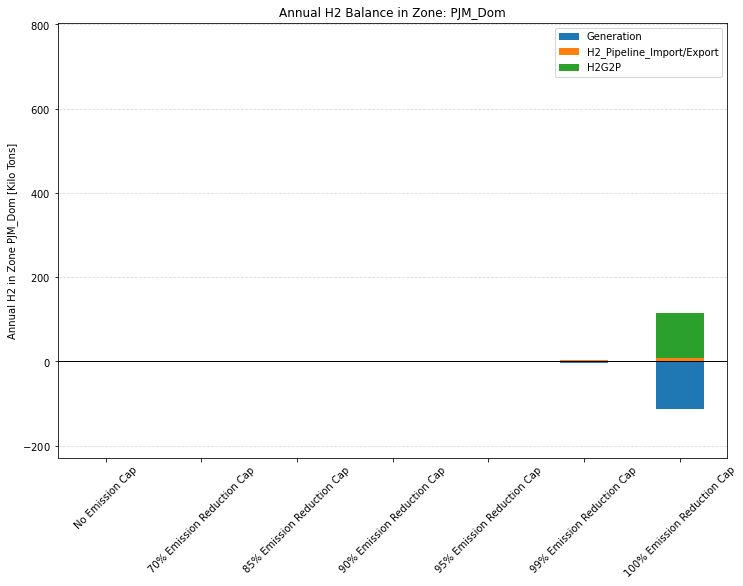

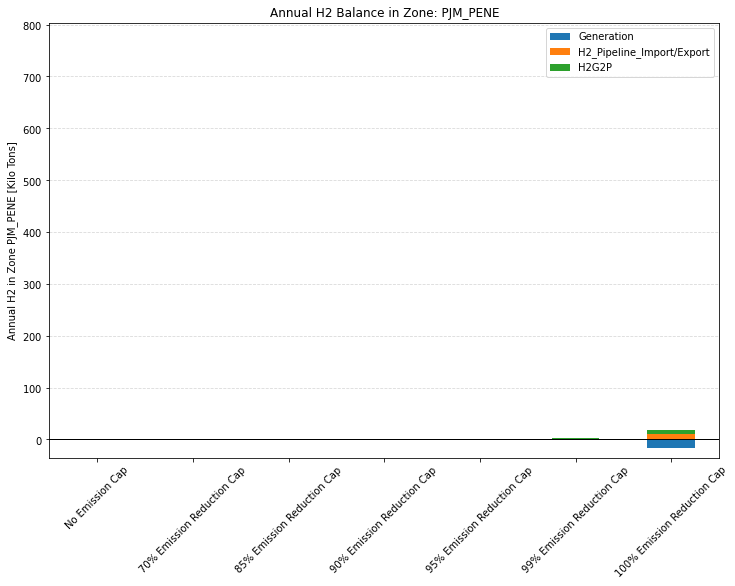

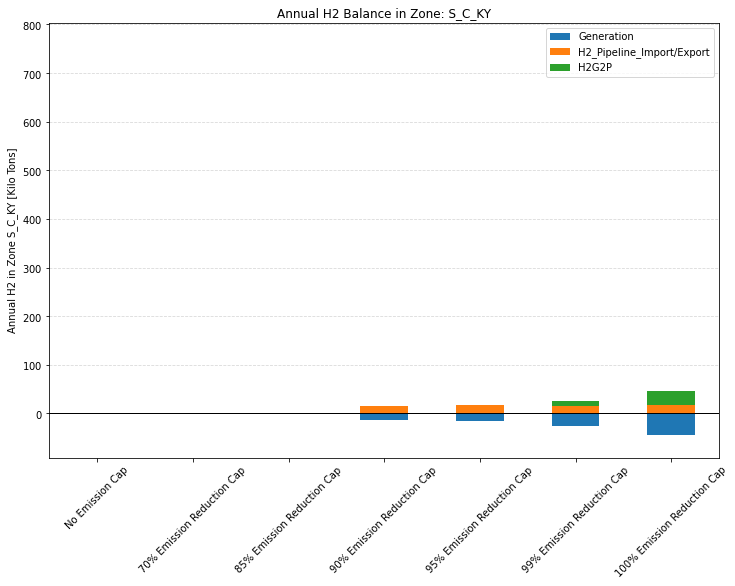

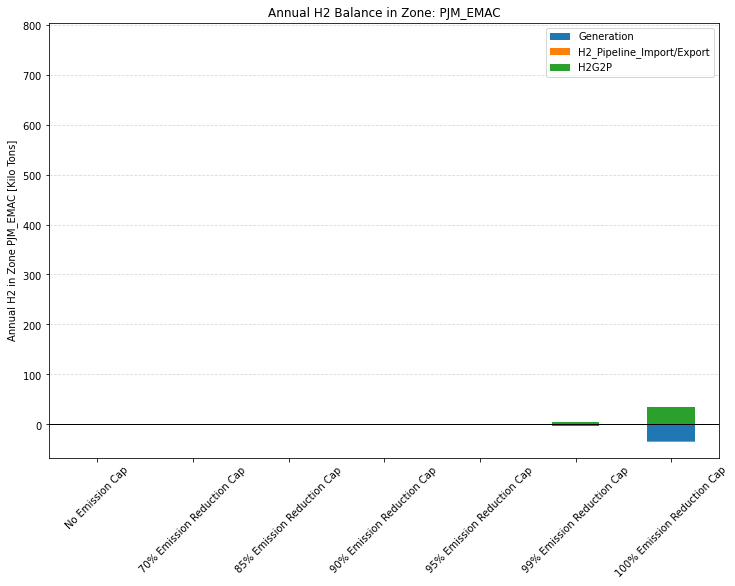

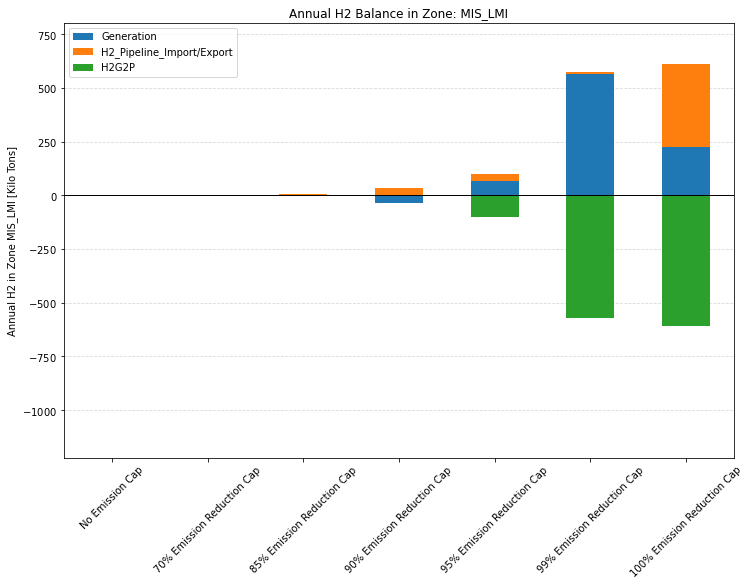

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [56]:
difference_dict = {}

h2_zones_dict_with_caverns = h2_balance_zones_dict(scenarios_with_caverns)
h2_zones_dict_no_caverns = h2_balance_zones_dict(scenarios_no_caverns)


for zone in zones:
    for s in scenarios_comparison:
        split_s = s.split('_')
        no_caverns_scenarios = '_'.join(split_s[:3] + ['no_caverns'] + split_s[3:])
        with_caverns_scenarios = '_'.join(split_s[:3] + ['with_caverns'] + split_s[3:])

        difference_dict[zone,s] =  h2_zones_dict_with_caverns[zone,with_caverns_scenarios] - h2_zones_dict_no_caverns[zone,no_caverns_scenarios]


multiple_zone_barchart_h2_balance(dataframes_dict=difference_dict, scenarios=scenarios_comparison, zones=zones, load_data=False)

#### Comparison With AGS vs Without AGS (With Caverns)

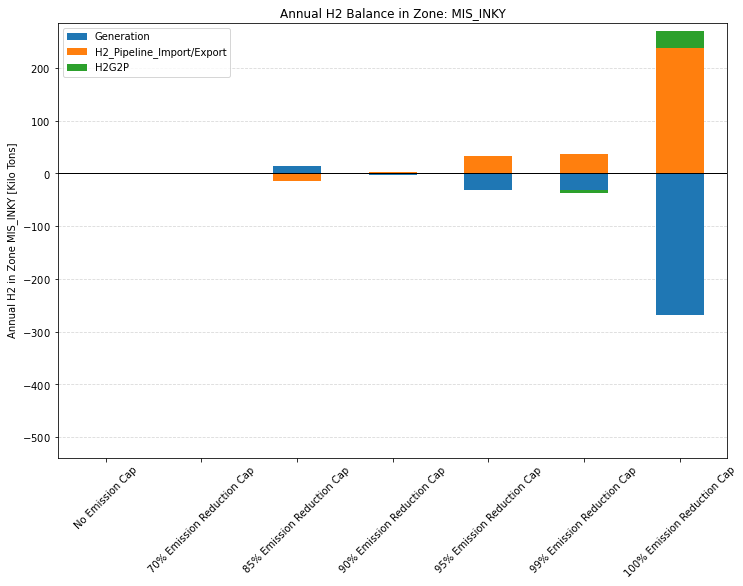

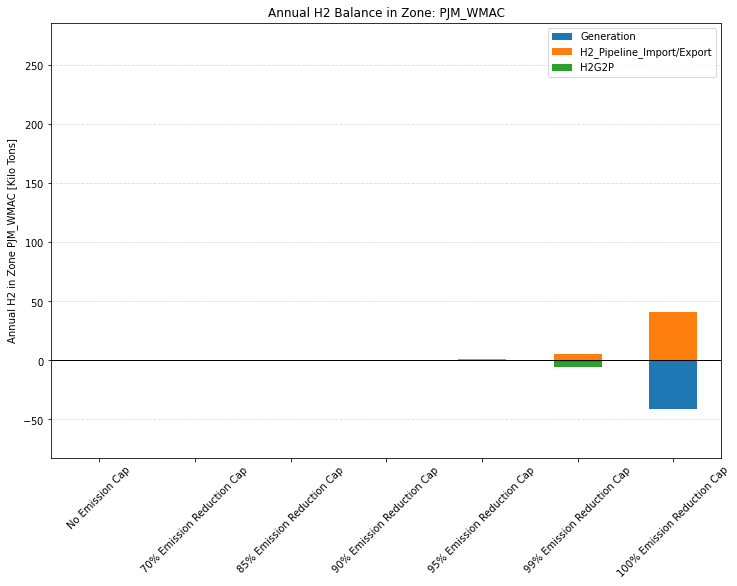

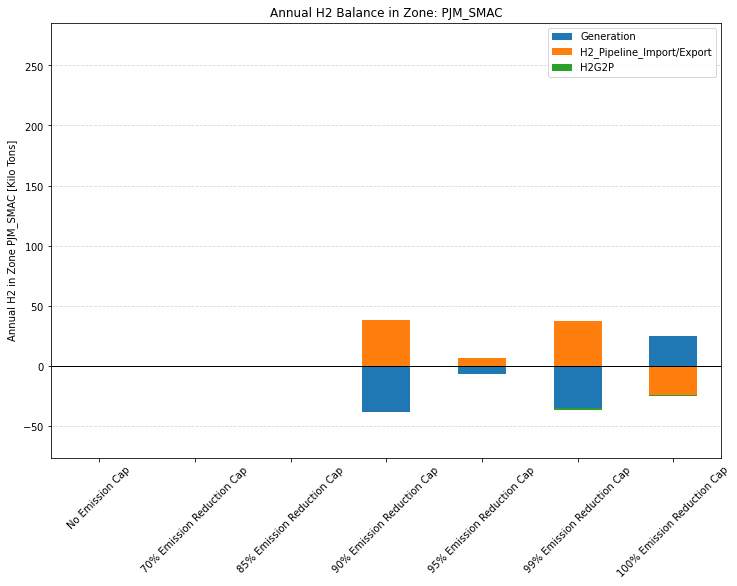

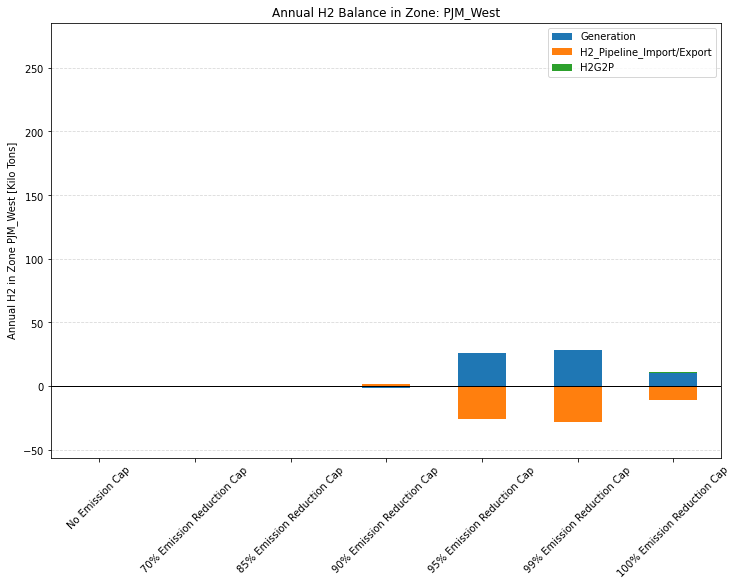

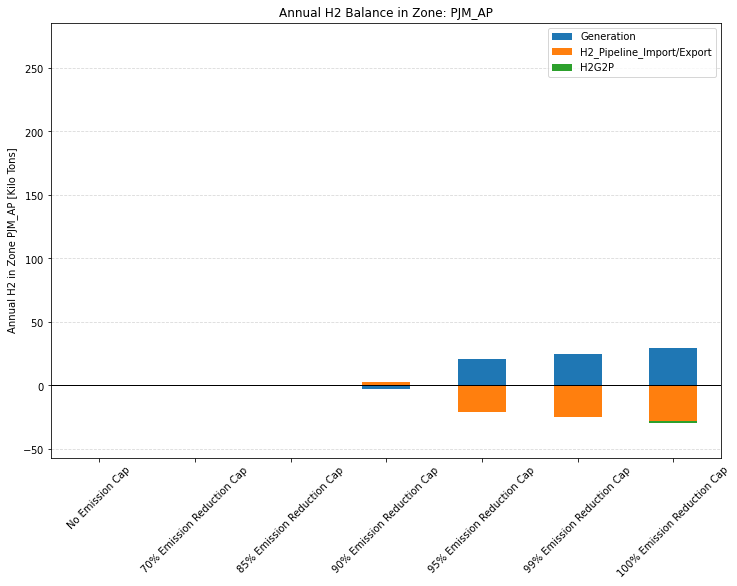

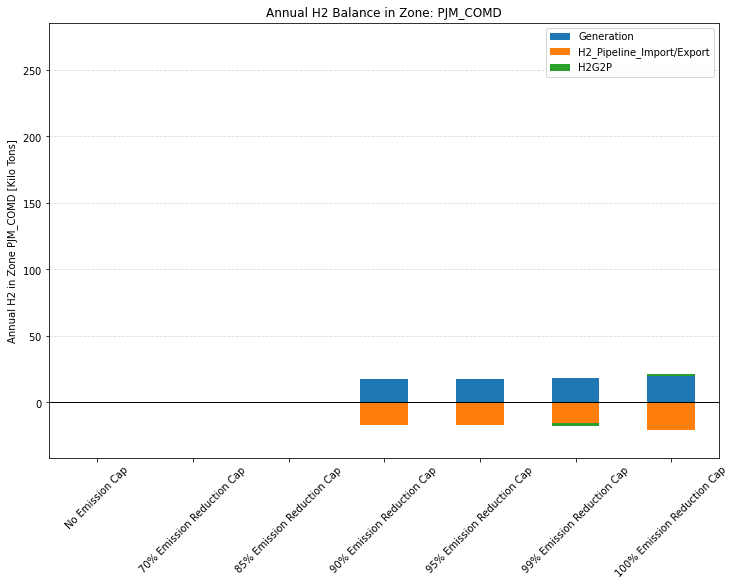

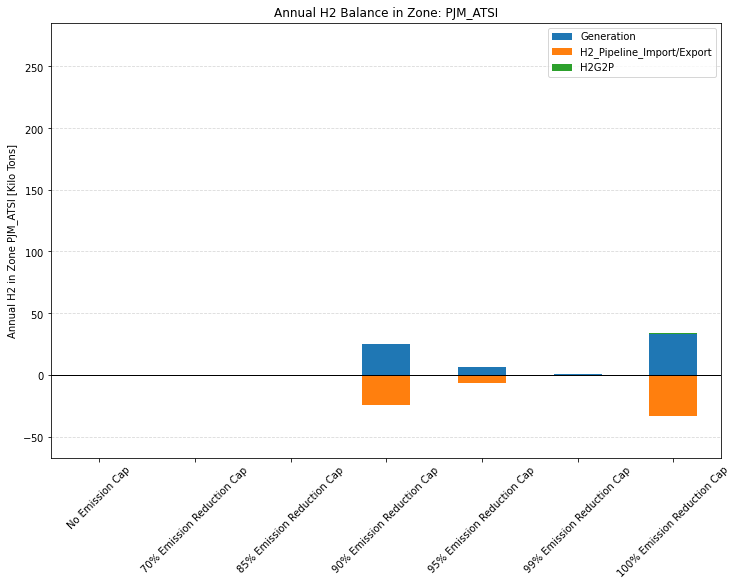

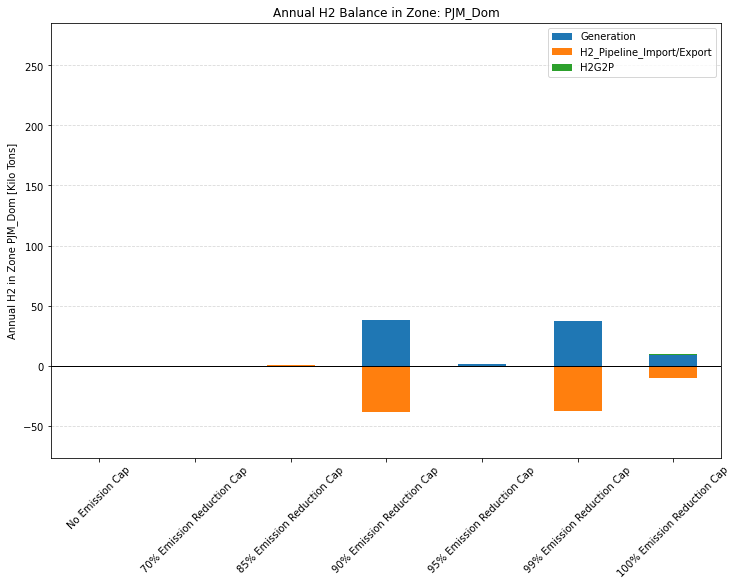

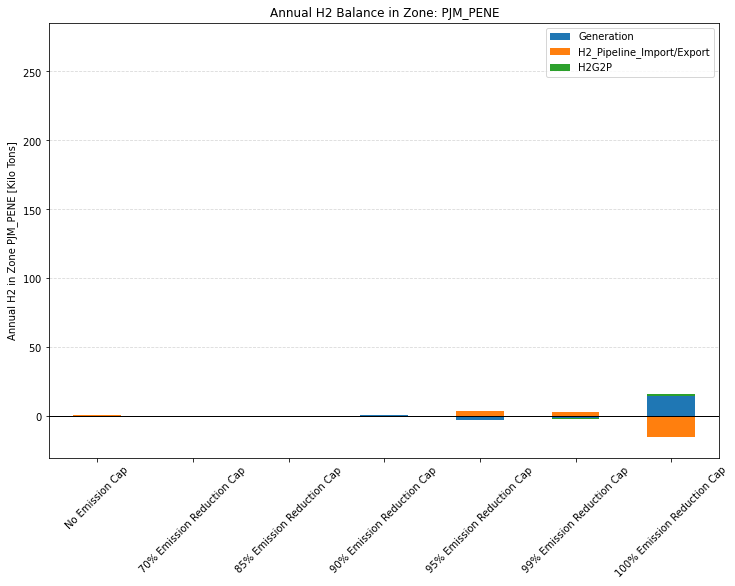

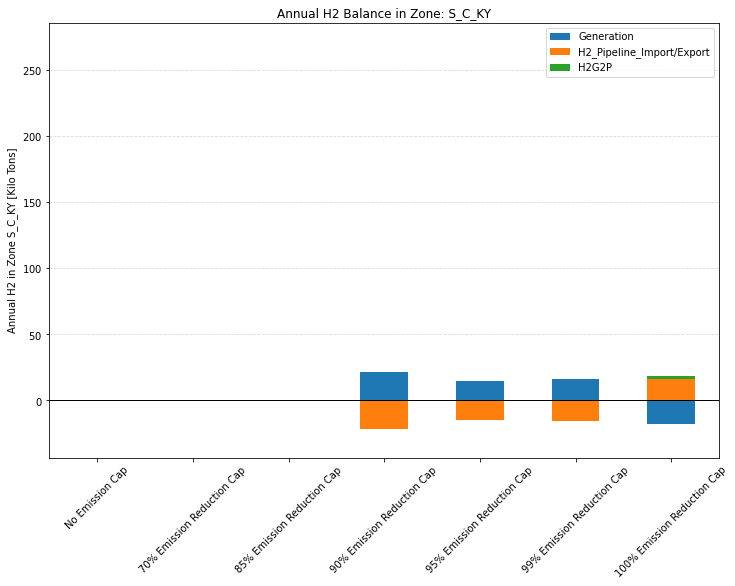

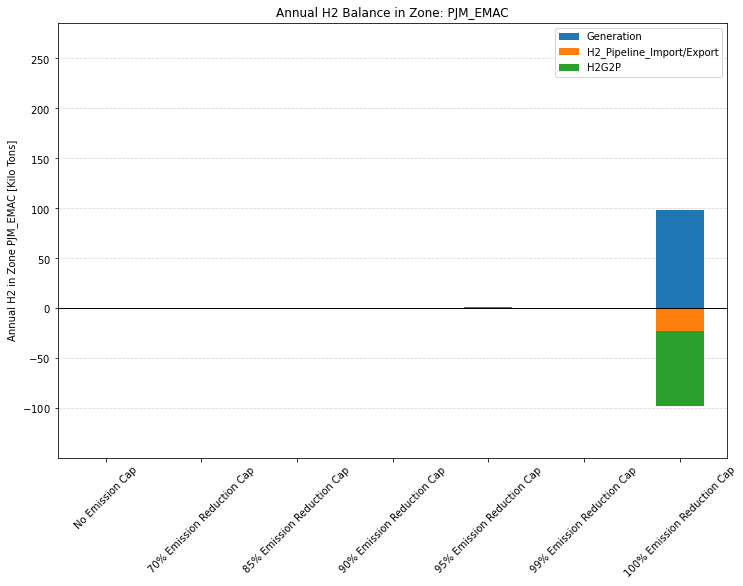

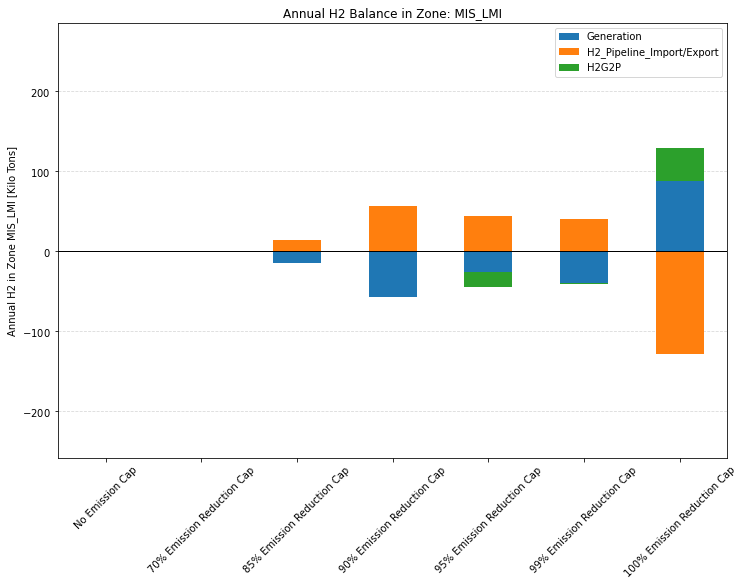

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [57]:
# ABOVE GROUND WITH CAVERNS VS WITHOUT ABOVE GROUND

difference_dict = {}

for zone in zones:
    for s in scenarios_comparison:
        split_s = s.split('_')
        
        # Modify the construction of the scenario names
        with_caverns_scenarios = '_'.join(split_s[:3] + ['with_caverns'] + split_s[3:])
        no_above_ground_storage_scenarios = '_'.join(split_s[:3] + ['no_above_ground_storage'] + split_s[3:])

        # Update the data fetching from the dictionaries
        difference_dict[zone,s] = h2_zones_dict_with_caverns[zone,with_caverns_scenarios] - h2_zones_dict_no_above_ground[zone,no_above_ground_storage_scenarios]


multiple_zone_barchart_h2_balance(dataframes_dict=difference_dict, scenarios=scenarios_comparison, zones=zones, load_data=False)


In [58]:
scenarios_no_caverns = ['PJM_with_MI_no_caverns_0_red',
                        'PJM_with_MI_no_caverns_70_red',
                        'PJM_with_MI_no_caverns_85_red',
                        'PJM_with_MI_no_caverns_90_red',
                        'PJM_with_MI_no_caverns_95_red',
                        'PJM_with_MI_no_caverns_99_red',
                        'PJM_with_MI_no_caverns_100_red']
 
scenarios_with_caverns =  ['PJM_with_MI_with_caverns_0_red',
                            'PJM_with_MI_with_caverns_70_red',
                            'PJM_with_MI_with_caverns_85_red',
                            'PJM_with_MI_with_caverns_90_red',
                            'PJM_with_MI_with_caverns_95_red',
                            'PJM_with_MI_with_caverns_99_red',
                            'PJM_with_MI_with_caverns_100_red']


scenarios_no_above_ground_storage = ['PJM_with_MI_no_above_ground_storage_0_red',
                                    'PJM_with_MI_no_above_ground_storage_70_red',
                                    'PJM_with_MI_no_above_ground_storage_85_red',
                                    'PJM_with_MI_no_above_ground_storage_90_red',
                                    'PJM_with_MI_no_above_ground_storage_95_red',
                                    'PJM_with_MI_no_above_ground_storage_99_red',
                                    'PJM_with_MI_no_above_ground_storage_100_red']

## IPM Map Plot

In [59]:
import geopandas as gpd


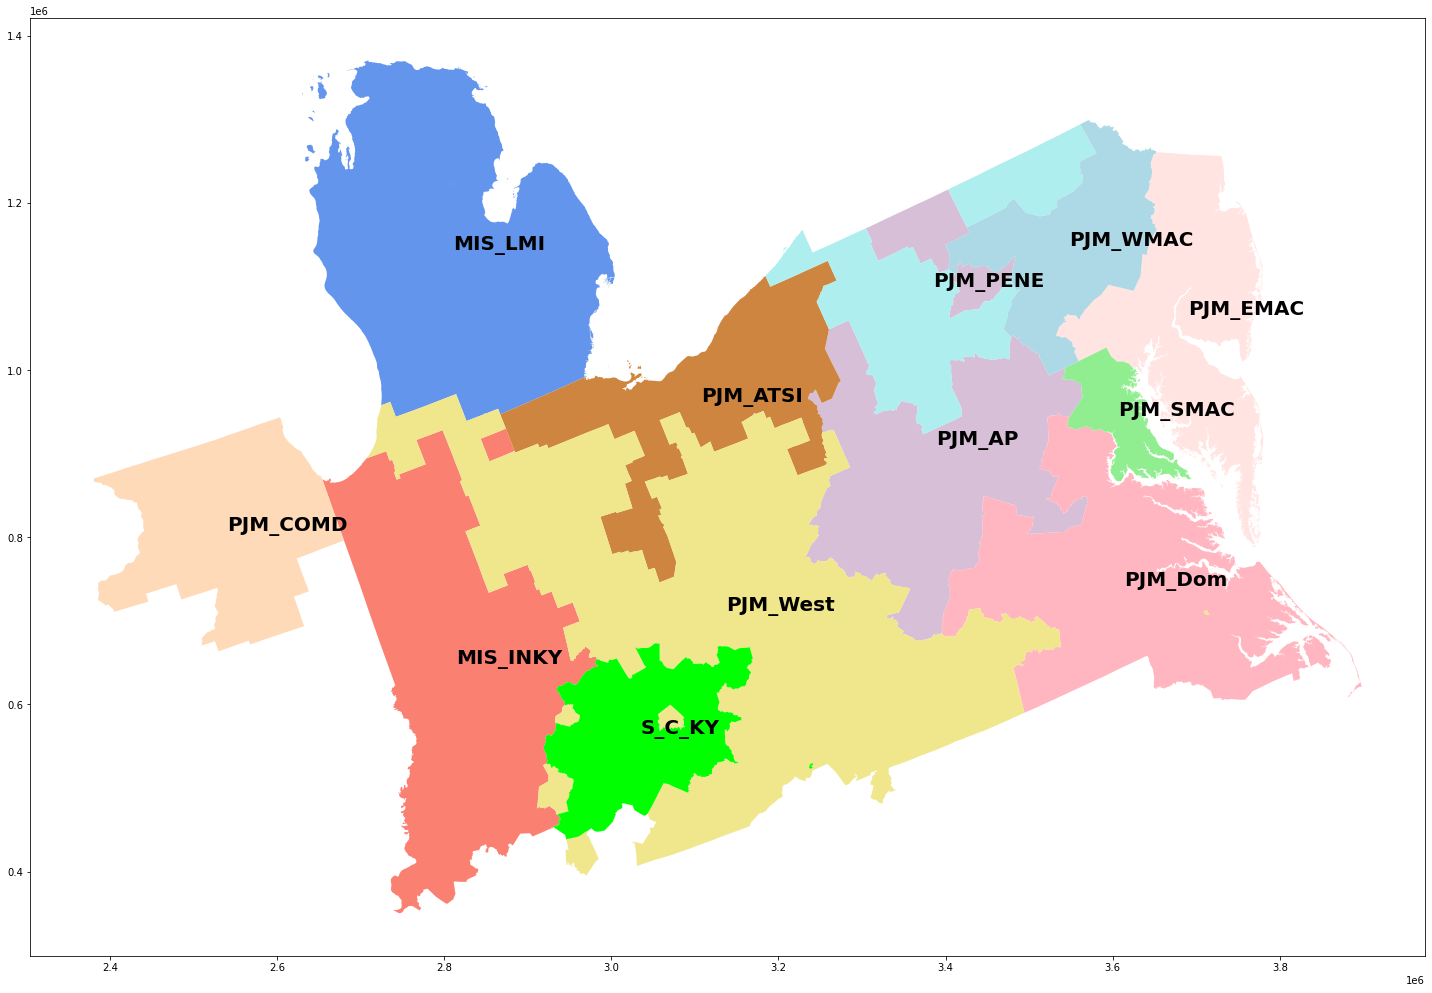

<Figure size 432x288 with 0 Axes>

In [60]:
colors_IPM_zones = {
    "MIS_INKY": "salmon",
    "PJM_WMAC": "lightblue",
    "PJM_SMAC": "lightgreen",
    "PJM_West": "khaki",
    "PJM_AP": "thistle",
    "PJM_COMD": "peachpuff",
    "PJM_ATSI": "peru",
    "PJM_Dom": "lightpink",
    "PJM_PENE": "paleturquoise",
    "S_C_KY": "lime",
    "PJM_EMAC": "mistyrose",
    "MIS_LMI": "cornflowerblue"
}


def plot_IPM_zones_filtered(IPM_shapefile_path='ipm_v6_regions', zones=zones, colors=colors_IPM_zones):
    
    gdf = gpd.read_file(IPM_shapefile_path)
    gdf = gdf[gdf['IPM_Region'].isin(zones)]

    # Define color map (you may want to adjust colors according to your preferences)

    # Create a new figure
    fig, ax = plt.subplots(1, 1, figsize=(25, 20)) # Change the size according to your needs

    # Loop over each row in the GeoDataFrame
    for index, row in gdf.iterrows():
        # Plot the zone with the color specified in the color map
        gdf[gdf["IPM_Region"] == row["IPM_Region"]].plot(color=colors_IPM_zones[row["IPM_Region"]], ax=ax)

        # Add a label at the centroid of the zone
        centroid = row["geometry"].centroid
        plt.text(centroid.x, centroid.y, str(row["IPM_Region"]), fontsize=20, fontweight='bold')

    # Display the plot
    plt.show()
    plt.savefig('plots_folder/Autosave_plots/IPM_Analyzed_Zones')


    
plot_IPM_zones_filtered()

# Transmission Analysis

## Electrical Transmission

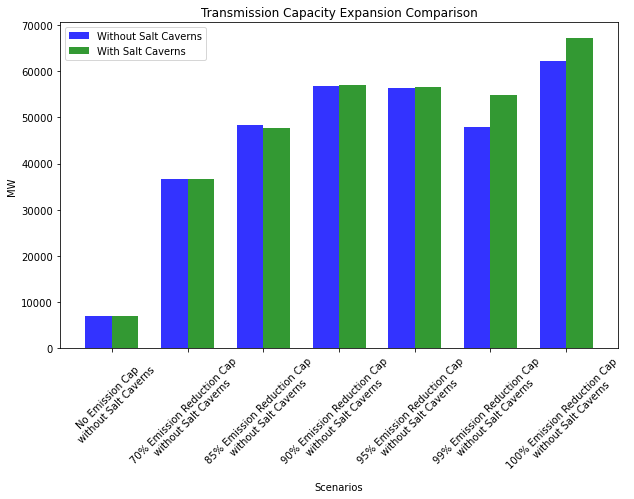

<Figure size 432x288 with 0 Axes>

In [61]:
# Without caverns
trans_cap_list_no_caverns = []
for scenario in scenarios_no_caverns:
    df = open_results_file('network_expansion.csv', scenario)
    trans_cap_total = df['New_Trans_Capacity'].sum()
    trans_cap_list_no_caverns.append(trans_cap_total)

# With caverns
trans_cap_list_with_caverns = []
for scenario in scenarios_with_caverns:
    df = open_results_file('network_expansion.csv', scenario)
    trans_cap_total = df['New_Trans_Capacity'].sum()
    trans_cap_list_with_caverns.append(trans_cap_total)
    
# Settings for the bars
bar_width = 0.35
opacity = 0.8

# Rename scenarios
scenarios_renamed = [rename_dict[s] for s in scenarios_no_caverns]

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(trans_cap_list_no_caverns))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(r1, trans_cap_list_no_caverns, color='blue', width=bar_width, alpha=opacity, label='Without Salt Caverns')
plt.bar(r2, trans_cap_list_with_caverns, color='green', width=bar_width, alpha=opacity, label='With Salt Caverns')

# Add labels, title, legend, etc
plt.xlabel('Scenarios')  
plt.ylabel('MW')
plt.title('Transmission Capacity Expansion Comparison')
plt.xticks([r + bar_width / 2 for r in range(len(trans_cap_list_no_caverns))], scenarios_renamed, rotation=45)
plt.legend()

plt.show()
plt.savefig('plots_folder/Autosave_plots/Power_Transmission_Capacity')

## H2 Pipeline Transmission

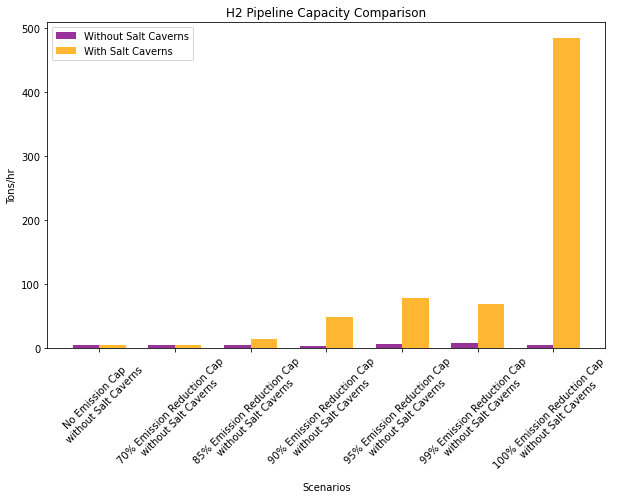

<Figure size 432x288 with 0 Axes>

In [62]:

# Without caverns
h2_pipe_cap_list_no_caverns = []
for scenario in scenarios_no_caverns:
    df = open_results_file('HSC_pipeline_expansion.csv', scenario)
    new_h2_pipeline_cap_total = df['New_Trans_Capacity'].sum()
    h2_pipe_cap_list_no_caverns.append(new_h2_pipeline_cap_total)

# With caverns
h2_pipe_cap_list_with_caverns = []
for scenario in scenarios_with_caverns:
    df = open_results_file('HSC_pipeline_expansion.csv', scenario)
    new_h2_pipeline_cap_total = df['New_Trans_Capacity'].sum()
    h2_pipe_cap_list_with_caverns.append(new_h2_pipeline_cap_total)

    
# Settings for the bars
bar_width = 0.35
opacity = 0.8

# Rename scenarios
scenarios_renamed = [rename_dict[s] for s in scenarios_no_caverns]

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(h2_pipe_cap_list_no_caverns))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(r1, h2_pipe_cap_list_no_caverns, color='purple', width=bar_width, alpha=opacity, label='Without Salt Caverns')
plt.bar(r2, h2_pipe_cap_list_with_caverns, color='orange', width=bar_width, alpha=opacity, label='With Salt Caverns')

# Add labels, title, legend, etc
plt.xlabel('Scenarios')  
plt.ylabel('Tons/hr')
plt.title('H2 Pipeline Capacity Comparison')
plt.xticks([r + bar_width / 2 for r in range(len(h2_pipe_cap_list_no_caverns))], scenarios_renamed, rotation=45)
plt.legend()

plt.show()
plt.savefig('plots_folder/Autosave_plots/h2_pipeline_capcity')

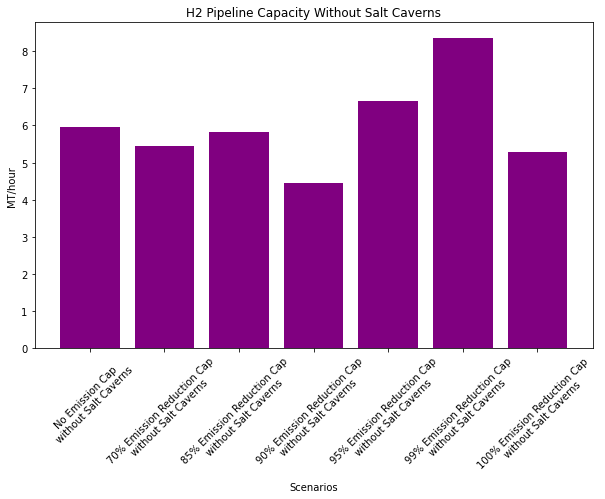

In [63]:
h2_pipe_cap_list = []
for scenario in scenarios_no_caverns:
    df = open_results_file('HSC_pipeline_expansion.csv',scenario )
    new_h2_pipeline_cap_total = df['New_Trans_Capacity'].sum()
    h2_pipe_cap_list.append(new_h2_pipeline_cap_total)

# Rename scenarios
scenarios_renamed = [rename_dict[s] for s in scenarios]

plt.figure(figsize=(10,6))
plt.bar(scenarios_renamed, h2_pipe_cap_list, color='purple')
plt.xlabel('Scenarios')  
plt.ylabel('MT/hour')
plt.title('H2 Pipeline Capacity Without Salt Caverns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
